In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
import xgboost

c:\users\jhkim6\pycharmprojects\gc\venv\lib\site-packages\xgboost\compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression

In [5]:
from joblib import dump, load

In [6]:
import json

In [7]:
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family': 'Malgun Gothic'})
import sklearn

# 마이너스 부호 깨짐 현상 해결
matplotlib.rcParams['axes.unicode_minus'] = False

In [8]:
# row 출력제한 해제
pd.set_option('display.max_row', 500)

# column 출력제한 해제
pd.set_option('display.max_columns', 100)

In [9]:
from impyute.imputation.cs import mice
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [10]:
from impyute.imputation.cs import mice, fast_knn

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [12]:
from itertools import product
from scipy.stats import gaussian_kde
from scipy import stats

In [13]:
# import keras
# from keras import layers
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [14]:
# import torch 
# from torch import nn,optim
# from torch.utils.data import DataLoader, Dataset
# import torch.nn.functional as F

# Data Load

In [15]:
with open('../input/DM_건강검진결과_토탈_피봇241014.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw = pd.DataFrame(js)

In [16]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Columns: 136 entries, 검진년도 to 심장주위지방CT
dtypes: int64(4), object(132)
memory usage: 1.2+ GB


In [17]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Cortisol(스트레스호르몬)', '성장관련인자(IGF1)', 'Testosterone(테스토스테론)',
       '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)', 'NK세포활성도검사', 'P(인)',
       '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT'],
      dtype='object', length=136)

## config 설정

In [18]:
# scaling_bool = True
scaling_bool = False

In [19]:
sample_len = 2000

In [20]:
XGB_bool = True
pyTorch_bool = False

In [21]:
# 높을수록 False, 낮을수록 True
target_cols_direction = ['center', 'center', True, False, True, 'center', 'center', 'center', True, 'center', 'center', True]

In [22]:
target_cols_ratio = [4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,]

In [195]:
target_cols_kde = ['수축기 혈압_kde', '이완기 혈압_kde', '혈압차이_kde', '동맥경화검사_kde', '경동맥초음파_scaling',
                   '공복시혈당(FBS)_kde', '총콜레스테롤_kde', 'HDL-콜레스테롤_kde', '콜레스테롤차이_kde', 'LDL-콜레스테롤_kde',
                   '중성지방(TG)_kde', '호모시스테인(Homocystein)_kde'
                  ]

In [24]:
csv_path = './output/심혈관기능_혈관기능.csv'

In [25]:
model_path_man = './model/0602_man.pkl'

In [26]:
model_path_woman = './model/0602_woman.pkl'

In [27]:
# 결측치
fill_th = 1
fill_th_score = 90

## 경동맥초음파 Data Load

In [73]:
score_text = '경동맥초음파 (Carotid Sono)'
score_text_real = '경동맥초음파'

In [29]:
# with open('../input/TEST_갑상선이상소견추출241127.json', encoding='utf-8') as f:
with open('../input/DM_기능나이_장비검사_이상소견241210.json', encoding='utf-8') as f:
    js = json.loads(f.read())
raw_text = pd.DataFrame(js)

In [30]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1131105 entries, 0 to 1131104
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   검진년도                     1131105 non-null  int64 
 1   UID                      1131105 non-null  int64 
 2   CU_REC_ID                1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)    614728 non-null   object
 4   경동맥초음파 (Carotid Sono)    280584 non-null   object
 5   대장내시경                    193596 non-null   object
 6   상복부초음파 (Abdominal Sono)  788807 non-null   object
 7   심전도                      1030430 non-null  object
 8   위내시경 (Endo)              829744 non-null   object
dtypes: int64(3), object(6)
memory usage: 77.7+ MB


In [31]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [32]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono),대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo)
0,2022,242726,974419,None,None,None,None,없음,정상
1,2022,242726,1354580,None,None,None,None,없음,정상
2,2022,242726,2513468,None,None,None,None,없음,정상
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검
4,2022,242728,993356,None,None,None,없음,없음,None


In [33]:
len(raw_text)

1131105

In [34]:
raw_text = raw_text.drop_duplicates(subset=['검진년도', 'UID', 'CU_REC_ID'], keep='first')

In [35]:
len(raw_text)

1131105

In [36]:
raw_text.columns

Index(['검진년도', 'UID', 'CU_REC_ID', '갑상선초음파 (Thyroid Sono)',
       '경동맥초음파 (Carotid Sono)', '대장내시경', '상복부초음파 (Abdominal Sono)', '심전도',
       '위내시경 (Endo)'],
      dtype='object')

In [37]:
# raw_text.rename(columns={'갑상선초음파 (Thyroid Sono)':'갑상선초음파 (Thyroid Sono)_text',
#                          '경동맥초음파 (Carotid Sono)':'경동맥초음파 (Carotid Sono)_text',
#                          '대장내시경':'대장내시경_text', 
#                          '상복부초음파 (Abdominal Sono)':'상복부초음파 (Abdominal Sono)_text', 
#                          '심전도':'심전도_text',
#                          '위내시경 (Endo)':'위내시경 (Endo)_text'
#                         }, inplace=True)

In [38]:
raw_text.rename(columns={socre_text:socre_text + '_text'}, inplace=True)

In [39]:
# raw_text.columns

In [40]:
raw_text['std_str'] = raw_text[socre_text + '_text'].str.replace(' ', '')

In [41]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 10 columns):
 #   Column                      Non-Null Count    Dtype 
---  ------                      --------------    ----- 
 0   검진년도                        1131105 non-null  int64 
 1   UID                         1131105 non-null  int64 
 2   CU_REC_ID                   1131105 non-null  int64 
 3   갑상선초음파 (Thyroid Sono)       614728 non-null   object
 4   경동맥초음파 (Carotid Sono)_text  280584 non-null   object
 5   대장내시경                       193596 non-null   object
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object
 7   심전도                         1030430 non-null  object
 8   위내시경 (Endo)                 829744 non-null   object
 9   std_str                     280584 non-null   object
dtypes: int64(3), object(7)
memory usage: 94.9+ MB


In [42]:
raw_text[raw_text['std_str'].notnull()]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono)_text,대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str
12,2022,242741,1184718,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",정상
13,2022,242741,1185432,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",정상
20,2022,242765,1019897,불균질한갑상선실질,경동맥비후,None,담낭용종,없음,만성위축성위염,경동맥비후
21,2022,242765,1351833,불균질한갑상선실질,경동맥비후,None,담낭용종,없음,만성위축성위염,경동맥비후
23,2022,242770,1021715,None,없음,None,없음,없음,위염,없음
...,...,...,...,...,...,...,...,...,...,...
1131073,2024,1494436,3016169,None,없음,None,None,없음,"만성위축성위염,장상피화생,위염",없음
1131078,2024,1494446,3016403,None,없음,None,지방간,없음,None,없음
1131092,2024,1494490,3019104,None,없음,치질,None,없음,만성표재성위염,없음
1131093,2024,1494494,3019397,None,없음,None,None,없음,None,없음


## 라벨링 데이터 join

In [46]:
raw_text_labeling = pd.read_excel('../input/' + score_text_real +'.xlsx')

In [47]:
raw_text_labeling.head()

,cate,label,cnt,strip,standard,flag,error_flag,std_str,severity
0,경동맥초음파 (Carotid Sono),경동맥 경화,12502.0,경동맥경화,"['경동맥%', '경화$']",1.0,0.0,경동맥경화,5.0
1,경동맥초음파 (Carotid Sono),경동맥 비후,12012.0,경동맥비후,"['경동맥%', '비후$']",1.0,0.0,경동맥비후,3.0
2,경동맥초음파 (Carotid Sono),없음,4927.0,없음,['없음$'],1.0,0.0,없음,0.0
3,경동맥초음파 (Carotid Sono),경동맥 죽종,1396.0,경동맥죽종,"['경동맥%', '죽종$']",1.0,0.0,경동맥죽종,5.0
4,경동맥초음파 (Carotid Sono),경동맥 협착,1005.0,경동맥협착,"['경동맥%', '협착$']",1.0,0.0,경동맥협착,8.0


In [48]:
raw_text_labeling.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1343 entries, 0 to 1342
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cate        1343 non-null   object 
 1   label       1339 non-null   object 
 2   cnt         1339 non-null   float64
 3   strip       1339 non-null   object 
 4   standard    1339 non-null   object 
 5   flag        1339 non-null   float64
 6   error_flag  1339 non-null   float64
 7   std_str     1343 non-null   object 
 8   severity    1292 non-null   float64
dtypes: float64(4), object(5)
memory usage: 94.6+ KB


In [49]:
raw_text_labeling[['std_str', 'severity']]

,std_str,severity
0,경동맥경화,5.0
1,경동맥비후,3.0
2,없음,0.0
3,경동맥죽종,5.0
4,경동맥협착,8.0
...,...,...
1338,혼합플라그,5.0
1339,경동맥IMT증가,3.0
1340,경동맥과형성,3.0
1341,전상경화,6.0


In [50]:
raw_text_labeling[['std_str', 'severity']].value_counts().head(10)

std_str     severity
동맥경화초기변화    5.0         4
경동맥내막중막비후   3.0         4
분지부죽상경화     5.0         4
내경동맥벽비후     3.0         3
분지부내막비후     3.0         3
분지부동맥경화성변화  5.0         3
팽대부위동맥경화반   5.0         3
경동맥플라크      5.0         3
경동맥내막석회화의심  5.0         3
경동맥내중막두께증가  3.0         3
dtype: int64

In [51]:
dic = raw_text_labeling[['std_str', 'severity']].drop_duplicates('std_str')
dic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1161 entries, 0 to 1342
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   std_str   1161 non-null   object 
 1   severity  1110 non-null   float64
dtypes: float64(1), object(1)
memory usage: 27.2+ KB


In [52]:
raw_text = pd.merge(raw_text, dic, on='std_str', how='left')

In [53]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 11 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1131105 non-null  int64  
 1   UID                         1131105 non-null  int64  
 2   CU_REC_ID                   1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)       614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)_text  280584 non-null   object 
 5   대장내시경                       193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object 
 7   심전도                         1030430 non-null  object 
 8   위내시경 (Endo)                 829744 non-null   object 
 9   std_str                     280584 non-null   object 
 10  severity                    101526 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 103.6+ MB


In [54]:
raw_text[raw_text[socre_text + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono)_text,대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity
12,2022,242741,1184718,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",정상,NaN
13,2022,242741,1185432,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",정상,NaN
20,2022,242765,1019897,불균질한갑상선실질,경동맥비후,None,담낭용종,없음,만성위축성위염,경동맥비후,3.0
21,2022,242765,1351833,불균질한갑상선실질,경동맥비후,None,담낭용종,없음,만성위축성위염,경동맥비후,3.0
23,2022,242770,1021715,None,없음,None,없음,없음,위염,없음,0.0


In [55]:
def max_value(values):
    max_val = 0
    
    if values == None:
        return
    elif values.find(',') > 0:        
        s = values.split(',')
        df_temp = pd.DataFrame(s, columns=['std_str'])        
        df_temp = pd.merge(df_temp, dic, on='std_str', how='left')
#         print(df_temp.head())
#         print('max :' df_temp['severity'].max())
        return df_temp['severity'].max()

In [56]:
raw_text['severity2'] = raw_text[socre_text + '_text'].apply(max_value)

In [57]:
raw_text[raw_text[socre_text + '_text'].notnull()].head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono)_text,대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2
12,2022,242741,1184718,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",정상,NaN,NaN
13,2022,242741,1185432,갑상선성낭종,정상,None,None,없음,"만성표지성위염,위용종",정상,NaN,NaN
20,2022,242765,1019897,불균질한갑상선실질,경동맥비후,None,담낭용종,없음,만성위축성위염,경동맥비후,3.0,NaN
21,2022,242765,1351833,불균질한갑상선실질,경동맥비후,None,담낭용종,없음,만성위축성위염,경동맥비후,3.0,NaN
23,2022,242770,1021715,None,없음,None,없음,없음,위염,없음,0.0,NaN


In [58]:
raw_text['severity'].value_counts()

0.0    46686
5.0    31558
3.0    22296
8.0      778
4.0      199
2.0        9
Name: severity, dtype: int64

In [59]:
raw_text['severity2'].value_counts()

5.0    6108
8.0    1328
3.0     157
4.0      28
0.0       1
Name: severity2, dtype: int64

In [60]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1131105 non-null  int64  
 1   UID                         1131105 non-null  int64  
 2   CU_REC_ID                   1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)       614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)_text  280584 non-null   object 
 5   대장내시경                       193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object 
 7   심전도                         1030430 non-null  object 
 8   위내시경 (Endo)                 829744 non-null   object 
 9   std_str                     280584 non-null   object 
 10  severity                    101526 non-null   float64
 11  severity2                   7622 non-null     float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ 

In [61]:
raw_text[(raw_text['severity'] >= 0) & (raw_text['severity2'] >= 0)]

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono)_text,대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2


In [62]:
raw_text['severity'] = raw_text['severity'].astype(np.float64)
raw_text['severity2'] = raw_text['severity2'].astype(np.float64)

In [63]:
raw_text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131105 entries, 0 to 1131104
Data columns (total 12 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1131105 non-null  int64  
 1   UID                         1131105 non-null  int64  
 2   CU_REC_ID                   1131105 non-null  int64  
 3   갑상선초음파 (Thyroid Sono)       614728 non-null   object 
 4   경동맥초음파 (Carotid Sono)_text  280584 non-null   object 
 5   대장내시경                       193596 non-null   object 
 6   상복부초음파 (Abdominal Sono)     788807 non-null   object 
 7   심전도                         1030430 non-null  object 
 8   위내시경 (Endo)                 829744 non-null   object 
 9   std_str                     280584 non-null   object 
 10  severity                    101526 non-null   float64
 11  severity2                   7622 non-null     float64
dtypes: float64(2), int64(3), object(7)
memory usage: 112.2+ 

In [64]:
arr = []
for idx, value in enumerate(raw_text['severity']):
    if value >= 0:
        arr.append(value)
    elif raw_text.loc[idx, 'severity2'] >= 0:
        arr.append(raw_text.loc[idx, 'severity2'])
    else:
        arr.append(np.nan)

In [65]:
len(arr)

1131105

In [66]:
raw_text[score_text_real] = arr

In [67]:
raw_text.head()

,검진년도,UID,CU_REC_ID,갑상선초음파 (Thyroid Sono),경동맥초음파 (Carotid Sono)_text,대장내시경,상복부초음파 (Abdominal Sono),심전도,위내시경 (Endo),std_str,severity,severity2,경동맥초음파
0,2022,242726,974419,None,None,None,None,없음,정상,None,NaN,NaN,NaN
1,2022,242726,1354580,None,None,None,None,없음,정상,None,NaN,NaN,NaN
2,2022,242726,2513468,None,None,None,None,없음,정상,None,NaN,NaN,NaN
3,2022,242727,1347954,갑상선낭종,None,None,정상,없음,미검,None,NaN,NaN,NaN
4,2022,242728,993356,None,None,None,없음,없음,None,None,NaN,NaN,NaN


## Join

In [68]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   검진년도       1227553 non-null  object
 1   UID        1227553 non-null  int64 
 2   CU_REC_ID  1227553 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 28.1+ MB


In [69]:
raw['검진년도'] = raw['검진년도'].astype(int)

In [70]:
raw[['검진년도', 'UID', 'CU_REC_ID']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1227553 entries, 0 to 1227552
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype
---  ------     --------------    -----
 0   검진년도       1227553 non-null  int32
 1   UID        1227553 non-null  int64
 2   CU_REC_ID  1227553 non-null  int64
dtypes: int32(1), int64(2)
memory usage: 23.4 MB


In [71]:
len(raw)

1227553

In [74]:
raw = pd.merge(raw, raw_text[['검진년도', 'UID', 'CU_REC_ID', score_text + '_text', score_text_real]], 
               on=['검진년도', 'UID', 'CU_REC_ID'], how='left')

In [75]:
len(raw)

1227553

## 연령대 제한

In [76]:
len(raw)

1227553

In [77]:
raw = raw[(raw['검진당시나이'] >= 20) & (raw['검진당시나이'] < 70)]
raw.reset_index(drop=True, inplace=True)

In [78]:
len(raw)

1213899

In [79]:
raw.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', 'BRDT', '검진당시나이', 'CU_INF_CONT',
       'ETL_REG_DTM', '백혈구(WBC)', '공복시혈당(FBS)',
       ...
       'Testosterone(테스토스테론)', '에스트라디올(Estradiol)', 'FSH(난포자극호르몬)',
       'NK세포활성도검사', 'P(인)', '류마티스인자 (RA Factor)', '심장칼슘CT', '심장주위지방CT',
       '경동맥초음파 (Carotid Sono)_text', '경동맥초음파'],
      dtype='object', length=138)

In [80]:
# df = raw.drop(['CU_INF_CONT', 'BRDT', 'ETL_REG_DTM', '검진완료일자',                           
#                # text
#                '심전도', '아질산염 (Nitrite)',
#                '갑상선초음파 (Thyroid Sono)', '위내시경 (Endo)', '상복부초음파 (Abdominal Sono)', '대장내시경',
#                '흉부X-선 (Chest PA)', '골밀도검사(BMD)', '경동맥초음파 (Carotid Sono)', '요추 CT', '뇌 CT', '동맥경화검사', '경추 CT',
#                '심장초음파 (Echocardio Sono)', '뇌MRI', '뇌MRA', '골밀도검사(허리)', '골밀도검사 (T-Score)', 
#                '위암혈액검사(Pepsinogen I)', 'Gastrin(가스트린)', 'Helicobactor pylori IgG(혈액)', 
#                'Helicobactor Pylori IgM(혈액)', '심장칼슘CT', '심장주위지방CT',
#               ], axis=1)

In [81]:
cols = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
#                '체중', '신장', '허리둘레', # 기본신체정보
        '수축기 혈압', '이완기 혈압', '동맥경화검사', 
        '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤',
        '중성지방(TG)', '호모시스테인(Homocystein)', score_text +'_text', score_text_real,        
       ]

df = raw[cols]

In [82]:
df.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파
0,2010,7282,2520,1,42,110,66,None,83,224,73,139,98,None,None,NaN
1,2010,7490,3638,1,39,120,80,None,125,265,57,187.4,103,None,None,NaN
2,2010,7915,3997,1,36,120,70,None,104,196,37,50,547,None,None,NaN
3,2010,8056,4745,1,42,None,None,정상,89,310,53,181.4,378,None,None,NaN
4,2010,8457,3929,1,38,130,80,None,121,189,50,108,154,None,None,NaN


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   수축기 혈압                      1206423 non-null  object 
 6   이완기 혈압                      1206968 non-null  object 
 7   동맥경화검사                      319430 non-null   object 
 8   공복시혈당(FBS)                  1201446 non-null  object 
 9   총콜레스테롤                      1108951 non-null  object 
 10  HDL-콜레스테롤                   1108846 non-null  object 
 11  LDL-콜레스테롤                   1100320 non-null  object 
 12  중성지방(TG)                    1109130 non-null  object 
 1

In [84]:
df.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)',
       '호모시스테인(Homocystein)', '경동맥초음파 (Carotid Sono)_text', '경동맥초음파'],
      dtype='object')

<AxesSubplot:xlabel='index'>

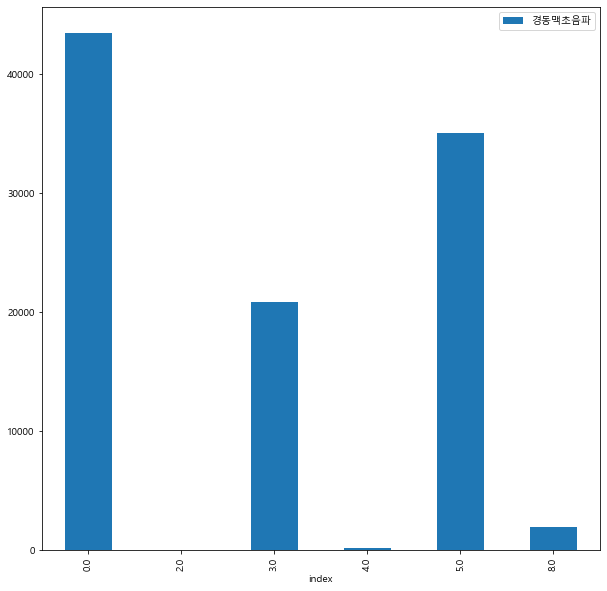

In [85]:
plt.rcParams["figure.figsize"] = (10, 10)
df[score_text_real].value_counts().reset_index().sort_values('index').plot.bar(x='index', y=score_text_real)

## 그룹별 결측값을 대체, 종합검진과 공단검진 차이(누락)에 대한 대체

In [86]:
df.isnull().sum()

검진년도                                0
UID                                 0
CU_REC_ID                           0
SEX                                 0
검진당시나이                              0
수축기 혈압                           7476
이완기 혈압                           6931
동맥경화검사                         894469
공복시혈당(FBS)                      12453
총콜레스테롤                         104948
HDL-콜레스테롤                      105053
LDL-콜레스테롤                      113579
중성지방(TG)                       104769
호모시스테인(Homocystein)           1049114
경동맥초음파 (Carotid Sono)_text     951920
경동맥초음파                        1112414
dtype: int64

In [87]:
df_group = df.groupby(['UID', '검진년도'])

In [88]:
temp = df.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [89]:
temp

['수축기 혈압',
 '이완기 혈압',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파 (Carotid Sono)_text',
 '경동맥초음파']

In [90]:
import time
start = time.time()
for col in temp:
    print('column :', col)
    df[col] = df_group[col].transform(lambda x: x.interpolate('nearest').ffill().bfill())
end = time.time()
print(f"{end - start:.5f} sec")

column : 수축기 혈압
column : 이완기 혈압
column : 동맥경화검사
column : 공복시혈당(FBS)
column : 총콜레스테롤
column : HDL-콜레스테롤
column : LDL-콜레스테롤
column : 중성지방(TG)
column : 호모시스테인(Homocystein)
column : 경동맥초음파 (Carotid Sono)_text
column : 경동맥초음파
8269.29183 sec


In [91]:
df.isnull().sum()

검진년도                                0
UID                                 0
CU_REC_ID                           0
SEX                                 0
검진당시나이                              0
수축기 혈압                           6435
이완기 혈압                           5940
동맥경화검사                         875003
공복시혈당(FBS)                      10700
총콜레스테롤                          61595
HDL-콜레스테롤                       61904
LDL-콜레스테롤                       70529
중성지방(TG)                        61551
호모시스테인(Homocystein)           1038143
경동맥초음파 (Carotid Sono)_text     935106
경동맥초음파                        1106621
dtype: int64

## nemeric으로 치환 못하는 수치들 결측치로 변환

In [92]:
numeric_col = df.drop(columns=[score_text + '_text']).columns

In [93]:
df[numeric_col] = df[numeric_col].apply(pd.to_numeric, errors='coerce')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   수축기 혈압                      1206722 non-null  float64
 6   이완기 혈압                      1207406 non-null  float64
 7   동맥경화검사                      4262 non-null     float64
 8   공복시혈당(FBS)                  1199640 non-null  float64
 9   총콜레스테롤                      1151191 non-null  float64
 10  HDL-콜레스테롤                   1146478 non-null  float64
 11  LDL-콜레스테롤                   1141538 non-null  float64
 12  중성지방(TG)                    1147041 non-null  float64
 1

In [95]:
df.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
count,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.213899e+06,1.206722e+06,1.207406e+06,4.262000e+03,1.199640e+06,1.151191e+06,1.146478e+06,1.141538e+06,1.147041e+06,172960.000000,107278.000000
mean,2.021881e+03,5.086762e+05,1.491305e+06,1.369421e+00,4.074524e+01,1.183101e+02,7.393575e+01,1.912686e+05,9.676183e+01,1.999425e+02,5.839979e+01,1.202473e+02,1.224728e+02,10.301544,2.494584
std,1.696427e+00,3.652092e+05,7.933459e+05,4.826483e-01,8.917396e+00,1.356297e+01,1.045497e+01,1.605937e+06,1.708342e+01,3.738881e+01,2.054792e+01,3.426813e+01,9.417363e+01,7.977136,2.340937
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-3.070000e+02,0.000000e+00,-9.700000,0.000000
25%,2.021000e+03,2.212800e+05,6.799645e+05,1.000000e+00,3.400000e+01,1.090000e+02,6.600000e+01,1.040000e+00,8.800000e+01,1.750000e+02,4.700000e+01,9.700000e+01,6.800000e+01,8.000000,0.000000
50%,2.022000e+03,3.806200e+05,1.409842e+06,1.000000e+00,4.000000e+01,1.180000e+02,7.300000e+01,1.130000e+00,9.400000e+01,1.980000e+02,5.600000e+01,1.186000e+02,9.800000e+01,9.700000,3.000000
75%,2.023000e+03,8.361275e+05,2.173650e+06,2.000000e+00,4.800000e+01,1.270000e+02,8.000000e+01,1.200000e+00,1.010000e+02,2.230000e+02,6.700000e+01,1.420000e+02,1.480000e+02,11.700000,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.130000e+03,9.920000e+02,2.180232e+07,6.140000e+02,2.230000e+03,9.998000e+03,1.129000e+03,6.110000e+03,2818.000000,8.000000


In [98]:
df[score_text_real].value_counts()

0.0    46203
5.0    36942
3.0    21840
8.0     2058
4.0      225
2.0       10
Name: 경동맥초음파, dtype: int64

In [554]:
df_result = df.drop(columns=[score_text + '_text']).copy()

# 이상치 제거

In [555]:
len(df_result)

1213899

In [556]:
# IQR 기준 이상치 확인하는 함수
def findOutliers_column(x, column):
    q1 = x[column].quantile(0.25)
    q3 = x[column].quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print('minimum :', minimum, 'maximum :', maximum)
    y = x[(x[column] > maximum) | (x[column] < minimum)]
#     y = x[(x[column] <= maximum) & (x[column] >= minimum)]
#     print(y.info())
#     print(y.index)
    return y, minimum, maximum

def findOutliers_column_out(x, column, minimum, maximum):
    y = x[(x[column] > maximum) | (x[column] < minimum)]
    return y
    
# IQR 기준 이상치 확인하는 함수
def findOutliers(x):
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3 - q1
    threshold = 1.5
    minimum = q1 - (iqr * threshold)
    maximum = q3 + (iqr * threshold)
    print(minimum)
    y = x[(x > maximum) | (x < minimum)]
#     return len(y)
    return y

## 이상치 컬럼 min, max 확인 및 drop

In [557]:
temp = df_result.columns.to_list()
for idx in ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']:
    temp.remove(idx)

In [558]:
# IQR 기준 이상치 개수 확인
# target_cols = [
#                '검진당시나이', 
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)', #기본신체정보
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                ]
target_cols = temp

minimums = []
maximums = []

for col in target_cols:
    target_outlier, temp_min, temp_max = findOutliers_column(df_result, col)
    print(col, ':', len(df_result[col]),"/ IQR outliers: ", len(target_outlier), '/ ratio :', len(target_outlier)/len(df_result[col]))
    print()
    minimums.append(temp_min)
    maximums.append(temp_max)

for idx, col in enumerate(target_cols):    
    target_outlier = findOutliers_column_out(df_result, col, minimums[idx], maximums[idx])
    df_result = df_result.drop(target_outlier.index)
    df_result.reset_index(drop=True, inplace=True)

minimum : 82.0 maximum : 154.0
수축기 혈압 : 1213899 / IQR outliers:  12845 / ratio : 0.010581605224157858

minimum : 45.0 maximum : 101.0
이완기 혈압 : 1213899 / IQR outliers:  11647 / ratio : 0.009594702689432976

minimum : 0.8000000000000002 maximum : 1.44
동맥경화검사 : 1213899 / IQR outliers:  1067 / ratio : 0.0008789858134820112

minimum : 68.5 maximum : 120.5
공복시혈당(FBS) : 1213899 / IQR outliers:  62750 / ratio : 0.05169293326710048

minimum : 103.0 maximum : 295.0
총콜레스테롤 : 1213899 / IQR outliers:  15563 / ratio : 0.012820671242006131

minimum : 17.0 maximum : 97.0
HDL-콜레스테롤 : 1213899 / IQR outliers:  18846 / ratio : 0.01552517960719961

minimum : 29.5 maximum : 209.5
LDL-콜레스테롤 : 1213899 / IQR outliers:  12453 / ratio : 0.010258678852194458

minimum : -52.0 maximum : 268.0
중성지방(TG) : 1213899 / IQR outliers:  63028 / ratio : 0.051921947377829625

minimum : 2.450000000000001 maximum : 17.25
호모시스테인(Homocystein) : 1213899 / IQR outliers:  6492 / ratio : 0.005348056139761216

minimum : -7.5 maximum :

In [559]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [560]:
minimums

[82.0,
 45.0,
 0.8000000000000002,
 68.5,
 103.0,
 17.0,
 29.5,
 -52.0,
 2.450000000000001,
 -7.5]

In [561]:
maximums

[154.0, 101.0, 1.44, 120.5, 295.0, 97.0, 209.5, 268.0, 17.25, 12.5]

In [562]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047485 entries, 0 to 1047484
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   검진년도                 1047485 non-null  int32  
 1   UID                  1047485 non-null  int64  
 2   CU_REC_ID            1047485 non-null  int64  
 3   SEX                  1047485 non-null  int64  
 4   검진당시나이               1047485 non-null  int64  
 5   수축기 혈압               1040943 non-null  float64
 6   이완기 혈압               1041428 non-null  float64
 7   동맥경화검사               2624 non-null     float64
 8   공복시혈당(FBS)           1034130 non-null  float64
 9   총콜레스테롤               988364 non-null   float64
 10  HDL-콜레스테롤            983715 non-null   float64
 11  LDL-콜레스테롤            980330 non-null   float64
 12  중성지방(TG)             984241 non-null   float64
 13  호모시스테인(Homocystein)  140571 non-null   float64
 14  경동맥초음파               86766 non-null    float64
dty

In [563]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
0,2010,7282,2520,1,42,110.0,66.0,NaN,83.0,224.0,73.0,139.0,98.0,NaN,NaN
1,2010,8634,4751,1,43,120.0,80.0,NaN,96.0,176.0,54.0,94.8,136.0,NaN,NaN
2,2010,11158,1703,1,37,100.0,70.0,NaN,86.0,185.0,51.0,99.8,171.0,NaN,NaN
3,2010,13020,2211,1,34,110.0,70.0,NaN,101.0,164.0,57.0,93.8,66.0,NaN,NaN
4,2010,13999,3816,1,53,150.0,90.0,NaN,112.0,201.0,55.0,111.0,174.0,NaN,NaN


In [564]:
len(df_result)

1047485

In [565]:
df_result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047485 entries, 0 to 1047484
Data columns (total 15 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   검진년도                 1047485 non-null  int32  
 1   UID                  1047485 non-null  int64  
 2   CU_REC_ID            1047485 non-null  int64  
 3   SEX                  1047485 non-null  int64  
 4   검진당시나이               1047485 non-null  int64  
 5   수축기 혈압               1040943 non-null  float64
 6   이완기 혈압               1041428 non-null  float64
 7   동맥경화검사               2624 non-null     float64
 8   공복시혈당(FBS)           1034130 non-null  float64
 9   총콜레스테롤               988364 non-null   float64
 10  HDL-콜레스테롤            983715 non-null   float64
 11  LDL-콜레스테롤            980330 non-null   float64
 12  중성지방(TG)             984241 non-null   float64
 13  호모시스테인(Homocystein)  140571 non-null   float64
 14  경동맥초음파               86766 non-null    float64
dty

In [566]:
df_result.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
count,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.040943e+06,1.041428e+06,2624.000000,1.034130e+06,988364.000000,983715.000000,980330.000000,984241.000000,140571.000000,86766.000000
mean,2.021875e+03,5.089993e+05,1.492023e+06,1.394415e+00,4.025906e+01,1.172436e+02,7.300558e+01,1.124314,9.403731e+01,197.727674,58.702748,120.181665,105.239328,9.700153,2.363092
std,1.701536e+00,3.652430e+05,7.933201e+05,4.887250e-01,8.876492e+00,1.246718e+01,9.582318e+00,0.084747,9.116322e+00,33.278751,13.679559,31.371875,51.862055,2.608417,2.333131
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,8.200000e+01,4.500000e+01,0.830000,6.880000e+01,103.000000,17.000000,29.900000,2.000000,2.500000,0.000000
25%,2.021000e+03,2.211840e+05,6.811510e+05,1.000000e+00,3.300000e+01,1.080000e+02,6.600000e+01,1.070000,8.800000e+01,175.000000,48.000000,98.000000,66.000000,7.800000,0.000000
50%,2.022000e+03,3.810510e+05,1.416011e+06,1.000000e+00,4.000000e+01,1.170000e+02,7.300000e+01,1.130000,9.400000e+01,196.000000,57.000000,119.000000,92.000000,9.500000,3.000000
75%,2.023000e+03,8.356970e+05,2.174332e+06,2.000000e+00,4.700000e+01,1.260000e+02,8.000000e+01,1.180000,1.000000e+02,220.000000,68.000000,141.000000,134.000000,11.390000,5.000000
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.540000e+02,1.010000e+02,1.430000,1.204000e+02,295.000000,97.000000,209.500000,268.000000,17.250000,8.000000


# 스크리닝

## 스크리닝

### 수축기 혈압

In [567]:
screening = 80

In [568]:
scr_col = '수축기 혈압'

In [569]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파


In [570]:
len(df_result[df_result[scr_col] < screening])

0

In [571]:
df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [572]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파


In [573]:
len(df_result[df_result[scr_col] < screening])

0

### 이완기 혈압

In [574]:
screening = 40

In [575]:
scr_col = '이완기 혈압'

In [576]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파


In [577]:
len(df_result[df_result[scr_col] < screening])

0

In [578]:
df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [579]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파


In [580]:
len(df_result[df_result[scr_col] < screening])

0

### 공복시 혈당

In [581]:
screening = 50

In [582]:
scr_col = '공복시혈당(FBS)'

In [583]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파


In [584]:
len(df_result[df_result[scr_col] < screening])

0

In [585]:
df_result.loc[df_result[scr_col] < screening, scr_col] = screening

In [586]:
df_result[df_result[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파


In [587]:
len(df_result[df_result[scr_col] < screening])

0

# 변수 생성

## 혈압 차이

In [588]:
df_result['혈압차이'] = df_result['수축기 혈압'] - df_result['이완기 혈압']

## 콜레스테롤 차이

In [589]:
df_result['콜레스테롤차이'] = df_result['총콜레스테롤'] / df_result['HDL-콜레스테롤']

In [590]:
df_result['콜레스테롤차이'] = df_result['콜레스테롤차이'].round(2)

## 컬럼 순서 변경

In [591]:
df_result.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', 'LDL-콜레스테롤', '중성지방(TG)',
       '호모시스테인(Homocystein)', '경동맥초음파', '혈압차이', '콜레스테롤차이'],
      dtype='object')

In [592]:
cols_temp = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
        '수축기 혈압', '이완기 혈압', '혈압차이', '동맥경화검사', 
        '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
        '중성지방(TG)', '호모시스테인(Homocystein)', score_text_real,        
       ]

df_result = df_result[cols_temp]

In [593]:
target_cols = [
    '수축기 혈압',
    '이완기 혈압',
    '혈압차이',
    '동맥경화검사',
    '공복시혈당(FBS)',
    '총콜레스테롤',
    'HDL-콜레스테롤',
    '콜레스테롤차이',
    'LDL-콜레스테롤',
    '중성지방(TG)',
    '호모시스테인(Homocystein)',
    '경동맥초음파'
]

# target (건강지수) 계산

In [594]:
len(df_result)

1047485

## Linear Regression coefficient 계산

In [595]:
def LR_coef(df):
    df_ = df.copy()
#     df_.reset_index(drop=True, inplace=True)
    df_.fillna(df_.mean().round(2), inplace=True)
    print(len(df_))
    
    df_temp = pd.DataFrame()

    for age in range(df_['검진당시나이'].min(), df_['검진당시나이'].max()):
        temp_ = df_[df_['검진당시나이'] == age].sample(n = sample_len, replace=True)
        df_temp = pd.concat([df_temp, temp_])
        
    X_train, X_test, y_train, y_test = train_test_split(df_temp[target_cols], df_temp['검진당시나이'], test_size=0.25, random_state=87)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print('r2_score :',r2_score(y_test, y_pred))
    print('MAE :',mean_absolute_error(y_test, y_pred))
    print('model.coef_ :',model.coef_)
    print('model.intercept_ :',model.intercept_)
    
    df_['target_org'] = (model.coef_[0] * df_[target_cols[0]]) 
    + (model.coef_[1] * df_[target_cols[1]]) 
    + (model.coef_[2] * df_[target_cols[2]]) 
    + (model.coef_[3] * df_[target_cols[3]]) 
    + (model.coef_[4] * df_[target_cols[4]]) 
    + (model.coef_[5] * df_[target_cols[5]]) 
    + (model.coef_[6] * df_[target_cols[6]])
    + (model.coef_[7] * df_[target_cols[7]])
    
    df_['target'] = ((df_['target_org'] - df_['target_org'].min()) / (df_['target_org'].max() - df_['target_org'].min()))
        
    print('min :', df_['target_org'].min())
    print('max :', df_['target_org'].max())
    
    df_['target'] = (df_['target'] * 100) + 50
    
    df['target'] = df_['target']
    
    return df

In [596]:
# target_cols

In [597]:
# df_man = df_result[df_result['SEX'] == 1]
# df_man = LR_coef(df_man)

In [598]:
# df_man[df_man['target'].isna()]

In [599]:
# df_woman = df_result[df_result['SEX'] == 2]
# df_woman = LR_coef(df_woman)

In [600]:
# df_target = pd.concat([df_man, df_woman])

In [601]:
# len(df_target)

In [602]:
# df_target.dropna(subset=target_cols, how='all', inplace=True)
# df_target.reset_index(drop=True, inplace=True)

In [603]:
# len(df_target)

In [604]:
# df_target[df_target['target'].isna()]

In [605]:
# df_target.info()

In [606]:
# df_target.head()

In [607]:
# df_target['target'] = np.round(df_target['target'])
# df_target['target'] = df_target['target'].astype(int)

In [608]:
# len(df_target)

In [609]:
# df_target.describe()

In [610]:
# df_target[df_target['target'] == 50]

In [611]:
# df_target[df_target['target'] == 150]

## target (건강지수) 컬럼들간 mean으로 계산

In [612]:
# df_target = pd.DataFrame()

# for age in range(int(df_result['검진당시나이'].min()), int(df_result['검진당시나이'].max()) + 1):
# # for age in range(int(df_result['검진당시나이'].min()), 21):
    
#     df_cols = pd.DataFrame()
#     for col in target_cols:
#         df_temp = df_result[df_result['검진당시나이'] == age].copy()
#         df_temp['target_' + col] = ((df_temp[col] - df_temp[col].min()) / (df_temp[col].max() - df_temp[col].min()))
# #         print(age, df_temp[col].min(), df_temp[col].max(), df_temp[col].mean())
#         temp = df_temp['target_' + col].copy()
#         df_cols = pd.concat([df_cols, temp], axis=1)
    
#     df_cols['target'] = np.round(df_cols.mean(axis='columns') * 100) + 50
# #     df_target = pd.concat([df_target,pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols], axis=1)])
    
#     df_age = pd.concat([df_result[df_result['검진당시나이'] == age].copy(), df_cols['target']], axis=1)        
    
#     df_target = pd.concat([df_target, df_age])
    
# df_target.reset_index(drop=True, inplace=True)
# df_target.dropna(subset=['target'], inplace=True)
# df_target['target'] = df_target['target'].astype(int)

In [613]:
# len(df_target)

In [614]:
# df_target.head()

In [615]:
# df_target.info()

## gaussian_kde

<AxesSubplot:>

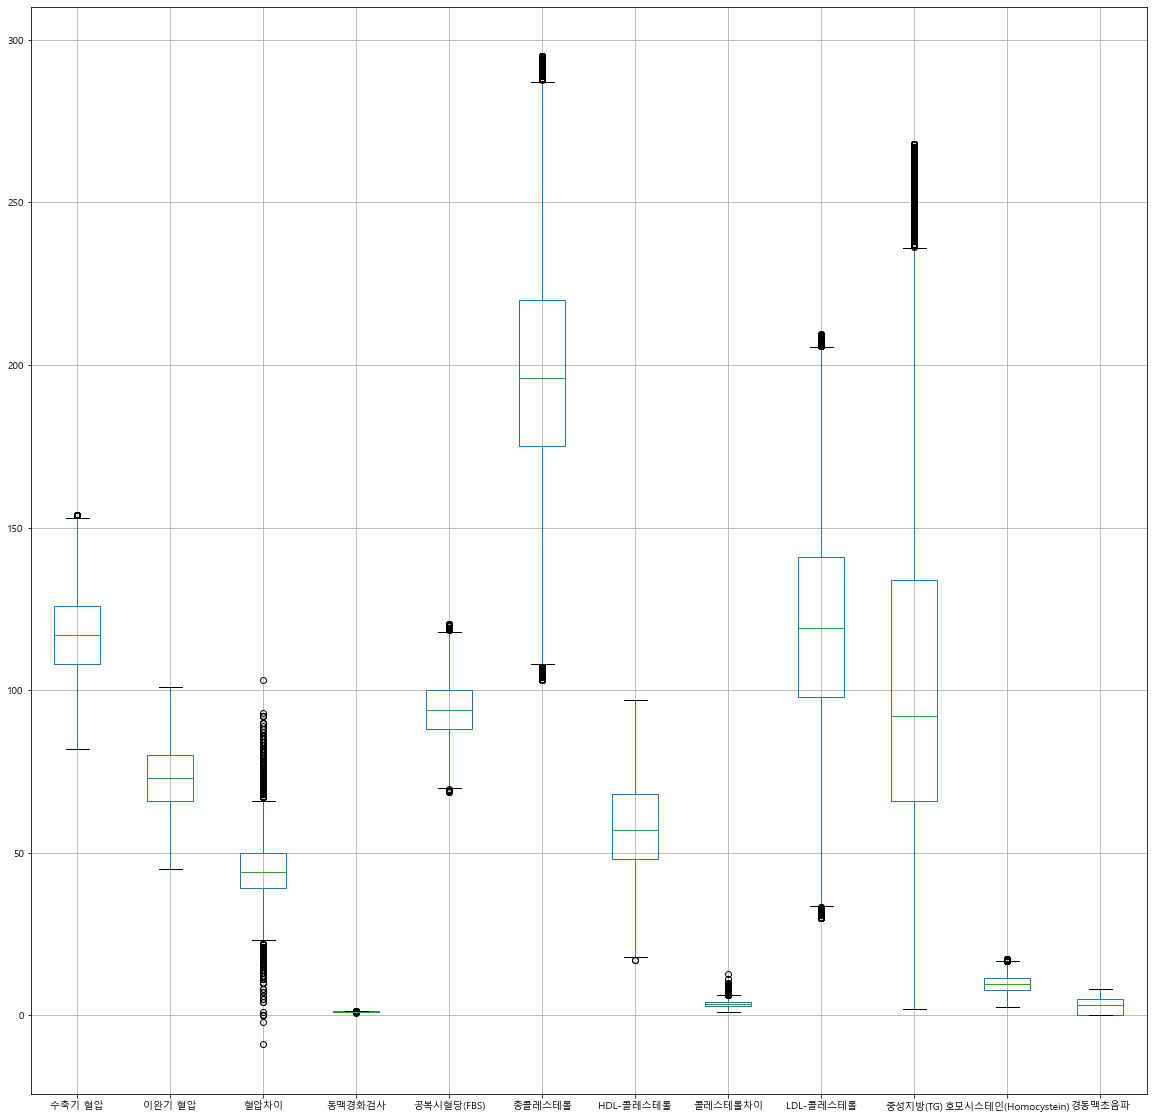

In [616]:
plt.rcParams["figure.figsize"] = (20, 20)
df_result.boxplot(column=target_cols)

In [617]:
df_result.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
0,2010,7282,2520,1,42,110.0,66.0,44.0,NaN,83.0,224.0,73.0,3.07,139.0,98.0,NaN,NaN
1,2010,8634,4751,1,43,120.0,80.0,40.0,NaN,96.0,176.0,54.0,3.26,94.8,136.0,NaN,NaN
2,2010,11158,1703,1,37,100.0,70.0,30.0,NaN,86.0,185.0,51.0,3.63,99.8,171.0,NaN,NaN
3,2010,13020,2211,1,34,110.0,70.0,40.0,NaN,101.0,164.0,57.0,2.88,93.8,66.0,NaN,NaN
4,2010,13999,3816,1,53,150.0,90.0,60.0,NaN,112.0,201.0,55.0,3.65,111.0,174.0,NaN,NaN


In [618]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [619]:
len(target_cols)

12

In [620]:
target_cols_direction

['center',
 'center',
 True,
 False,
 True,
 'center',
 'center',
 'center',
 True,
 'center',
 'center',
 True]

In [621]:
def kde_col(df, cols):
    
    threshold = 100
    max_threshold = 150
    
    df_target = pd.DataFrame() # return DF
    
    # 연령대별로 sample_len개 샘플링
    tmp_data = df.groupby(['SEX', '검진당시나이']).apply(
        lambda x: x.sample(sample_len, replace=True, random_state=42))

    tmp_data.reset_index(drop=True, inplace=True)
    
    # 성연령별 모델 생성
    for sex, age in product([1, 2], range(df['검진당시나이'].min(), df['검진당시나이'].max() + 1)):    
        tmp_data2 = tmp_data[tmp_data['SEX'] == sex]
        tmp_data3 = tmp_data2[tmp_data2['검진당시나이'] == age]
        
        df_temp = df[df['SEX'] == sex]
        df_temp = df_temp[df_temp['검진당시나이'] == age]
        df_temp.reset_index(drop=True, inplace=True)
            
        df_age = pd.DataFrame()
        
        for index, col in enumerate(cols):
        
            input_data = tmp_data3[col].copy()
            
            # 결측치가 많을 때 평균을 넣게 되면 평균쪽으로 쏠림
#             try:
#                 input_data.fillna(input_data.mean().round(0), inplace=True)
#             except:                
#                 input_data.fillna(tmp_data2[col].mean().round(0), inplace=True)

            input_data.dropna(inplace = True)
                
            input_data = input_data.sort_values()
            
            if len(input_data.value_counts()) > 1:
                # kde 모델
                kde = gaussian_kde(input_data)
                result = kde(input_data)
                max_value = result.max()            

                df_col = df_temp[col].copy()
                df_col.fillna(df_col.mean().round(0), inplace=True)

                # 방향성이 있을 경우
                max_idx = result.argmax()  # 최대값의 인덱스
                std_value = input_data.iloc[max_idx] # 인덱스 최대값의 밸류값

                '''
                display print
                '''
#                 print('')
#                 print('@@ col :',col)
#                 plt.rcParams["figure.figsize"] = (5, 5)
#                 print('sex :',sex)
#                 print('age :',age)
#                 fig = plt.figure()
#                 ax = fig.add_subplot(111)
#                 x_eval = np.linspace(50, 140, num=200)
#                 ax.plot(input_data, result, 'k-')                
#                 plt.show()
#                 print('max_value: ',max_value)
#                 print('std_value: ',std_value)

                arr = []

                temp = pd.DataFrame(kde(df_col), columns=['kde'])

                if target_cols_direction[index]:
                    # center right
                    temp['trigger'] = (df_col >= std_value)
                elif target_cols_direction[index] == False:
                    # center left
                    temp['trigger'] = (df_col < std_value)

                if target_cols_direction[index] != 'center':
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * threshold if trigger else (1 + (1 - (temp['kde'].iloc[idx] / max_value))) * threshold
                                      for idx, trigger in temp['trigger'].iteritems()]
                else:                
                    temp['output'] = [(temp['kde'].iloc[idx] / max_value) * (threshold * 1.5) for idx, value in temp['kde'].iteritems()]

    #             temp['gap'] = abs(temp['output'] - threshold)            
    #             a = 11
    #             temp['adjusted_gap'] = [np.log(temp['gap'].iloc[idx]) * a if gap> np.e else gap for idx, gap in temp['gap'].iteritems()]            
    #             temp[col + '_kde'] = [threshold - temp['adjusted_gap'].iloc[idx] if trigger else threshold + temp['adjusted_gap'].iloc[idx] for idx, trigger in temp['trigger'].iteritems()]

                temp[col + '_kde'] = temp['output']
                temp[col + '_kde'] = temp[col + '_kde'].round(2)
            else:
                temp[col + '_kde'] = threshold
            
            df_age = pd.concat([df_age, temp[col + '_kde']], axis=1)

        df_temp = pd.concat([df_temp, df_age], axis=1)
        df_target = pd.concat([df_target, df_temp])
        df_target.reset_index(drop=True, inplace=True)
    
    # Null 이면 100
    for col in cols:
        for idx in df_target[col][df_target[col].isnull()].index:        
            df_target.loc[idx, col + '_kde'] = threshold
            
#     df_target['kde_mean'] = df_target.iloc[:, (5+len(cols)):(5+len(cols)+len(cols))].mean('columns').round(2)
    
#     for col in target_cols:
#         df_target.drop([col + '_kde'], axis = 1, inplace = True)
    
    df_target.sort_values(by='CU_REC_ID', inplace=True)
    
    return df_target

In [622]:
target_cols[:11]

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)']

## 심각도는 kde 제외

In [623]:
import time
start = time.time()
df_target = kde_col(df_result, target_cols[:11])
# df_target = kde_col(df_result, target_cols)
end = time.time()
print(f"{end - start:.5f} sec")

2148.62233 sec


## 이상소견 심각도 scaling

In [624]:
target_cols[11]

'경동맥초음파'

In [625]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde
279927,2010,609272,143,1,40,130.0,80.0,50.0,NaN,88.0,265.0,46.0,5.76,189.0,129.0,NaN,NaN,112.00,148.05,84.64,100.0,130.48,37.47,144.84,36.35,18.09,123.35,100.0
533581,2010,585711,154,1,52,121.0,80.0,41.0,NaN,92.0,228.0,36.0,6.33,171.0,146.0,NaN,NaN,147.18,143.54,100.04,100.0,113.82,104.49,51.83,9.26,43.51,94.74,100.0
455170,2010,593983,156,1,48,125.0,90.0,35.0,NaN,86.0,191.0,41.0,4.66,138.0,105.0,NaN,NaN,129.38,59.77,149.40,100.0,149.85,148.39,94.29,105.91,97.89,139.38,100.0
256759,2010,612330,185,1,39,118.0,78.0,40.0,NaN,95.0,170.0,51.0,3.33,107.0,62.0,NaN,NaN,149.29,148.94,112.20,100.0,100.95,98.61,137.36,139.17,107.85,101.59,100.0
24164,2010,645901,212,1,28,117.0,67.0,50.0,NaN,88.0,194.0,51.0,3.80,133.0,51.0,NaN,NaN,146.56,134.72,100.00,100.0,115.98,144.67,144.68,111.86,81.21,116.94,100.0


In [626]:
# 심각도 Min
# score_min = 0
# score_max = 10
# df_target[target_cols[3]+'_scaling'] = ((((df_target[target_cols[3]] - 0) / (10 - 0)) * -1) + 1) * 200

df_target[score_text_real + '_scaling'] = (100 - (df_target[score_text_real] * 10))

In [627]:
# df_target[target_cols[3]+'_scaling'] = df_target[target_cols[3]+'_scaling'].replace(100, 200)

In [628]:
df_target[score_text_real].value_counts()

0.0    39726
5.0    28148
3.0    17204
8.0     1487
4.0      193
2.0        8
Name: 경동맥초음파, dtype: int64

In [629]:
df_target[score_text_real + '_scaling'].value_counts()

100.0    39726
50.0     28148
70.0     17204
20.0      1487
60.0       193
80.0         8
Name: 경동맥초음파_scaling, dtype: int64

In [630]:
target_cols[11]

'경동맥초음파'

In [631]:
df_target[target_cols[11]].isnull().sum()

960719

In [632]:
df_target[score_text_real + '_scaling'].isnull().sum()

960719

## 경동맥초음파 결측치 

In [633]:
target_cols[11]

'경동맥초음파'

In [634]:
df_target[target_cols[11]].fillna(fill_th, inplace=True)
df_target[score_text_real + '_scaling'].fillna(fill_th_score, inplace=True)

In [635]:
df_target['kde_mean'] = df_target.iloc[:, (5+len(target_cols)):(5+len(target_cols)+len(target_cols))].mean('columns').round(2)

In [636]:
df_target['kde_mean'].min()

22.22

In [637]:
df_target['kde_mean'].max()

136.58

In [638]:
df_target.sort_values(by=['검진당시나이', 'SEX']).head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean
15,2019,152079,325977,1,20,140.0,87.0,53.0,NaN,83.0,169.0,33.0,5.12,128.0,144.0,NaN,1.0,53.57,28.44,90.17,100.0,152.14,137.30,14.28,5.18,36.38,18.52,100.00,90.0,68.83
36,2019,392728,325980,1,20,114.0,74.0,40.0,NaN,85.0,181.0,51.0,3.55,116.0,60.0,NaN,1.0,103.87,103.47,140.35,100.0,133.66,125.63,122.42,105.72,63.20,145.10,100.00,90.0,111.12
38,2019,438481,325982,1,20,102.0,59.0,43.0,NaN,90.0,135.0,57.0,2.37,58.0,63.0,NaN,1.0,32.53,71.86,138.90,100.0,101.64,60.39,150.00,79.74,176.24,149.60,100.00,90.0,104.24
39,2019,439691,326889,1,20,126.0,66.0,60.0,NaN,97.0,200.0,77.0,2.60,111.0,61.0,NaN,1.0,101.91,119.10,46.82,100.0,76.80,83.46,17.69,116.56,78.16,147.15,100.00,90.0,89.80
16,2019,153352,327360,1,20,120.0,72.0,48.0,NaN,88.0,170.0,68.0,2.50,91.0,53.0,NaN,1.0,146.62,128.65,107.53,100.0,111.19,135.37,48.43,102.00,100.84,118.54,100.00,90.0,107.43
11,2019,130234,328771,1,20,124.0,78.0,46.0,NaN,88.0,157.0,48.0,3.27,93.0,82.0,NaN,1.0,106.22,74.37,123.59,100.0,111.19,145.28,137.81,139.23,100.02,117.57,100.00,90.0,112.11
29,2019,339160,328877,1,20,136.0,76.0,60.0,NaN,94.0,168.0,61.0,2.75,85.0,111.0,NaN,1.0,69.37,81.11,46.82,100.0,90.39,139.39,108.89,139.62,109.83,41.45,100.00,90.0,93.07
6,2019,41096,329045,1,20,138.0,71.0,67.0,NaN,98.9,161.3,57.3,2.82,93.4,77.9,NaN,1.0,67.67,141.61,29.25,100.0,55.87,149.95,148.79,147.36,100.00,127.02,100.00,90.0,104.79
7,2019,117629,330495,1,20,105.0,66.0,39.0,NaN,76.0,198.0,57.0,3.47,151.0,71.0,NaN,1.0,43.00,119.10,146.85,100.0,185.89,89.30,150.00,118.13,22.42,141.50,100.00,90.0,108.85
27,2019,331204,330752,1,20,136.0,79.0,57.0,NaN,100.0,157.0,51.7,3.04,91.0,92.0,NaN,1.0,69.37,78.43,56.87,100.0,46.24,145.28,121.69,141.09,100.84,83.10,100.00,90.0,94.41


In [639]:
df_target['검진당시나이'].value_counts()

40    46799
38    46279
36    44270
42    42196
34    39918
39    39733
32    39528
30    39311
37    39297
41    38857
35    37317
44    35262
43    33642
31    33112
33    32755
46    32150
28    31245
48    31047
50    30300
29    28915
45    28762
47    27814
49    27427
51    26625
52    25949
27    21526
53    21237
54    19209
26    18316
55    13766
56    12160
57    10170
25     9857
58     9090
59     7065
24     6585
60     5108
23     3131
22     2430
61     1474
62     1420
21     1207
20     1052
63     1006
64      979
65      657
66      599
67      390
68      359
69      182
Name: 검진당시나이, dtype: int64

In [640]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean
count,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.040943e+06,1.041428e+06,1.040846e+06,2624.000000,1.034130e+06,988364.000000,983715.000000,983400.000000,980330.000000,984241.000000,140571.000000,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06
mean,2.021875e+03,5.089993e+05,1.492023e+06,1.394415e+00,4.025906e+01,1.172436e+02,7.300558e+01,4.423885e+01,1.124314,9.403731e+01,197.727674,58.702748,3.540331,120.181665,105.239328,9.700153,1.112909e+00,1.042587e+02,1.079497e+02,9.789709e+01,1.000026e+02,9.701843e+01,1.049687e+02,1.058916e+02,1.060472e+02,9.743641e+01,1.021288e+02,1.007626e+02,8.887091e+01,1.011027e+02
std,1.701536e+00,3.652430e+05,7.933201e+05,4.887250e-01,8.876492e+00,1.246718e+01,9.582318e+00,7.990641e+00,0.084747,9.116322e+00,33.278751,13.679559,0.985753,31.371875,51.862055,2.608417,7.694487e-01,3.958909e+01,3.980133e+01,4.013430e+01,2.374727e+00,4.165576e+01,3.972287e+01,3.933998e+01,3.993235e+01,3.861225e+01,4.115454e+01,1.523782e+01,7.694487e+00,1.244347e+01
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,8.200000e+01,4.500000e+01,-9.000000e+00,0.830000,6.880000e+01,103.000000,17.000000,1.120000,29.900000,2.000000,2.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e-01,0.000000e+00,0.000000e+00,7.000000e-02,5.000000e-02,0.000000e+00,2.000000e+01,2.222000e+01
25%,2.021000e+03,2.211840e+05,6.811510e+05,1.000000e+00,3.300000e+01,1.080000e+02,6.600000e+01,3.900000e+01,1.070000,8.800000e+01,175.000000,48.000000,2.790000,98.000000,66.000000,7.800000,1.000000e+00,7.858000e+01,8.168000e+01,7.934000e+01,1.000000e+02,7.197000e+01,7.991000e+01,8.163000e+01,8.193000e+01,7.844000e+01,7.322000e+01,1.000000e+02,9.000000e+01,9.368000e+01
50%,2.022000e+03,3.810510e+05,1.416011e+06,1.000000e+00,4.000000e+01,1.170000e+02,7.300000e+01,4.400000e+01,1.130000,9.400000e+01,196.000000,57.000000,3.380000,119.000000,92.000000,9.500000,1.000000e+00,1.134700e+02,1.212400e+02,9.910000e+01,1.000000e+02,1.000000e+02,1.133700e+02,1.146900e+02,1.153400e+02,1.000000e+02,1.094300e+02,1.000000e+02,9.000000e+01,1.024600e+02
75%,2.023000e+03,8.356970e+05,2.174332e+06,2.000000e+00,4.700000e+01,1.260000e+02,8.000000e+01,5.000000e+01,1.180000,1.000000e+02,220.000000,68.000000,4.150000,141.000000,134.000000,11.390000,1.000000e+00,1.388600e+02,1.416400e+02,1.162400e+02,1.000000e+02,1.184300e+02,1.401900e+02,1.409000e+02,1.412000e+02,1.148500e+02,1.393700e+02,1.000000e+02,9.000000e+01,1.100400e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.540000e+02,1.010000e+02,1.030000e+02,1.430000,1.204000e+02,295.000000,97.000000,12.590000,209.500000,268.000000,17.250000,8.000000e+00,1.500000e+02,1.500000e+02,2.000000e+02,2.000000e+02,1.997200e+02,1.500300e+02,1.501300e+02,1.500000e+02,1.999600e+02,1.500200e+02,1.501100e+02,1.000000e+02,1.365800e+02


## 검진 항목 별 가중치 

In [641]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean
279927,2010,609272,143,1,40,130.0,80.0,50.0,NaN,88.0,265.0,46.0,5.76,189.0,129.0,NaN,1.0,112.00,148.05,84.64,100.0,130.48,37.47,144.84,36.35,18.09,123.35,100.0,90.0,93.77
533581,2010,585711,154,1,52,121.0,80.0,41.0,NaN,92.0,228.0,36.0,6.33,171.0,146.0,NaN,1.0,147.18,143.54,100.04,100.0,113.82,104.49,51.83,9.26,43.51,94.74,100.0,90.0,91.53
455170,2010,593983,156,1,48,125.0,90.0,35.0,NaN,86.0,191.0,41.0,4.66,138.0,105.0,NaN,1.0,129.38,59.77,149.40,100.0,149.85,148.39,94.29,105.91,97.89,139.38,100.0,90.0,113.69
256759,2010,612330,185,1,39,118.0,78.0,40.0,NaN,95.0,170.0,51.0,3.33,107.0,62.0,NaN,1.0,149.29,148.94,112.20,100.0,100.95,98.61,137.36,139.17,107.85,101.59,100.0,90.0,115.50
24164,2010,645901,212,1,28,117.0,67.0,50.0,NaN,88.0,194.0,51.0,3.80,133.0,51.0,NaN,1.0,146.56,134.72,100.00,100.0,115.98,144.67,144.68,111.86,81.21,116.94,100.0,90.0,115.55


In [642]:
target_cols_kde

['수축기 혈압_kde',
 '이완기 혈압_kde',
 '혈압차이_kde',
 '동맥경화검사_kde',
 '경동맥초음파_scaling',
 '공복시혈당(FBS)_kde',
 '총콜레스테롤_kde',
 'HDL-콜레스테롤_kde',
 '콜레스테롤차이_kde',
 'LDL-콜레스테롤_kde',
 '중성지방(TG)_kde',
 '호모시스테인(Homocystein)_kde']

In [643]:
target_cols_ratio

[4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

In [644]:
sum(target_cols_ratio)

38

In [645]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047485 entries, 279927 to 160473
Data columns (total 30 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   검진년도                     1047485 non-null  int32  
 1   UID                      1047485 non-null  int64  
 2   CU_REC_ID                1047485 non-null  int64  
 3   SEX                      1047485 non-null  int64  
 4   검진당시나이                   1047485 non-null  int64  
 5   수축기 혈압                   1040943 non-null  float64
 6   이완기 혈압                   1041428 non-null  float64
 7   혈압차이                     1040846 non-null  float64
 8   동맥경화검사                   2624 non-null     float64
 9   공복시혈당(FBS)               1034130 non-null  float64
 10  총콜레스테롤                   988364 non-null   float64
 11  HDL-콜레스테롤                983715 non-null   float64
 12  콜레스테롤차이                  983400 non-null   float64
 13  LDL-콜레스테롤                980330 non-nu

In [646]:
target_cols_ratio[4], df_target[target_cols_kde[4]]

(3,
 279927     90.0
 533581     90.0
 455170     90.0
 256759     90.0
 24164      90.0
            ... 
 921352     90.0
 377288     90.0
 134853     90.0
 1033889    90.0
 160473     90.0
 Name: 경동맥초음파_scaling, Length: 1047485, dtype: float64)

In [647]:
df_target['kde_mean'] = (
      (target_cols_ratio[0] * df_target[target_cols_kde[0]])
    + (target_cols_ratio[1] * df_target[target_cols_kde[1]])
    + (target_cols_ratio[2] * df_target[target_cols_kde[2]])  
    + (target_cols_ratio[3] * df_target[target_cols_kde[3]])
    + (target_cols_ratio[4] * df_target[target_cols_kde[4]])
    + (target_cols_ratio[5] * df_target[target_cols_kde[5]])
    + (target_cols_ratio[6] * df_target[target_cols_kde[6]])
    + (target_cols_ratio[7] * df_target[target_cols_kde[7]])
    + (target_cols_ratio[8] * df_target[target_cols_kde[8]])
    + (target_cols_ratio[9] * df_target[target_cols_kde[9]])
    + (target_cols_ratio[10] * df_target[target_cols_kde[10]])
    + (target_cols_ratio[11] * df_target[target_cols_kde[11]])
) / sum(target_cols_ratio)

In [648]:
df_target['kde_mean'] = np.round(df_target['kde_mean'], 2)

<AxesSubplot:>

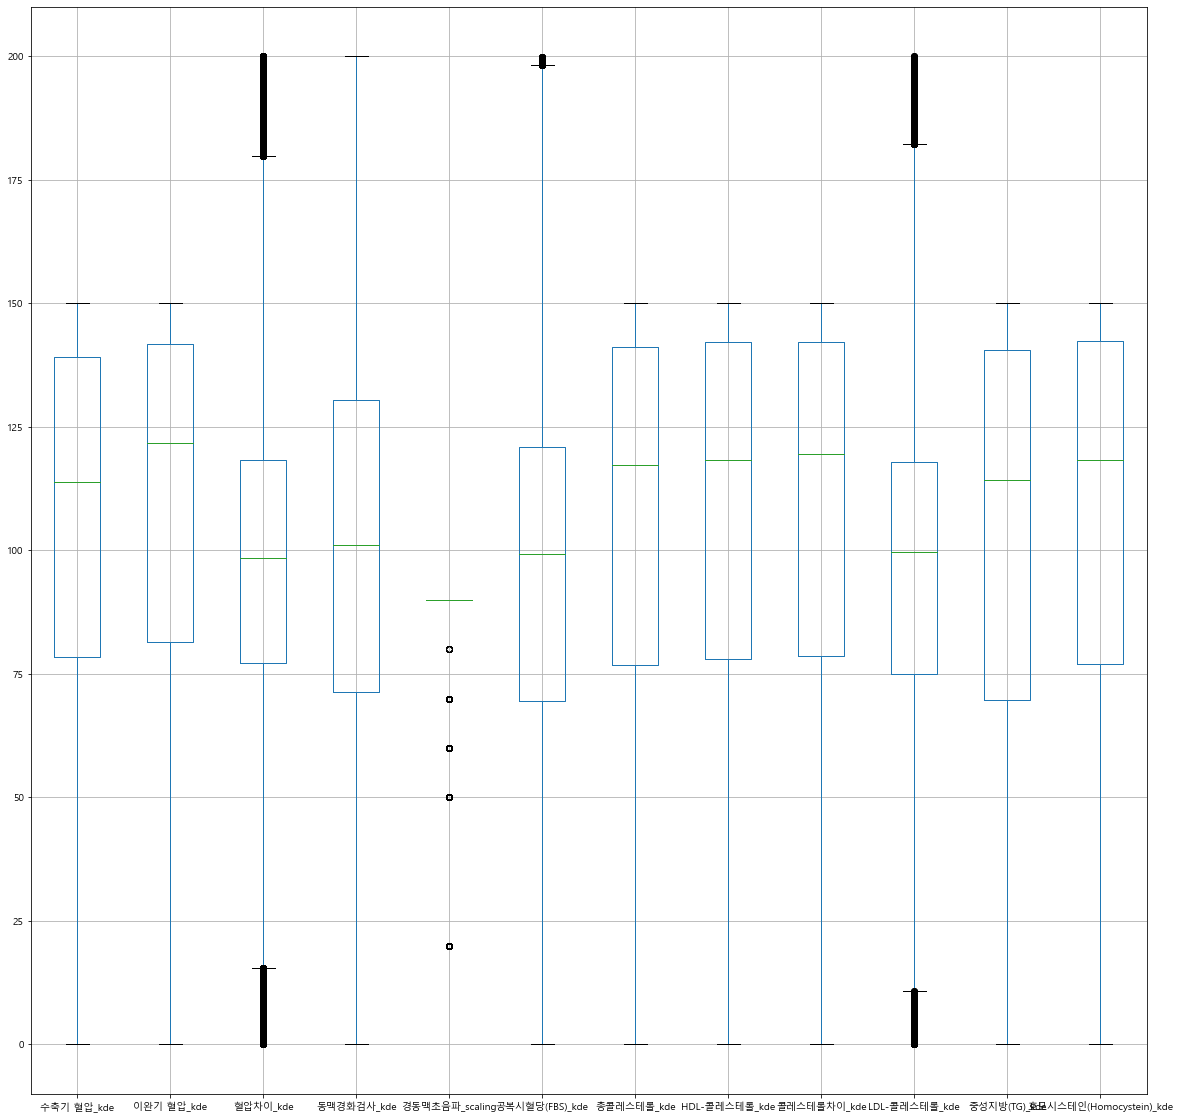

In [649]:
plt.rcParams["figure.figsize"] = (20, 20)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

<AxesSubplot:>

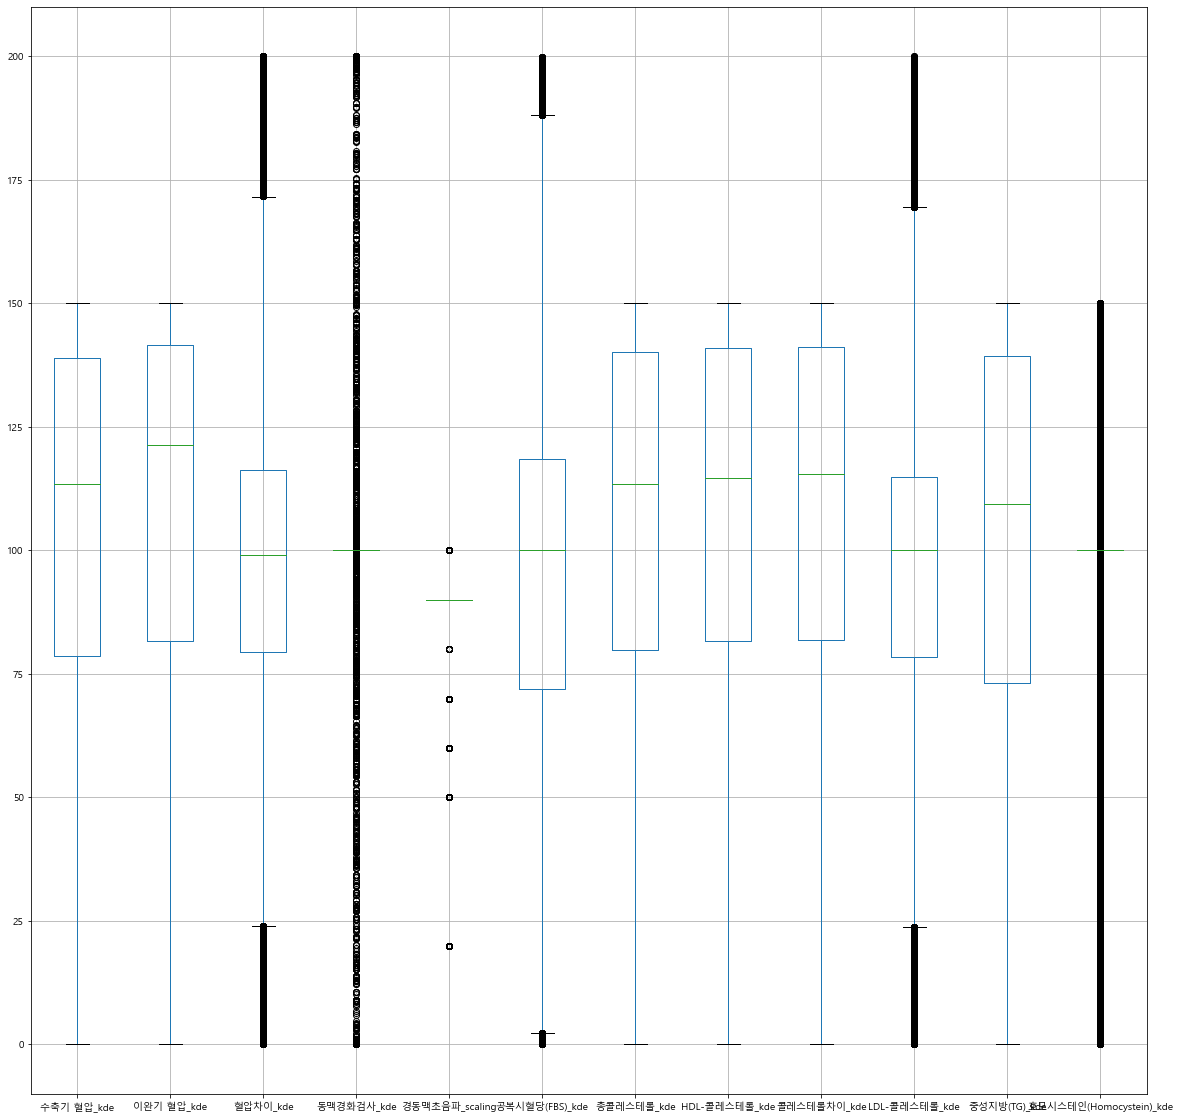

In [650]:
plt.rcParams["figure.figsize"] = (20, 20)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=target_cols_kde)

## target Scaling

In [651]:
df_target['kde_mean'].min()

21.19

In [652]:
df_target['kde_mean'].max()

136.19

In [653]:
# df_target['target'] = ((df_target['kde_mean'] - df_target['kde_mean'].min()) / (df_target['kde_mean'].max() - df_target['kde_mean'].min()))
df_target['target'] = ((df_target['kde_mean'] - 0) / (200 - 0))

In [654]:
df_target['target'] = (df_target['target'] * 100) + 50

In [655]:
df_target['target'] = df_target['target'].round(0)

In [656]:
df_target['target'].value_counts().reset_index().sort_values('index')

,index,target
53,61.0,1
51,66.0,8
50,67.0,11
49,68.0,19
48,69.0,30
46,70.0,67
45,71.0,105
43,72.0,156
42,73.0,161
41,74.0,252


In [657]:
df_target.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
count,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.040943e+06,1.041428e+06,1.040846e+06,2624.000000,1.034130e+06,988364.000000,983715.000000,983400.000000,980330.000000,984241.000000,140571.000000,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06,1.047485e+06
mean,2.021875e+03,5.089993e+05,1.492023e+06,1.394415e+00,4.025906e+01,1.172436e+02,7.300558e+01,4.423885e+01,1.124314,9.403731e+01,197.727674,58.702748,3.540331,120.181665,105.239328,9.700153,1.112909e+00,1.042587e+02,1.079497e+02,9.789709e+01,1.000026e+02,9.701843e+01,1.049687e+02,1.058916e+02,1.060472e+02,9.743641e+01,1.021288e+02,1.007626e+02,8.887091e+01,1.013660e+02,1.006846e+02
std,1.701536e+00,3.652430e+05,7.933201e+05,4.887250e-01,8.876492e+00,1.246718e+01,9.582318e+00,7.990641e+00,0.084747,9.116322e+00,33.278751,13.679559,0.985753,31.371875,51.862055,2.608417,7.694487e-01,3.958909e+01,3.980133e+01,4.013430e+01,2.374727e+00,4.165576e+01,3.972287e+01,3.933998e+01,3.993235e+01,3.861225e+01,4.115454e+01,1.523782e+01,7.694487e+00,1.279529e+01,6.403867e+00
min,2.010000e+03,3.200000e+01,1.430000e+02,1.000000e+00,2.000000e+01,8.200000e+01,4.500000e+01,-9.000000e+00,0.830000,6.880000e+01,103.000000,17.000000,1.120000,29.900000,2.000000,2.500000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.400000e-01,0.000000e+00,0.000000e+00,7.000000e-02,5.000000e-02,0.000000e+00,2.000000e+01,2.119000e+01,6.100000e+01
25%,2.021000e+03,2.211840e+05,6.811510e+05,1.000000e+00,3.300000e+01,1.080000e+02,6.600000e+01,3.900000e+01,1.070000,8.800000e+01,175.000000,48.000000,2.790000,98.000000,66.000000,7.800000,1.000000e+00,7.858000e+01,8.168000e+01,7.934000e+01,1.000000e+02,7.197000e+01,7.991000e+01,8.163000e+01,8.193000e+01,7.844000e+01,7.322000e+01,1.000000e+02,9.000000e+01,9.366000e+01,9.700000e+01
50%,2.022000e+03,3.810510e+05,1.416011e+06,1.000000e+00,4.000000e+01,1.170000e+02,7.300000e+01,4.400000e+01,1.130000,9.400000e+01,196.000000,57.000000,3.380000,119.000000,92.000000,9.500000,1.000000e+00,1.134700e+02,1.212400e+02,9.910000e+01,1.000000e+02,1.000000e+02,1.133700e+02,1.146900e+02,1.153400e+02,1.000000e+02,1.094300e+02,1.000000e+02,9.000000e+01,1.028200e+02,1.010000e+02
75%,2.023000e+03,8.356970e+05,2.174332e+06,2.000000e+00,4.700000e+01,1.260000e+02,8.000000e+01,5.000000e+01,1.180000,1.000000e+02,220.000000,68.000000,4.150000,141.000000,134.000000,11.390000,1.000000e+00,1.388600e+02,1.416400e+02,1.162400e+02,1.000000e+02,1.184300e+02,1.401900e+02,1.409000e+02,1.412000e+02,1.148500e+02,1.393700e+02,1.000000e+02,9.000000e+01,1.106400e+02,1.050000e+02
max,2.024000e+03,1.473645e+06,2.871445e+06,2.000000e+00,6.900000e+01,1.540000e+02,1.010000e+02,1.030000e+02,1.430000,1.204000e+02,295.000000,97.000000,12.590000,209.500000,268.000000,17.250000,8.000000e+00,1.500000e+02,1.500000e+02,2.000000e+02,2.000000e+02,1.997200e+02,1.500300e+02,1.501300e+02,1.500000e+02,1.999600e+02,1.500200e+02,1.501100e+02,1.000000e+02,1.361900e+02,1.180000e+02


<AxesSubplot:>

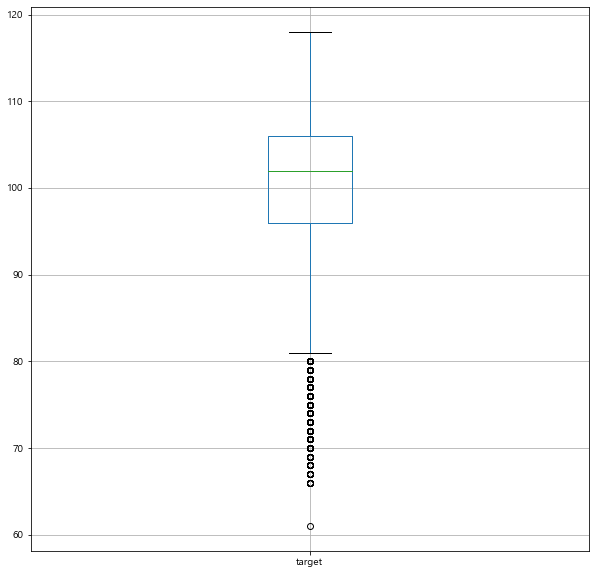

In [658]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

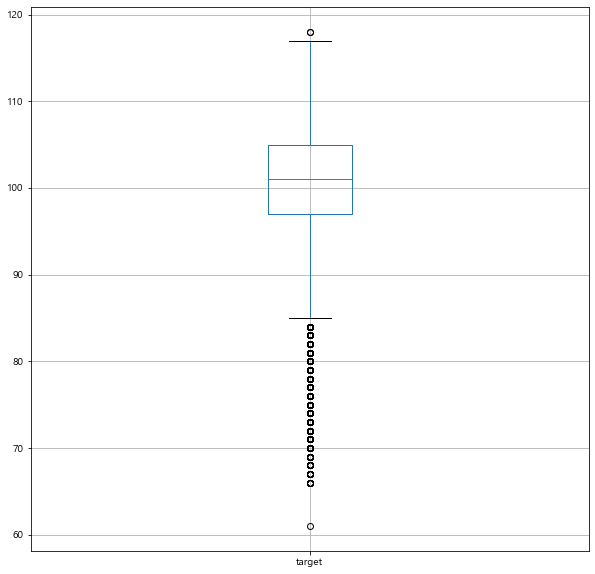

In [659]:
plt.rcParams["figure.figsize"] = (10, 10)
df_boxplot = df_target.copy()
# df_boxplot.replace(100, np.NaN, inplace=True)
df_boxplot.boxplot(column=['target'])

<AxesSubplot:>

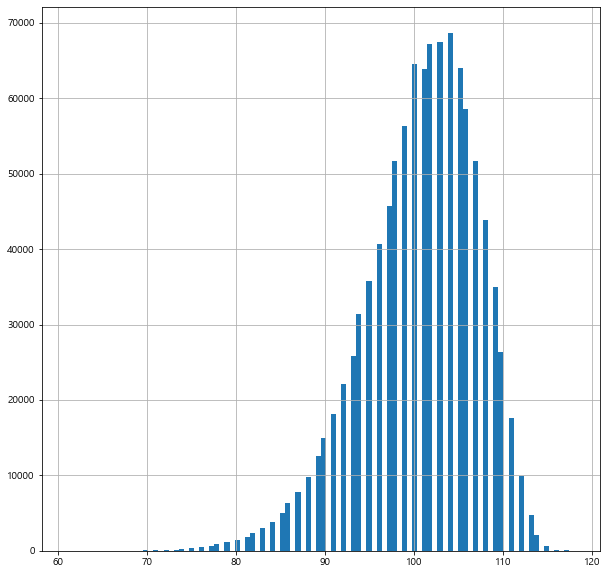

In [660]:
df_boxplot['target'].hist(bins=100)

## target 계산 결과

<AxesSubplot:xlabel='검진당시나이'>

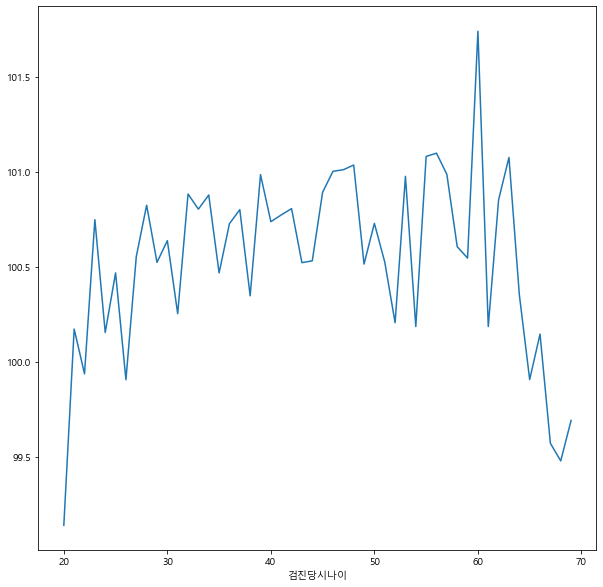

In [661]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').mean()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

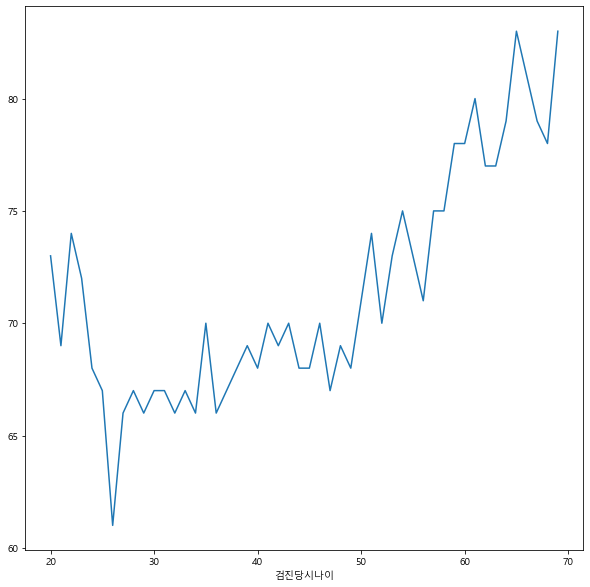

In [662]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').min()['target'].plot()

<AxesSubplot:xlabel='검진당시나이'>

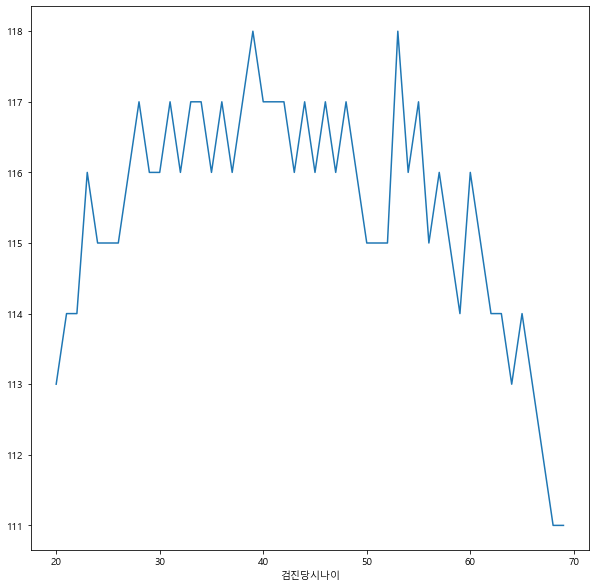

In [663]:
plt.rcParams["figure.figsize"] = (10, 10)
df_target.groupby('검진당시나이').max()['target'].plot()

In [664]:
df_target.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
279927,2010,609272,143,1,40,130.0,80.0,50.0,NaN,88.0,265.0,46.0,5.76,189.0,129.0,NaN,1.0,112.00,148.05,84.64,100.0,130.48,37.47,144.84,36.35,18.09,123.35,100.0,90.0,95.68,98.0
533581,2010,585711,154,1,52,121.0,80.0,41.0,NaN,92.0,228.0,36.0,6.33,171.0,146.0,NaN,1.0,147.18,143.54,100.04,100.0,113.82,104.49,51.83,9.26,43.51,94.74,100.0,90.0,94.37,97.0
455170,2010,593983,156,1,48,125.0,90.0,35.0,NaN,86.0,191.0,41.0,4.66,138.0,105.0,NaN,1.0,129.38,59.77,149.40,100.0,149.85,148.39,94.29,105.91,97.89,139.38,100.0,90.0,112.68,106.0
256759,2010,612330,185,1,39,118.0,78.0,40.0,NaN,95.0,170.0,51.0,3.33,107.0,62.0,NaN,1.0,149.29,148.94,112.20,100.0,100.95,98.61,137.36,139.17,107.85,101.59,100.0,90.0,117.27,109.0
24164,2010,645901,212,1,28,117.0,67.0,50.0,NaN,88.0,194.0,51.0,3.80,133.0,51.0,NaN,1.0,146.56,134.72,100.00,100.0,115.98,144.67,144.68,111.86,81.21,116.94,100.0,90.0,116.87,108.0


# 결측행 제거

In [665]:
# df_result.dropna(axis=0).info()

In [666]:
# df_result.dropna(axis=0, inplace=True)

# 남성 모델

In [667]:
df_target['SEX'].value_counts()

1    634341
2    413144
Name: SEX, dtype: int64

In [668]:
df_man = df_target[df_target['SEX'] == 1]
len(df_man)

634341

In [669]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
279927,2010,609272,143,1,40,130.0,80.0,50.0,NaN,88.0,265.0,46.0,5.76,189.0,129.0,NaN,1.0,112.00,148.05,84.64,100.0,130.48,37.47,144.84,36.35,18.09,123.35,100.0,90.0,95.68,98.0
533581,2010,585711,154,1,52,121.0,80.0,41.0,NaN,92.0,228.0,36.0,6.33,171.0,146.0,NaN,1.0,147.18,143.54,100.04,100.0,113.82,104.49,51.83,9.26,43.51,94.74,100.0,90.0,94.37,97.0
455170,2010,593983,156,1,48,125.0,90.0,35.0,NaN,86.0,191.0,41.0,4.66,138.0,105.0,NaN,1.0,129.38,59.77,149.40,100.0,149.85,148.39,94.29,105.91,97.89,139.38,100.0,90.0,112.68,106.0
256759,2010,612330,185,1,39,118.0,78.0,40.0,NaN,95.0,170.0,51.0,3.33,107.0,62.0,NaN,1.0,149.29,148.94,112.20,100.0,100.95,98.61,137.36,139.17,107.85,101.59,100.0,90.0,117.27,109.0
24164,2010,645901,212,1,28,117.0,67.0,50.0,NaN,88.0,194.0,51.0,3.80,133.0,51.0,NaN,1.0,146.56,134.72,100.00,100.0,115.98,144.67,144.68,111.86,81.21,116.94,100.0,90.0,116.87,108.0


# 결측치 처리

## 결측치 삭제

In [670]:
# df_man.dropna(inplace=True)

In [671]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
279927,2010,609272,143,1,40,130.0,80.0,50.0,NaN,88.0,265.0,46.0,5.76,189.0,129.0,NaN,1.0,112.00,148.05,84.64,100.0,130.48,37.47,144.84,36.35,18.09,123.35,100.0,90.0,95.68,98.0
533581,2010,585711,154,1,52,121.0,80.0,41.0,NaN,92.0,228.0,36.0,6.33,171.0,146.0,NaN,1.0,147.18,143.54,100.04,100.0,113.82,104.49,51.83,9.26,43.51,94.74,100.0,90.0,94.37,97.0
455170,2010,593983,156,1,48,125.0,90.0,35.0,NaN,86.0,191.0,41.0,4.66,138.0,105.0,NaN,1.0,129.38,59.77,149.40,100.0,149.85,148.39,94.29,105.91,97.89,139.38,100.0,90.0,112.68,106.0
256759,2010,612330,185,1,39,118.0,78.0,40.0,NaN,95.0,170.0,51.0,3.33,107.0,62.0,NaN,1.0,149.29,148.94,112.20,100.0,100.95,98.61,137.36,139.17,107.85,101.59,100.0,90.0,117.27,109.0
24164,2010,645901,212,1,28,117.0,67.0,50.0,NaN,88.0,194.0,51.0,3.80,133.0,51.0,NaN,1.0,146.56,134.72,100.00,100.0,115.98,144.67,144.68,111.86,81.21,116.94,100.0,90.0,116.87,108.0


## 결측치 평균으로 대체

In [672]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [673]:
# 나이로 group by, 결측치를 평균으로 대체
# df_man = df_man.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [674]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [675]:
len(df_man)

634341

In [676]:
df_man.dropna(subset=target_cols, how='all', inplace=True)

In [677]:
len(df_man)

634341

In [678]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
279927,2010,609272,143,1,40,130.0,80.0,50.0,NaN,88.0,265.0,46.0,5.76,189.0,129.0,NaN,1.0,112.00,148.05,84.64,100.0,130.48,37.47,144.84,36.35,18.09,123.35,100.0,90.0,95.68,98.0
533581,2010,585711,154,1,52,121.0,80.0,41.0,NaN,92.0,228.0,36.0,6.33,171.0,146.0,NaN,1.0,147.18,143.54,100.04,100.0,113.82,104.49,51.83,9.26,43.51,94.74,100.0,90.0,94.37,97.0
455170,2010,593983,156,1,48,125.0,90.0,35.0,NaN,86.0,191.0,41.0,4.66,138.0,105.0,NaN,1.0,129.38,59.77,149.40,100.0,149.85,148.39,94.29,105.91,97.89,139.38,100.0,90.0,112.68,106.0
256759,2010,612330,185,1,39,118.0,78.0,40.0,NaN,95.0,170.0,51.0,3.33,107.0,62.0,NaN,1.0,149.29,148.94,112.20,100.0,100.95,98.61,137.36,139.17,107.85,101.59,100.0,90.0,117.27,109.0
24164,2010,645901,212,1,28,117.0,67.0,50.0,NaN,88.0,194.0,51.0,3.80,133.0,51.0,NaN,1.0,146.56,134.72,100.00,100.0,115.98,144.67,144.68,111.86,81.21,116.94,100.0,90.0,116.87,108.0


## fillna

In [679]:
df_man.mean().round(2)

검진년도                          2021.91
UID                         516475.66
CU_REC_ID                  1499113.48
SEX                              1.00
검진당시나이                          41.50
수축기 혈압                         120.98
이완기 혈압                          75.58
혈압차이                            45.40
동맥경화검사                           1.14
공복시혈당(FBS)                      96.08
총콜레스테롤                         199.94
HDL-콜레스테롤                       53.94
콜레스테롤차이                          3.86
LDL-콜레스테롤                      124.62
중성지방(TG)                       120.36
호모시스테인(Homocystein)             10.46
경동맥초음파                           1.17
수축기 혈압_kde                     102.50
이완기 혈압_kde                     107.87
혈압차이_kde                        98.37
동맥경화검사_kde                     100.00
공복시혈당(FBS)_kde                  96.91
총콜레스테롤_kde                     105.00
HDL-콜레스테롤_kde                  104.65
콜레스테롤차이_kde                    108.26
LDL-콜레스테롤_kde                   99.16
중성지방(TG)_kde

In [680]:
df_man.fillna(df_man.mean().round(2), inplace=True)

In [681]:
# df_man.fillna(0, inplace=True)

## IterativeImputer

In [682]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_target))
# df_impute.columns = df.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [683]:
# import time
# start = time.time()
# np_imputed = mice(df_man.values) # mice 학습시작
# df_man = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

# 중복 제거

In [684]:
len(df_man)

634341

In [685]:
len(df_man)

634341

In [686]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_man.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [687]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
2277,2011,32,11757,1,24,113.0,68.0,45.0,1.14,84.00,148.00,58.00,2.55,75.00,74.00,10.46,1.0,128.38,137.40,112.21,100.0,140.72,92.84,141.52,130.25,142.63,138.39,100.00,90.0,121.81,111.0
552604,2019,50,356493,1,53,137.0,85.0,52.0,1.14,85.00,197.00,49.00,4.02,114.00,172.00,10.46,1.0,68.00,103.17,56.99,100.0,162.38,149.83,149.94,130.17,105.11,95.31,100.00,90.0,108.00,104.0
585139,2021,50,642497,1,55,118.0,79.0,39.0,1.14,105.00,232.00,54.00,4.30,135.00,217.00,10.46,1.0,148.83,148.15,112.55,100.0,64.14,92.67,133.77,109.48,99.44,33.16,100.00,90.0,105.09,103.0
280425,2019,62,421626,1,40,119.0,83.0,36.0,1.14,90.00,272.00,63.00,4.32,192.00,86.00,8.50,1.0,150.00,118.34,147.14,100.0,112.67,26.45,80.66,137.18,16.46,148.10,138.64,90.0,106.98,103.0
309609,2020,62,565527,1,41,119.0,72.0,47.0,1.14,89.00,265.00,58.00,4.57,173.00,168.00,10.00,1.0,150.00,135.47,96.58,100.0,133.71,35.36,109.12,111.19,37.87,73.54,148.83,90.0,103.96,102.0
336040,2021,62,699357,1,42,124.0,81.0,43.0,1.14,92.00,248.00,50.00,4.96,169.00,144.00,9.60,1.0,126.80,137.54,98.85,100.0,105.30,62.89,150.00,94.54,46.80,110.13,143.74,90.0,106.95,103.0
362742,2022,62,1356310,1,43,116.0,82.0,34.0,1.14,79.00,247.00,55.00,4.49,173.00,91.00,7.83,1.0,136.31,133.85,161.83,100.0,184.06,62.85,124.33,129.79,31.29,147.27,106.11,90.0,118.24,109.0
389173,2023,62,2170394,1,44,128.0,81.0,47.0,1.14,89.00,237.00,61.40,3.86,154.00,108.00,8.14,1.0,103.72,133.47,90.56,100.0,130.68,97.47,93.42,147.28,70.69,143.85,111.42,90.0,109.86,105.0
535370,2020,67,481109,1,52,140.0,89.0,51.0,1.14,113.00,266.00,63.00,4.22,176.00,147.00,10.46,1.0,44.67,77.17,66.46,100.0,35.47,29.30,69.58,130.97,34.51,93.57,100.00,90.0,72.02,86.0
539440,2022,76,1377275,1,52,140.0,88.0,52.0,1.14,115.00,174.00,55.00,3.16,101.00,92.00,10.46,1.0,44.67,85.73,56.10,100.0,31.37,100.88,125.69,134.69,124.87,147.96,100.00,90.0,93.59,97.0


In [688]:
len(df_man)

634341

In [689]:
df_man[target_cols]

,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
2277,113.0,68.0,45.0,1.14,84.0,148.00,58.00,2.55,75.00,74.00,10.46,1.0
552604,137.0,85.0,52.0,1.14,85.0,197.00,49.00,4.02,114.00,172.00,10.46,1.0
585139,118.0,79.0,39.0,1.14,105.0,232.00,54.00,4.30,135.00,217.00,10.46,1.0
280425,119.0,83.0,36.0,1.14,90.0,272.00,63.00,4.32,192.00,86.00,8.50,1.0
309609,119.0,72.0,47.0,1.14,89.0,265.00,58.00,4.57,173.00,168.00,10.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
199824,137.0,79.0,58.0,1.14,95.0,216.00,37.00,5.84,159.00,99.00,10.46,0.0
50219,130.0,80.0,50.0,1.14,90.0,259.00,63.00,4.11,171.00,125.00,10.46,1.0
272630,136.0,88.0,48.0,1.14,95.0,237.00,49.00,4.84,124.62,199.00,10.46,1.0
562593,127.0,86.0,41.0,1.14,92.0,183.00,51.00,3.59,116.00,78.00,10.46,1.0


## first만 남겨두고 중복 제거

In [690]:
df_man = df_man.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [691]:
len(df_man)

536847

In [692]:
df_man.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
2277,2011,32,11757,1,24,113.0,68.0,45.0,1.14,84.00,148.00,58.00,2.55,75.00,74.00,10.46,1.0,128.38,137.40,112.21,100.0,140.72,92.84,141.52,130.25,142.63,138.39,100.00,90.0,121.81,111.0
552604,2019,50,356493,1,53,137.0,85.0,52.0,1.14,85.00,197.00,49.00,4.02,114.00,172.00,10.46,1.0,68.00,103.17,56.99,100.0,162.38,149.83,149.94,130.17,105.11,95.31,100.00,90.0,108.00,104.0
585139,2021,50,642497,1,55,118.0,79.0,39.0,1.14,105.00,232.00,54.00,4.30,135.00,217.00,10.46,1.0,148.83,148.15,112.55,100.0,64.14,92.67,133.77,109.48,99.44,33.16,100.00,90.0,105.09,103.0
280425,2019,62,421626,1,40,119.0,83.0,36.0,1.14,90.00,272.00,63.00,4.32,192.00,86.00,8.50,1.0,150.00,118.34,147.14,100.0,112.67,26.45,80.66,137.18,16.46,148.10,138.64,90.0,106.98,103.0
309609,2020,62,565527,1,41,119.0,72.0,47.0,1.14,89.00,265.00,58.00,4.57,173.00,168.00,10.00,1.0,150.00,135.47,96.58,100.0,133.71,35.36,109.12,111.19,37.87,73.54,148.83,90.0,103.96,102.0
336040,2021,62,699357,1,42,124.0,81.0,43.0,1.14,92.00,248.00,50.00,4.96,169.00,144.00,9.60,1.0,126.80,137.54,98.85,100.0,105.30,62.89,150.00,94.54,46.80,110.13,143.74,90.0,106.95,103.0
362742,2022,62,1356310,1,43,116.0,82.0,34.0,1.14,79.00,247.00,55.00,4.49,173.00,91.00,7.83,1.0,136.31,133.85,161.83,100.0,184.06,62.85,124.33,129.79,31.29,147.27,106.11,90.0,118.24,109.0
389173,2023,62,2170394,1,44,128.0,81.0,47.0,1.14,89.00,237.00,61.40,3.86,154.00,108.00,8.14,1.0,103.72,133.47,90.56,100.0,130.68,97.47,93.42,147.28,70.69,143.85,111.42,90.0,109.86,105.0
535370,2020,67,481109,1,52,140.0,89.0,51.0,1.14,113.00,266.00,63.00,4.22,176.00,147.00,10.46,1.0,44.67,77.17,66.46,100.0,35.47,29.30,69.58,130.97,34.51,93.57,100.00,90.0,72.02,86.0
539440,2022,76,1377275,1,52,140.0,88.0,52.0,1.14,115.00,174.00,55.00,3.16,101.00,92.00,10.46,1.0,44.67,85.73,56.10,100.0,31.37,100.88,125.69,134.69,124.87,147.96,100.00,90.0,93.59,97.0


In [693]:
df_man.reset_index(drop=True, inplace=True)

In [694]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
0,2011,32,11757,1,24,113.0,68.0,45.0,1.14,84.0,148.0,58.0,2.55,75.0,74.0,10.46,1.0,128.38,137.40,112.21,100.0,140.72,92.84,141.52,130.25,142.63,138.39,100.00,90.0,121.81,111.0
1,2019,50,356493,1,53,137.0,85.0,52.0,1.14,85.0,197.0,49.0,4.02,114.0,172.0,10.46,1.0,68.00,103.17,56.99,100.0,162.38,149.83,149.94,130.17,105.11,95.31,100.00,90.0,108.00,104.0
2,2021,50,642497,1,55,118.0,79.0,39.0,1.14,105.0,232.0,54.0,4.30,135.0,217.0,10.46,1.0,148.83,148.15,112.55,100.0,64.14,92.67,133.77,109.48,99.44,33.16,100.00,90.0,105.09,103.0
3,2019,62,421626,1,40,119.0,83.0,36.0,1.14,90.0,272.0,63.0,4.32,192.0,86.0,8.50,1.0,150.00,118.34,147.14,100.0,112.67,26.45,80.66,137.18,16.46,148.10,138.64,90.0,106.98,103.0
4,2020,62,565527,1,41,119.0,72.0,47.0,1.14,89.0,265.0,58.0,4.57,173.0,168.0,10.00,1.0,150.00,135.47,96.58,100.0,133.71,35.36,109.12,111.19,37.87,73.54,148.83,90.0,103.96,102.0


In [695]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536847 entries, 0 to 536846
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   검진년도                     536847 non-null  int32  
 1   UID                      536847 non-null  int64  
 2   CU_REC_ID                536847 non-null  int64  
 3   SEX                      536847 non-null  int64  
 4   검진당시나이                   536847 non-null  int64  
 5   수축기 혈압                   536847 non-null  float64
 6   이완기 혈압                   536847 non-null  float64
 7   혈압차이                     536847 non-null  float64
 8   동맥경화검사                   536847 non-null  float64
 9   공복시혈당(FBS)               536847 non-null  float64
 10  총콜레스테롤                   536847 non-null  float64
 11  HDL-콜레스테롤                536847 non-null  float64
 12  콜레스테롤차이                  536847 non-null  float64
 13  LDL-콜레스테롤                536847 non-null  float64
 14  중성지방

# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

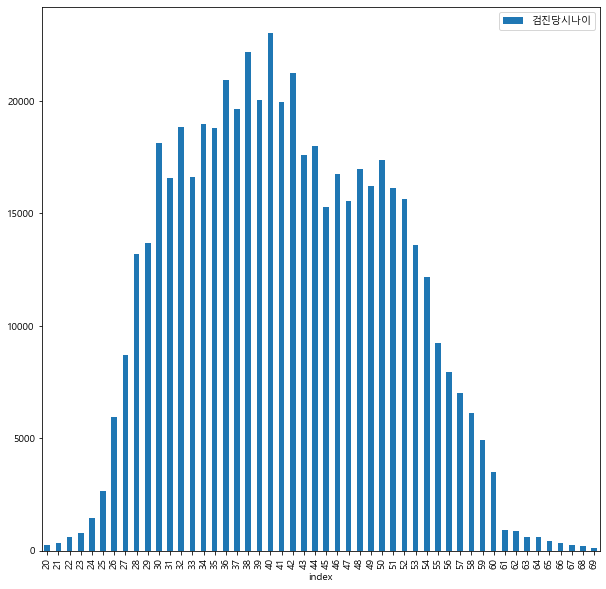

In [696]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [697]:
df_man['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
47,20,231
45,21,321
41,22,592
39,23,775
36,24,1437
35,25,2642
32,26,5959
28,27,8688
25,28,13187
23,29,13703


# 검진항목 시각화

In [698]:
df_man.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
count,536847.000000,5.368470e+05,5.368470e+05,536847.0,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000,536847.000000
mean,2021.851896,5.121808e+05,1.495268e+06,1.0,41.461325,121.056392,75.624007,45.434950,1.139993,96.121375,200.015018,53.870642,3.868342,124.647364,120.385232,10.464671,1.167280,102.650362,107.768447,98.227781,99.999197,96.709866,105.003285,104.680647,108.089819,99.100201,103.996075,100.933397,88.327196,101.496784,100.750000
std,1.764410,3.652193e+05,8.084791e+05,0.0,8.906968,11.340823,9.066527,7.889414,0.004497,8.988082,33.236019,11.498088,0.961703,30.956076,52.021695,0.943668,0.892291,38.565844,39.208857,39.154619,2.420479,41.683333,39.428310,40.297571,38.551073,37.930150,39.355959,16.023371,8.922908,12.017444,6.015082
min,2010.000000,3.200000e+01,1.430000e+02,1.0,20.000000,82.000000,45.000000,1.000000,0.830000,68.800000,103.000000,17.000000,1.300000,29.900000,4.000000,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.360000,0.420000,0.010000,0.000000,0.900000,0.380000,0.000000,20.000000,39.020000,70.000000
25%,2021.000000,2.229240e+05,6.619635e+05,1.0,34.000000,113.000000,69.000000,40.000000,1.140000,90.000000,178.000000,46.000000,3.170000,104.000000,81.000000,10.460000,1.000000,78.180000,81.810000,82.310000,100.000000,70.110000,79.630000,79.900000,86.070000,81.320000,76.020000,100.000000,90.000000,94.010000,97.000000
50%,2022.000000,3.829260e+05,1.425246e+06,1.0,41.000000,120.000000,75.580000,45.000000,1.140000,96.000000,199.940000,53.000000,3.860000,124.620000,115.000000,10.460000,1.000000,110.860000,120.100000,99.240000,100.000000,100.000000,113.140000,113.480000,117.510000,100.000000,111.190000,100.000000,90.000000,102.600000,101.000000
75%,2023.000000,8.396685e+05,2.193660e+06,1.0,48.000000,129.000000,82.000000,50.000000,1.140000,102.000000,222.000000,60.000000,4.450000,145.000000,150.000000,10.460000,1.000000,134.850000,141.350000,113.140000,100.000000,118.630000,140.100000,140.440000,141.710000,116.340000,139.790000,100.000000,90.000000,110.210000,105.000000
max,2024.000000,1.473645e+06,2.871445e+06,1.0,69.000000,154.000000,101.000000,103.000000,1.430000,120.400000,295.000000,97.000000,12.590000,209.500000,268.000000,17.250000,8.000000,150.000000,150.000000,200.000000,200.000000,199.720000,150.030000,150.130000,150.000000,199.960000,150.010000,150.080000,100.000000,134.590000,117.000000


<AxesSubplot:xlabel='검진당시나이'>

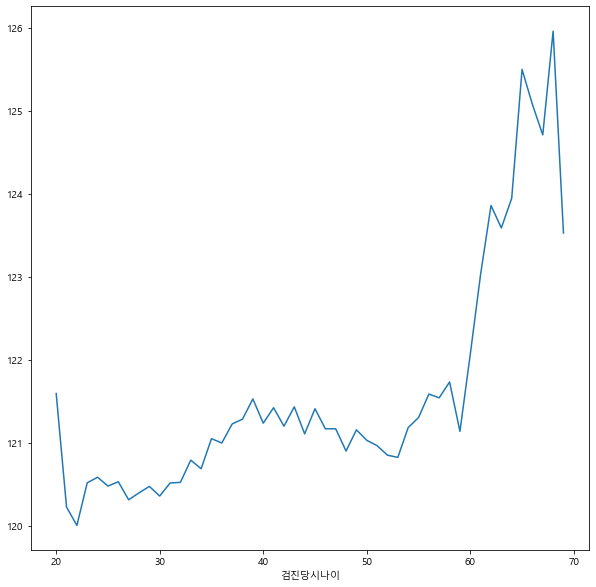

In [699]:
df_man.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

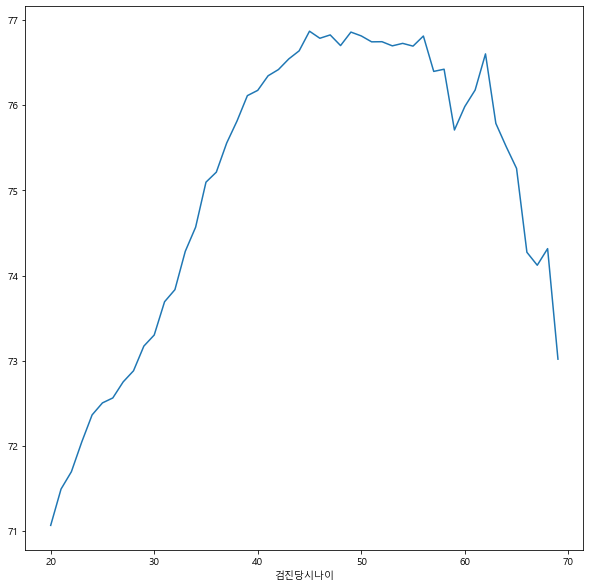

In [700]:
df_man.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

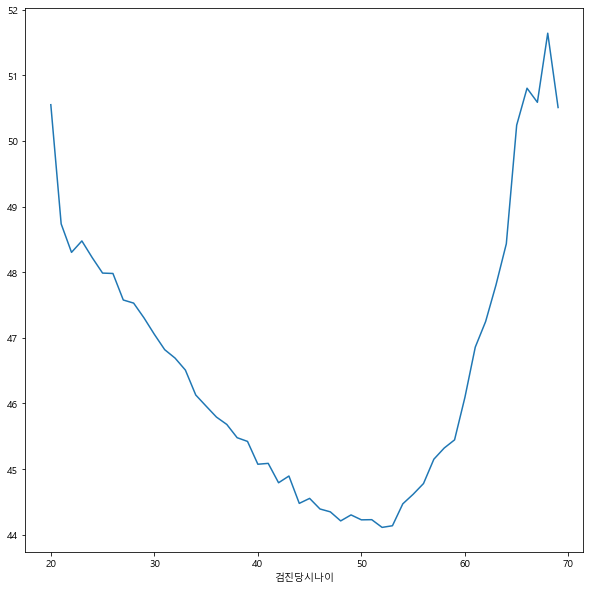

In [701]:
df_man.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

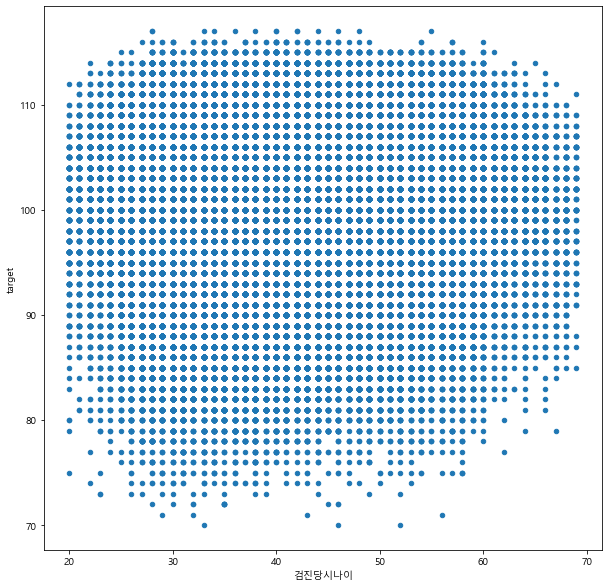

In [702]:
df_man.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

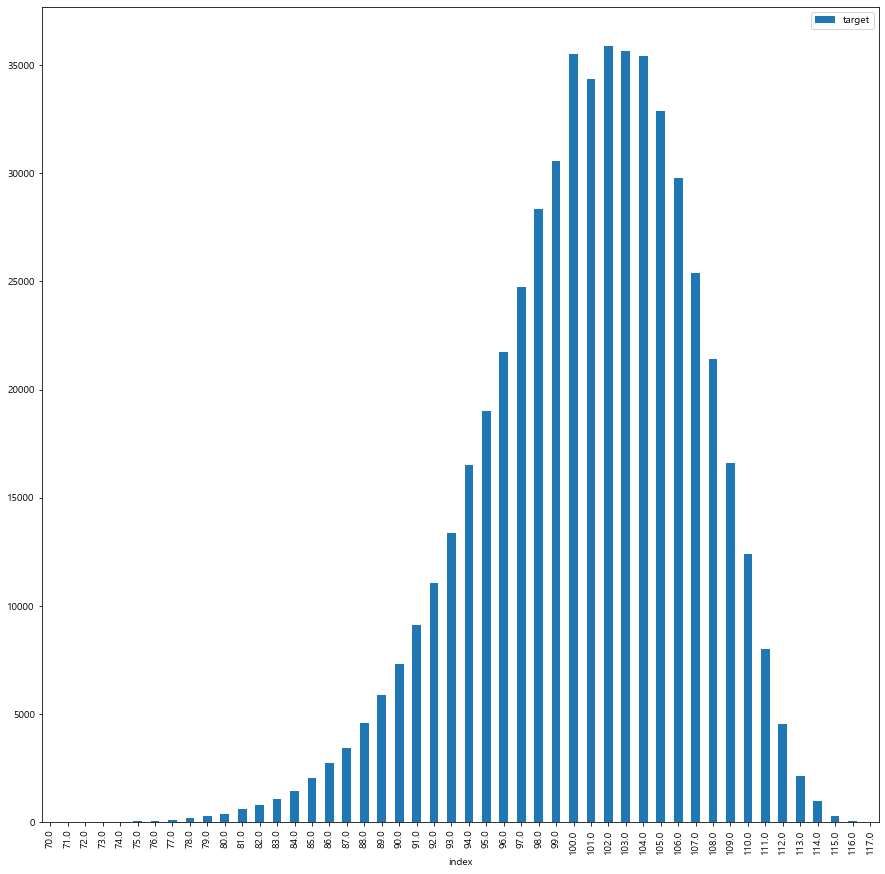

In [703]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [704]:
df_man['target'].value_counts().reset_index().sort_values('index')

,index,target
47,70.0,3
46,71.0,4
45,72.0,12
44,73.0,14
42,74.0,32
41,75.0,52
39,76.0,73
38,77.0,111
37,78.0,215
35,79.0,288


In [705]:
df_man_sampling = pd.DataFrame()

# for target in range(int(df_man['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_man[df_man['target'] == target])
    right_len = len(df_man[df_man['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_man_sampling = pd.concat([df_man_sampling, df_man[df_man['target'] == 100]])                    

In [706]:
# df_man = df_man_sampling.copy()

<AxesSubplot:xlabel='index'>

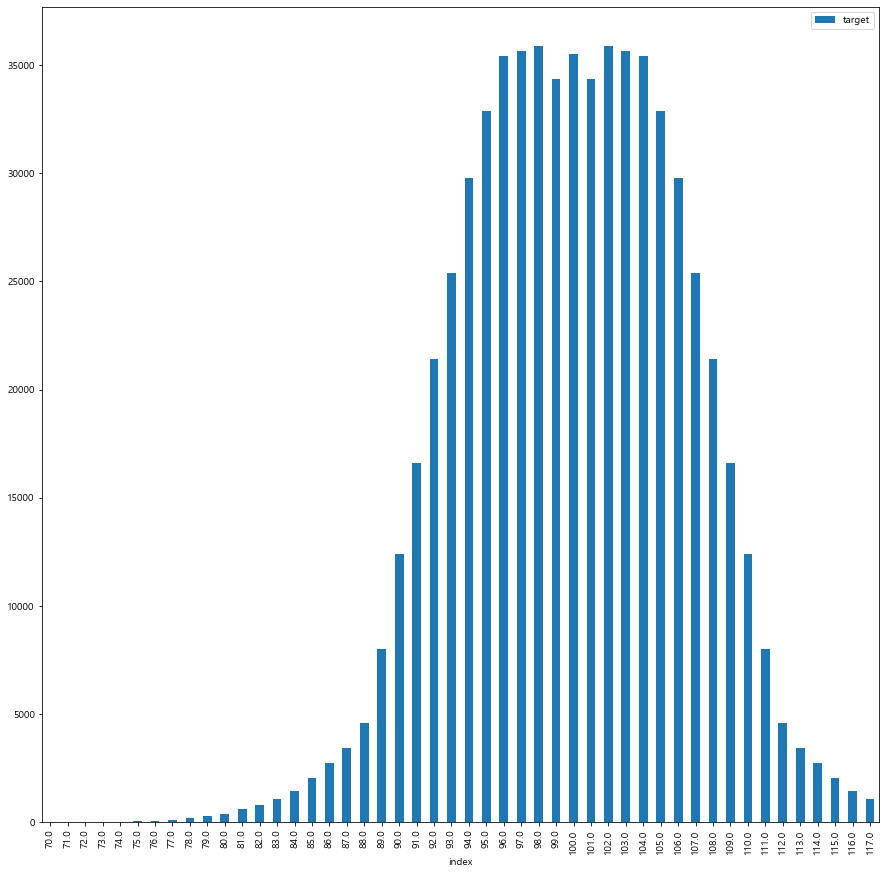

In [707]:
plt.rcParams["figure.figsize"] = (15, 15)
df_man_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [708]:
df_man_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
47,70.0,3
46,71.0,4
45,72.0,12
44,73.0,14
43,74.0,32
42,75.0,52
41,76.0,73
40,77.0,111
39,78.0,215
38,79.0,288


# 나이별 확인하기

In [709]:
# target = 'target'

In [710]:
# df_man_sample = None
                 
# for idx in range(int(df_man[target].min()), int(df_man[target].max() + 1)):    
#     if len(df_man[df_man[target] == idx]) > 0:
#         temp_ = df_man[df_man[target] == idx].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#         df_man_sample = pd.concat([df_man_sample, temp_])

# df_man_sample.sample(frac=1).reset_index(drop=True, inplace=True)

In [711]:
# df_man = df_man_sample

In [712]:
# int(df_man['검진당시나이'].value_counts().mean())

In [713]:
# df_man['검진당시나이'].min()

In [714]:
# df_man['검진당시나이'].max()

In [715]:
# df_man.columns

In [716]:
# df_temp = None
# # sample_len = int(df_man['검진당시나이'].value_counts().mean())
# # sample_len = 1000
                 
# for age in range(df_man['검진당시나이'].min(), df_man['검진당시나이'].max()):
#     temp_ = df_man[df_man['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [717]:
# df_temp.info()

In [718]:
# df_temp.reset_index(drop=True, inplace=True)

In [719]:
# df_man = df_temp.copy()

In [720]:
# df_man['검진당시나이'].value_counts()

In [721]:
# df_man[df_man['검진당시나이']==38]

In [722]:
# df_man[df_man['검진당시나이']==38]['UID'].value_counts()

# model train

In [723]:
df_man.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압', '혈압차이',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
       '중성지방(TG)', '호모시스테인(Homocystein)', '경동맥초음파', '수축기 혈압_kde', '이완기 혈압_kde',
       '혈압차이_kde', '동맥경화검사_kde', '공복시혈당(FBS)_kde', '총콜레스테롤_kde',
       'HDL-콜레스테롤_kde', '콜레스테롤차이_kde', 'LDL-콜레스테롤_kde', '중성지방(TG)_kde',
       '호모시스테인(Homocystein)_kde', '경동맥초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [724]:
# train_columns = [
# #                '체중', '신장', '허리둘레', '체질량지수(BMI)',
#                'AST(SGOT)', 'ALT(SGPT)', 'ALP', 'r-GTP(GGT)', '유산탈수소효소 (LDH)', # 해독기능
#                '총빌리루빈', '직접빌리루빈', '간접빌리루빈', # 배설기능
#                  ]

In [725]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [726]:
train_columns = target_cols.copy()

In [727]:
train_columns.insert(0, '검진당시나이')

In [728]:
train_columns

['검진당시나이',
 '수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [729]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [730]:
target_col = 'target'

## Min Max Scaling

In [731]:
from sklearn.preprocessing import MinMaxScaler

In [732]:
scaling_bool

False

In [733]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_man_sampling[train_columns])
    df_man_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

## train_test_split

In [734]:
if scaling_bool:
    X_train, X_test, y_train, y_test = train_test_split(df_man_scaled[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)
else :
    X_train, X_test, y_train, y_test = train_test_split(df_man_sampling[train_columns], df_man_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [735]:
# model = LinearRegression()

In [736]:
# model.fit(X_train, y_train)

In [737]:
# model.intercept_

In [738]:
# model.coef_

## Randomized SearchCV, 파라미터 튜닝

In [739]:
model = XGBRegressor()

In [740]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [741]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [742]:
import time
start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search)) # best parameter

RandomizedSearchCV took 4284.21 seconds for 10 candidates parameter settings.


In [743]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [744]:
# best score
random_search.best_score_

-0.3424245442319226

In [745]:
model = random_search.best_estimator_
model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [746]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [747]:
# model = build_model()

In [748]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [749]:
# model.summary()

In [750]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [751]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [752]:
# plot_history(history)

## pyTorch 신경망

In [753]:
np.shape(X_train)[1]

13

In [754]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [755]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [756]:
# epochs = 1000

In [757]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [758]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [759]:
# plt.plot(losses)

## coef 계산

In [760]:
# df_coef = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model.coef_).reset_index(drop=True)], axis=1)

In [761]:
# df_coef.columns = ['검사항목', 'coef']

In [762]:
# df_coef['coef'] = df_coef['coef'].round(4)

In [763]:
# df_coef['abs_coef'] = df_coef['coef'].abs()

In [764]:
# df_coef.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [765]:
# from sklearn.preprocessing import PolynomialFeatures
# poly = PolynomialFeatures(degree=2, include_bias=False)

In [766]:
# X_train_poly = poly.fit_transform(X_train)
# X_test_poly = poly.fit_transform(X_test)

In [767]:
# slr = LinearRegression()

In [768]:
# slr.fit(X_train_poly, y_train)

In [769]:
# np.shape(X_train)

In [770]:
# np.shape(X_train_poly)

In [771]:
# np.shape(X_test)

In [772]:
# np.shape(X_test_poly)

In [773]:
# y_pred_poly = slr.predict(X_test_poly)

In [774]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test, y_pred_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test, y_pred_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred_poly)))

In [775]:
# from sklearn.metrics import r2_score
# r2_score(y_test, y_pred_poly)

# model save

In [776]:
import pickle
with open(model_path_man,'wb') as f:
    pickle.dump(model, f)

In [777]:
import pickle
with open(model_path_man, 'rb') as f:
    model = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [778]:
pyTorch_bool

False

In [779]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model.eval()
        y_pred = model(X_test)
        y_pred = y_pred.numpy()

## XGBRegressor

In [780]:
XGB_bool

True

In [781]:
if XGB_bool:
    y_pred = model.predict(X_test)

In [782]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test, y_pred))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test, y_pred))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE : 0.44732011775935177
MSE : 0.3257021887983472
RMSE : 0.5707032405710933


In [783]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9916680359153678

In [784]:
model.score(X_test, y_test)

0.9916680359153678

## feature importance

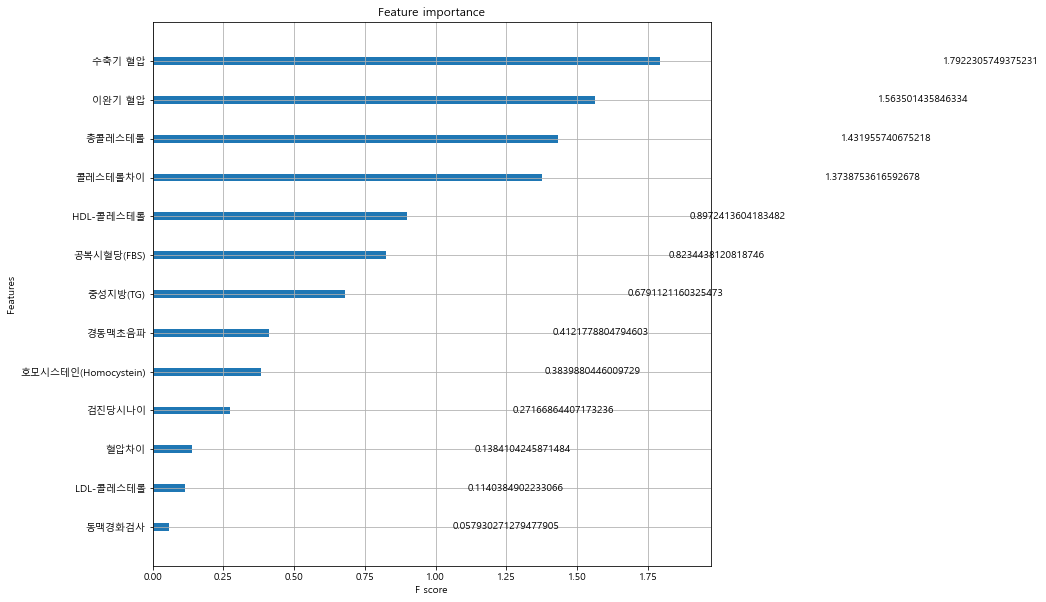

In [785]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model, importance_type='gain')

In [786]:
model.feature_importances_

array([0.02733202, 0.18031259, 0.15730064, 0.01392518, 0.00582824,
       0.08284497, 0.14406608, 0.09026959, 0.13822274, 0.01147318,
       0.06832406, 0.03863224, 0.04146836], dtype=float32)

In [787]:
df_feature = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model.feature_importances_)], axis=1)
df_feature.columns = ['columns', 'feature_importance']

In [788]:
df_feature.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,수축기 혈압,0.180313
2,이완기 혈압,0.157301
6,총콜레스테롤,0.144066
8,콜레스테롤차이,0.138223
7,HDL-콜레스테롤,0.090270
5,공복시혈당(FBS),0.082845
10,중성지방(TG),0.068324
12,경동맥초음파,0.041468
11,호모시스테인(Homocystein),0.038632
0,검진당시나이,0.027332


# 실제지수 - 예측지수 결과

In [789]:
pd.DataFrame(y_test).reset_index(drop=True)

,target
0,98.0
1,89.0
2,100.0
3,92.0
4,108.0
...,...
161097,104.0
161098,108.0
161099,98.0
161100,99.0


In [790]:
pd.DataFrame(y_pred).reset_index(drop=True)

,0
0,98.288902
1,88.721794
2,99.980507
3,92.564346
4,107.805412
...,...
161097,103.649803
161098,107.615845
161099,97.361389
161100,98.927574


In [791]:
df_test = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), pd.DataFrame(y_pred).reset_index(drop=True)], axis=1)

In [792]:
df_test.head()

,target,0
0,98.0,98.288902
1,89.0,88.721794
2,100.0,99.980507
3,92.0,92.564346
4,108.0,107.805412


In [793]:
df_test.columns

Index(['target', 0], dtype='object')

In [794]:
df_test.columns = ['실제지수', '예측지수']

In [795]:
df_test['diff'] = df_test['예측지수'] - df_test['실제지수']

In [796]:
df_test.head()

,실제지수,예측지수,diff
0,98.0,98.288902,0.288902
1,89.0,88.721794,-0.278206
2,100.0,99.980507,-0.019493
3,92.0,92.564346,0.564346
4,108.0,107.805412,-0.194588


In [797]:
df_test['diff_int'] = df_test['diff'].round(0)

In [798]:
len(df_test)

161102

In [799]:
df_test.head()

,실제지수,예측지수,diff,diff_int
0,98.0,98.288902,0.288902,0.0
1,89.0,88.721794,-0.278206,-0.0
2,100.0,99.980507,-0.019493,-0.0
3,92.0,92.564346,0.564346,1.0
4,108.0,107.805412,-0.194588,-0.0


<AxesSubplot:>

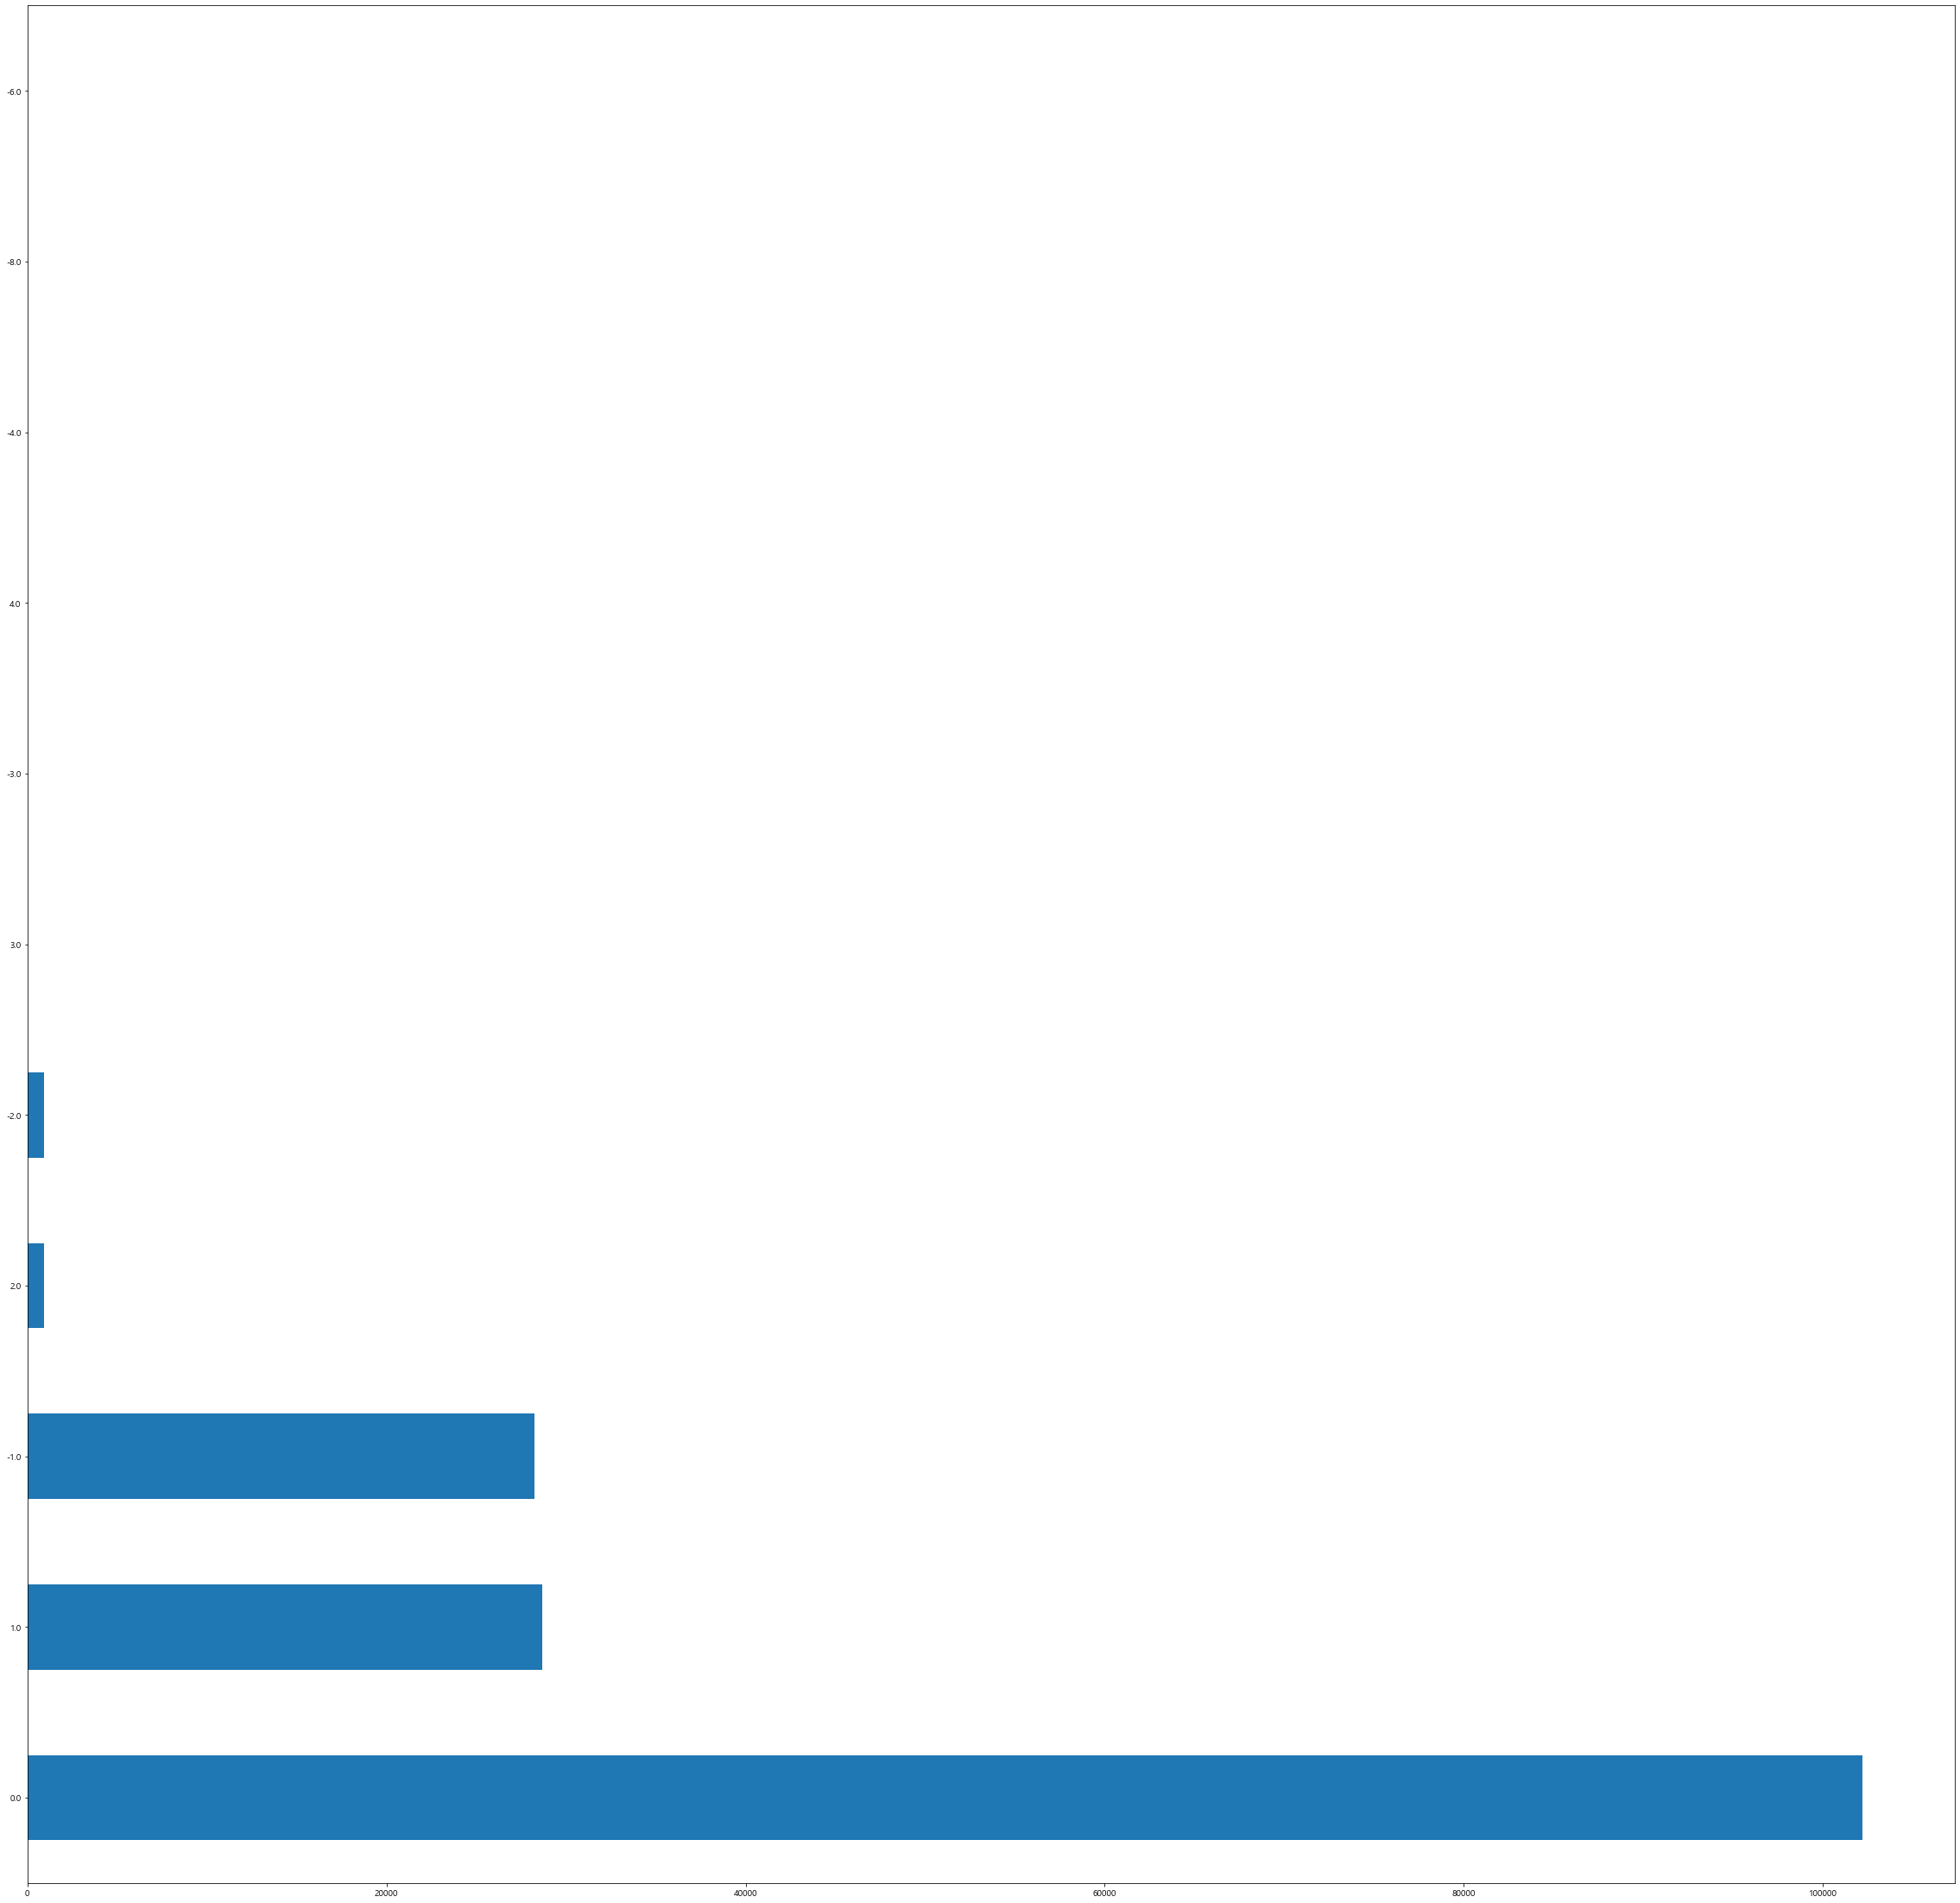

In [800]:
plt.figure(figsize=(40, 40))
df_test['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_남자.png')

In [801]:
df_test['diff_int'].value_counts(ascending=False)

 0.0    102216
 1.0     28681
-1.0     28250
 2.0       951
-2.0       939
 3.0        32
-3.0        24
 4.0         4
-4.0         3
-8.0         1
-6.0         1
Name: diff_int, dtype: int64

In [802]:
df_test['예측지수'].round(0).value_counts()

103.0    9160
97.0     9136
96.0     8988
98.0     8969
102.0    8895
104.0    8699
99.0     8693
100.0    8639
101.0    8465
95.0     8342
105.0    8201
106.0    7457
94.0     7306
93.0     6431
107.0    6392
108.0    5272
92.0     5179
91.0     4252
109.0    4160
110.0    3053
90.0     3049
89.0     1969
111.0    1947
88.0     1273
112.0    1229
87.0      888
113.0     850
114.0     661
86.0      630
115.0     518
85.0      501
84.0      369
116.0     339
117.0     279
83.0      247
82.0      208
81.0      133
80.0      114
79.0       89
78.0       44
77.0       25
76.0       24
75.0        9
74.0        8
73.0        5
72.0        4
71.0        1
Name: 예측지수, dtype: int64

# 예측 나이 분포

In [803]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_train_pred = model(X_train)
        X_train_pred = X_train_pred.numpy()

    df_train = pd.DataFrame(X_train_pred).reset_index(drop=True)
    y_test = pd.DataFrame(y_test.numpy())

In [804]:
if XGB_bool:
    df_train = pd.DataFrame(model.predict(X_train)).reset_index(drop=True)

In [805]:
# df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [806]:
df_plot = pd.DataFrame(y_test.value_counts())

In [807]:
df_plot.columns = ['count']

In [808]:
df_plot.reset_index(inplace=True)

In [809]:
df_plot = df_plot.sort_values('index', ascending=True)

In [810]:
df_plot

,index,count
46,71.0,1
44,72.0,4
45,73.0,3
43,74.0,9
42,75.0,11
41,76.0,23
40,77.0,28
39,78.0,50
38,79.0,69
37,80.0,103


In [811]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

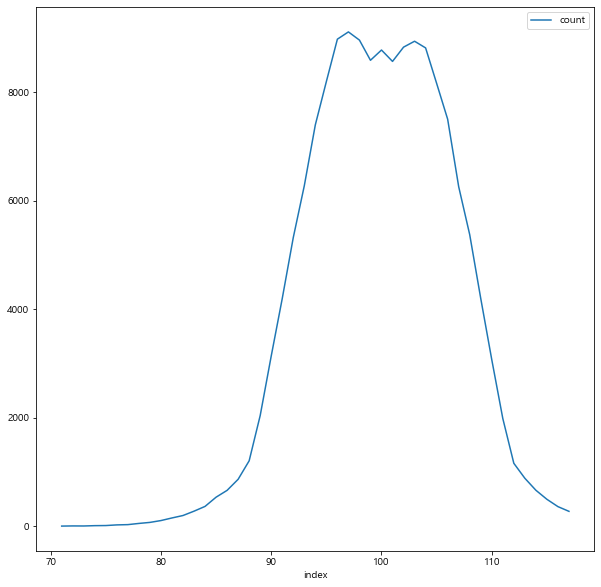

In [812]:
df_plot.plot()

In [813]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        X_test_pred = model(X_test)
        X_test_pred = X_test_pred.numpy()
    df_test = pd.DataFrame(X_test_pred).reset_index(drop=True)

In [814]:
if XGB_bool:
    df_test = pd.DataFrame(model.predict(X_test)).reset_index(drop=True)

In [815]:
df_plot = pd.DataFrame(df_test.round(0).value_counts())

In [816]:
df_plot.columns = ['count']

In [817]:
df_plot.reset_index(inplace=True)

In [818]:
df_plot = df_plot.sort_values(0, ascending=True)

In [819]:
df_plot.set_index(0, inplace=True)

In [820]:
df_plot

,count
0,
71.0,1
72.0,4
73.0,5
74.0,8
75.0,9
76.0,24
77.0,25
78.0,44
79.0,89


<AxesSubplot:xlabel='0'>

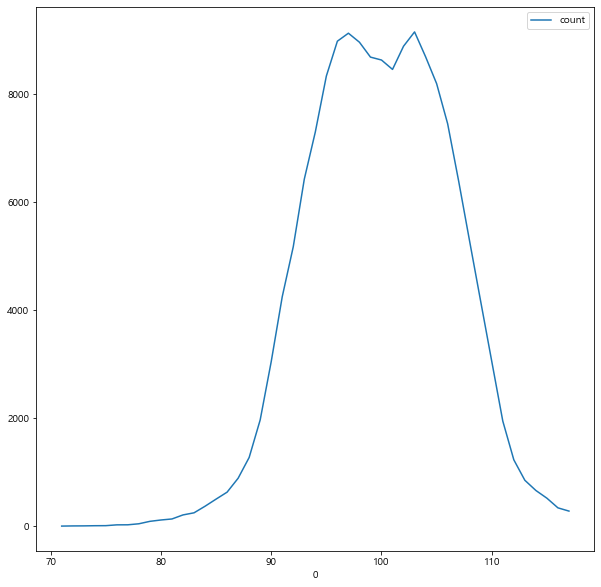

In [821]:
df_plot.plot()

# 시각화

In [822]:
# model.coef_

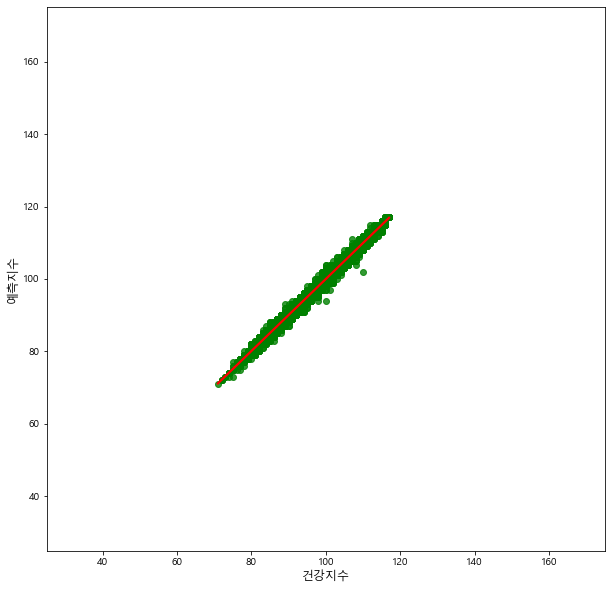

In [823]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test).reset_index(drop=True), df_test.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 남성 데이터 전체 계산

In [824]:
df_man.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
0,2011,32,11757,1,24,113.0,68.0,45.0,1.14,84.0,148.0,58.0,2.55,75.0,74.0,10.46,1.0,128.38,137.40,112.21,100.0,140.72,92.84,141.52,130.25,142.63,138.39,100.00,90.0,121.81,111.0
1,2019,50,356493,1,53,137.0,85.0,52.0,1.14,85.0,197.0,49.0,4.02,114.0,172.0,10.46,1.0,68.00,103.17,56.99,100.0,162.38,149.83,149.94,130.17,105.11,95.31,100.00,90.0,108.00,104.0
2,2021,50,642497,1,55,118.0,79.0,39.0,1.14,105.0,232.0,54.0,4.30,135.0,217.0,10.46,1.0,148.83,148.15,112.55,100.0,64.14,92.67,133.77,109.48,99.44,33.16,100.00,90.0,105.09,103.0
3,2019,62,421626,1,40,119.0,83.0,36.0,1.14,90.0,272.0,63.0,4.32,192.0,86.0,8.50,1.0,150.00,118.34,147.14,100.0,112.67,26.45,80.66,137.18,16.46,148.10,138.64,90.0,106.98,103.0
4,2020,62,565527,1,41,119.0,72.0,47.0,1.14,89.0,265.0,58.0,4.57,173.0,168.0,10.00,1.0,150.00,135.47,96.58,100.0,133.71,35.36,109.12,111.19,37.87,73.54,148.83,90.0,103.96,102.0


In [825]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536847 entries, 0 to 536846
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   검진년도                     536847 non-null  int32  
 1   UID                      536847 non-null  int64  
 2   CU_REC_ID                536847 non-null  int64  
 3   SEX                      536847 non-null  int64  
 4   검진당시나이                   536847 non-null  int64  
 5   수축기 혈압                   536847 non-null  float64
 6   이완기 혈압                   536847 non-null  float64
 7   혈압차이                     536847 non-null  float64
 8   동맥경화검사                   536847 non-null  float64
 9   공복시혈당(FBS)               536847 non-null  float64
 10  총콜레스테롤                   536847 non-null  float64
 11  HDL-콜레스테롤                536847 non-null  float64
 12  콜레스테롤차이                  536847 non-null  float64
 13  LDL-콜레스테롤                536847 non-null  float64
 14  중성지방

In [826]:
df_man[df_man['UID'] == 168996]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
82786,2022,168996,2259500,1,35,137.0,78.0,59.0,1.14,102.0,215.0,64.0,3.36,124.0,137.0,10.46,1.0,58.81,130.28,22.59,100.0,55.38,132.89,80.59,144.00,99.99,100.51,100.0,90.0,93.01,97.0
82787,2023,168996,2259499,1,36,123.0,77.0,46.0,1.14,97.0,210.0,67.0,3.13,128.0,76.0,10.46,1.0,127.47,147.08,100.00,100.0,98.43,142.52,54.94,133.84,100.34,148.80,100.0,90.0,113.28,107.0
82788,2024,168996,2281994,1,37,117.0,77.0,40.0,1.14,81.0,238.0,76.0,3.13,153.0,45.0,10.46,1.0,147.68,148.99,115.56,100.0,177.98,82.35,23.42,119.35,71.11,54.68,100.0,90.0,105.00,102.0


In [827]:
train_columns

['검진당시나이',
 '수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [828]:
if scaling_bool:
    df_pred = df_man_scaled.copy()
else:
    df_pred = df_man.copy()

In [829]:
len(df_pred)

536847

In [830]:
df_pred.reset_index(drop=True, inplace=True)

In [831]:
X_test

,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
5012,44,113.0,63.0,50.0,1.14,99.0,185.0,53.94,3.86,116.0,120.36,10.46,1.0
28563,57,110.0,55.0,55.0,1.14,92.0,235.0,43.00,5.47,165.0,134.00,10.46,1.0
55038,40,111.0,64.0,47.0,1.14,87.0,205.0,75.00,2.73,117.0,63.00,10.46,1.0
232778,46,139.0,91.0,48.0,1.14,109.0,140.0,57.00,2.46,66.0,115.00,10.46,3.0
227053,38,113.0,77.0,36.0,1.14,92.0,213.0,54.00,3.94,128.0,169.00,10.46,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
418038,36,118.0,74.0,44.0,1.14,102.0,172.0,38.00,4.53,110.0,120.00,10.46,1.0
85137,49,120.0,82.0,38.0,1.14,90.0,218.0,45.30,4.81,159.0,136.00,10.46,1.0
437582,45,109.0,69.0,40.0,1.14,105.0,243.0,58.00,4.19,132.0,261.00,9.30,1.0
321807,59,105.0,71.0,34.0,1.14,96.0,191.0,34.00,5.62,142.0,117.00,10.46,1.0


In [832]:
df_pred.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압', '혈압차이',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
       '중성지방(TG)', '호모시스테인(Homocystein)', '경동맥초음파', '수축기 혈압_kde', '이완기 혈압_kde',
       '혈압차이_kde', '동맥경화검사_kde', '공복시혈당(FBS)_kde', '총콜레스테롤_kde',
       'HDL-콜레스테롤_kde', '콜레스테롤차이_kde', 'LDL-콜레스테롤_kde', '중성지방(TG)_kde',
       '호모시스테인(Homocystein)_kde', '경동맥초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [833]:
df_pred[train_columns]

,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
0,24,113.0,68.0,45.0,1.14,84.0,148.00,58.00,2.55,75.00,74.00,10.46,1.0
1,53,137.0,85.0,52.0,1.14,85.0,197.00,49.00,4.02,114.00,172.00,10.46,1.0
2,55,118.0,79.0,39.0,1.14,105.0,232.00,54.00,4.30,135.00,217.00,10.46,1.0
3,40,119.0,83.0,36.0,1.14,90.0,272.00,63.00,4.32,192.00,86.00,8.50,1.0
4,41,119.0,72.0,47.0,1.14,89.0,265.00,58.00,4.57,173.00,168.00,10.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
536842,36,137.0,79.0,58.0,1.14,95.0,216.00,37.00,5.84,159.00,99.00,10.46,0.0
536843,29,130.0,80.0,50.0,1.14,90.0,259.00,63.00,4.11,171.00,125.00,10.46,1.0
536844,39,136.0,88.0,48.0,1.14,95.0,237.00,49.00,4.84,124.62,199.00,10.46,1.0
536845,53,127.0,86.0,41.0,1.14,92.0,183.00,51.00,3.59,116.00,78.00,10.46,1.0


In [834]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model.eval()
        pred_data = model(torch.Tensor(df_pred[train_columns].to_numpy()))
        pred_data = pred_data.numpy()

In [835]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_pred[train_columns])

In [836]:
pred_data = pred_data.round(0)

In [837]:
pred_data

array([110., 104., 103., ...,  95., 108.,  92.], dtype=float32)

In [838]:
df_output = pd.concat([df_pred, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [839]:
if scaling_bool:
    df_output = pd.concat([df_man[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output], axis=1)

In [840]:
df_output.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target,예측지수
0,2011,32,11757,1,24,113.0,68.0,45.0,1.14,84.00,148.00,58.00,2.55,75.00,74.00,10.46,1.0,128.38,137.40,112.21,100.0,140.72,92.84,141.52,130.25,142.63,138.39,100.00,90.0,121.81,111.0,110.0
1,2019,50,356493,1,53,137.0,85.0,52.0,1.14,85.00,197.00,49.00,4.02,114.00,172.00,10.46,1.0,68.00,103.17,56.99,100.0,162.38,149.83,149.94,130.17,105.11,95.31,100.00,90.0,108.00,104.0,104.0
2,2021,50,642497,1,55,118.0,79.0,39.0,1.14,105.00,232.00,54.00,4.30,135.00,217.00,10.46,1.0,148.83,148.15,112.55,100.0,64.14,92.67,133.77,109.48,99.44,33.16,100.00,90.0,105.09,103.0,103.0
3,2019,62,421626,1,40,119.0,83.0,36.0,1.14,90.00,272.00,63.00,4.32,192.00,86.00,8.50,1.0,150.00,118.34,147.14,100.0,112.67,26.45,80.66,137.18,16.46,148.10,138.64,90.0,106.98,103.0,103.0
4,2020,62,565527,1,41,119.0,72.0,47.0,1.14,89.00,265.00,58.00,4.57,173.00,168.00,10.00,1.0,150.00,135.47,96.58,100.0,133.71,35.36,109.12,111.19,37.87,73.54,148.83,90.0,103.96,102.0,102.0
5,2021,62,699357,1,42,124.0,81.0,43.0,1.14,92.00,248.00,50.00,4.96,169.00,144.00,9.60,1.0,126.80,137.54,98.85,100.0,105.30,62.89,150.00,94.54,46.80,110.13,143.74,90.0,106.95,103.0,104.0
6,2022,62,1356310,1,43,116.0,82.0,34.0,1.14,79.00,247.00,55.00,4.49,173.00,91.00,7.83,1.0,136.31,133.85,161.83,100.0,184.06,62.85,124.33,129.79,31.29,147.27,106.11,90.0,118.24,109.0,108.0
7,2023,62,2170394,1,44,128.0,81.0,47.0,1.14,89.00,237.00,61.40,3.86,154.00,108.00,8.14,1.0,103.72,133.47,90.56,100.0,130.68,97.47,93.42,147.28,70.69,143.85,111.42,90.0,109.86,105.0,105.0
8,2020,67,481109,1,52,140.0,89.0,51.0,1.14,113.00,266.00,63.00,4.22,176.00,147.00,10.46,1.0,44.67,77.17,66.46,100.0,35.47,29.30,69.58,130.97,34.51,93.57,100.00,90.0,72.02,86.0,86.0
9,2022,76,1377275,1,52,140.0,88.0,52.0,1.14,115.00,174.00,55.00,3.16,101.00,92.00,10.46,1.0,44.67,85.73,56.10,100.0,31.37,100.88,125.69,134.69,124.87,147.96,100.00,90.0,93.59,97.0,97.0


## 예측지수 성능평가

In [841]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['target'], df_output['예측지수'])

0.3762710790970239

# target으로 나이 계산

In [842]:
df_output['예측나이'] = ((100 - df_output['예측지수']) / 5) + df_output['검진당시나이']
df_output['예측나이'] = df_output['예측나이'].round(2)

In [843]:
df_output.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,113.0,68.0,45.0,1.14,84.00,148.00,58.00,2.55,75.00,74.00,10.46,1.0,128.38,137.40,112.21,100.0,140.72,92.84,141.52,130.25,142.63,138.39,100.00,90.0,121.81,111.0,110.0,22.0
1,2019,50,356493,1,53,137.0,85.0,52.0,1.14,85.00,197.00,49.00,4.02,114.00,172.00,10.46,1.0,68.00,103.17,56.99,100.0,162.38,149.83,149.94,130.17,105.11,95.31,100.00,90.0,108.00,104.0,104.0,52.2
2,2021,50,642497,1,55,118.0,79.0,39.0,1.14,105.00,232.00,54.00,4.30,135.00,217.00,10.46,1.0,148.83,148.15,112.55,100.0,64.14,92.67,133.77,109.48,99.44,33.16,100.00,90.0,105.09,103.0,103.0,54.4
3,2019,62,421626,1,40,119.0,83.0,36.0,1.14,90.00,272.00,63.00,4.32,192.00,86.00,8.50,1.0,150.00,118.34,147.14,100.0,112.67,26.45,80.66,137.18,16.46,148.10,138.64,90.0,106.98,103.0,103.0,39.4
4,2020,62,565527,1,41,119.0,72.0,47.0,1.14,89.00,265.00,58.00,4.57,173.00,168.00,10.00,1.0,150.00,135.47,96.58,100.0,133.71,35.36,109.12,111.19,37.87,73.54,148.83,90.0,103.96,102.0,102.0,40.6
5,2021,62,699357,1,42,124.0,81.0,43.0,1.14,92.00,248.00,50.00,4.96,169.00,144.00,9.60,1.0,126.80,137.54,98.85,100.0,105.30,62.89,150.00,94.54,46.80,110.13,143.74,90.0,106.95,103.0,104.0,41.2
6,2022,62,1356310,1,43,116.0,82.0,34.0,1.14,79.00,247.00,55.00,4.49,173.00,91.00,7.83,1.0,136.31,133.85,161.83,100.0,184.06,62.85,124.33,129.79,31.29,147.27,106.11,90.0,118.24,109.0,108.0,41.4
7,2023,62,2170394,1,44,128.0,81.0,47.0,1.14,89.00,237.00,61.40,3.86,154.00,108.00,8.14,1.0,103.72,133.47,90.56,100.0,130.68,97.47,93.42,147.28,70.69,143.85,111.42,90.0,109.86,105.0,105.0,43.0
8,2020,67,481109,1,52,140.0,89.0,51.0,1.14,113.00,266.00,63.00,4.22,176.00,147.00,10.46,1.0,44.67,77.17,66.46,100.0,35.47,29.30,69.58,130.97,34.51,93.57,100.00,90.0,72.02,86.0,86.0,54.8
9,2022,76,1377275,1,52,140.0,88.0,52.0,1.14,115.00,174.00,55.00,3.16,101.00,92.00,10.46,1.0,44.67,85.73,56.10,100.0,31.37,100.88,125.69,134.69,124.87,147.96,100.00,90.0,93.59,97.0,97.0,52.6


## 예측나이 성능평가

In [844]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output['검진당시나이'], df_output['예측나이'])

0.9745461928631436

# 최종 산출

In [845]:
df_output.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target,예측지수,예측나이
0,2011,32,11757,1,24,113.0,68.0,45.0,1.14,84.0,148.0,58.0,2.55,75.0,74.0,10.46,1.0,128.38,137.40,112.21,100.0,140.72,92.84,141.52,130.25,142.63,138.39,100.00,90.0,121.81,111.0,110.0,22.0
1,2019,50,356493,1,53,137.0,85.0,52.0,1.14,85.0,197.0,49.0,4.02,114.0,172.0,10.46,1.0,68.00,103.17,56.99,100.0,162.38,149.83,149.94,130.17,105.11,95.31,100.00,90.0,108.00,104.0,104.0,52.2
2,2021,50,642497,1,55,118.0,79.0,39.0,1.14,105.0,232.0,54.0,4.30,135.0,217.0,10.46,1.0,148.83,148.15,112.55,100.0,64.14,92.67,133.77,109.48,99.44,33.16,100.00,90.0,105.09,103.0,103.0,54.4
3,2019,62,421626,1,40,119.0,83.0,36.0,1.14,90.0,272.0,63.0,4.32,192.0,86.0,8.50,1.0,150.00,118.34,147.14,100.0,112.67,26.45,80.66,137.18,16.46,148.10,138.64,90.0,106.98,103.0,103.0,39.4
4,2020,62,565527,1,41,119.0,72.0,47.0,1.14,89.0,265.0,58.0,4.57,173.0,168.0,10.00,1.0,150.00,135.47,96.58,100.0,133.71,35.36,109.12,111.19,37.87,73.54,148.83,90.0,103.96,102.0,102.0,40.6


# DataMart csv

In [846]:
df_copy = df.copy()

In [847]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파
0,2010,7282,2520,1,42,110.0,66.0,NaN,83.0,224.0,73.0,139.0,98.0,NaN,None,NaN
1,2010,7490,3638,1,39,120.0,80.0,NaN,125.0,265.0,57.0,187.4,103.0,NaN,None,NaN
2,2010,7915,3997,1,36,120.0,70.0,NaN,104.0,196.0,37.0,50.0,547.0,NaN,None,NaN
3,2010,8056,4745,1,42,NaN,NaN,NaN,89.0,310.0,53.0,181.4,378.0,NaN,None,NaN
4,2010,8457,3929,1,38,130.0,80.0,NaN,121.0,189.0,50.0,108.0,154.0,NaN,None,NaN


In [848]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   수축기 혈압                      1206722 non-null  float64
 6   이완기 혈압                      1207406 non-null  float64
 7   동맥경화검사                      4262 non-null     float64
 8   공복시혈당(FBS)                  1199640 non-null  float64
 9   총콜레스테롤                      1151191 non-null  float64
 10  HDL-콜레스테롤                   1146478 non-null  float64
 11  LDL-콜레스테롤                   1141538 non-null  float64
 12  중성지방(TG)                    1147041 non-null  float64
 1

In [849]:
minimums

[82.0,
 45.0,
 0.8000000000000002,
 68.5,
 103.0,
 17.0,
 29.5,
 -52.0,
 2.450000000000001,
 -7.5]

In [850]:
maximums

[154.0, 101.0, 1.44, 120.5, 295.0, 97.0, 209.5, 268.0, 17.25, 12.5]

In [851]:
train_columns

['검진당시나이',
 '수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [852]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [853]:
type(target_cols)

list

In [854]:
target_cols_temp = target_cols.copy()
target_cols_temp.remove('혈압차이')
target_cols_temp.remove('콜레스테롤차이')

In [855]:
target_cols_temp

['수축기 혈압',
 '이완기 혈압',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [856]:
for idx, col in enumerate(target_cols_temp):    
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [857]:
df_man_csv = df_copy[df_copy['SEX'] == 1]
len(df_man_csv)

765459

In [858]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파
0,2010,7282,2520,1,42,110.0,66.0,NaN,83.0,224.0,73.0,139.0,98.0,NaN,None,NaN
1,2010,7490,3638,1,39,120.0,80.0,NaN,120.5,265.0,57.0,187.4,103.0,NaN,None,NaN
2,2010,7915,3997,1,36,120.0,70.0,NaN,104.0,196.0,37.0,50.0,268.0,NaN,None,NaN
3,2010,8056,4745,1,42,NaN,NaN,NaN,89.0,295.0,53.0,181.4,268.0,NaN,None,NaN
4,2010,8457,3929,1,38,130.0,80.0,NaN,120.5,189.0,50.0,108.0,154.0,NaN,None,NaN


## 검진 항목 all 결측치 지우기

In [859]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [860]:
df_man_csv.dropna(subset=target_cols_temp, how='all', inplace=True)

In [861]:
df_man_csv.reset_index(drop=True, inplace=True)

In [862]:
len(df_man_csv)

763103

## fillna

In [863]:
df_man_csv.isnull().sum()

검진년도                               0
UID                                0
CU_REC_ID                          0
SEX                                0
검진당시나이                             0
수축기 혈압                          2255
이완기 혈압                          1891
동맥경화검사                        760317
공복시혈당(FBS)                      7271
총콜레스테롤                         33735
HDL-콜레스테롤                      36540
LDL-콜레스테롤                      40101
중성지방(TG)                       36233
호모시스테인(Homocystein)           636967
경동맥초음파 (Carotid Sono)_text    568379
경동맥초음파                        681243
dtype: int64

In [864]:
df_man_csv[score_text_real].fillna(fill_th, inplace=True)

In [865]:
df_man_csv.fillna(df_man.mean().round(2), inplace=True)

## 스크리닝

### 수축기 혈압

In [866]:
screening = 80

In [867]:
scr_col = '수축기 혈압'

In [868]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파


In [869]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

In [870]:
df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [871]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파


In [872]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

### 이완기 혈압

In [873]:
screening = 40

In [874]:
scr_col = '이완기 혈압'

In [875]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파


In [876]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

In [877]:
df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [878]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파


In [879]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

### 공복시 혈당

In [880]:
screening = 50

In [881]:
scr_col = '공복시혈당(FBS)'

In [882]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파


In [883]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

In [884]:
df_man_csv.loc[df_man_csv[scr_col] < screening, scr_col] = screening

In [885]:
df_man_csv[df_man_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파


In [886]:
len(df_man_csv[df_man_csv[scr_col] < screening])

0

# 변수 생성

## 혈압 차이

In [887]:
df_man_csv['혈압차이'] = df_man_csv['수축기 혈압'] - df_man_csv['이완기 혈압']

## 콜레스테롤 차이

In [888]:
df_man_csv['콜레스테롤차이'] = df_man_csv['총콜레스테롤'] / df_man_csv['HDL-콜레스테롤']

In [889]:
df_man_csv['콜레스테롤차이'] = df_man_csv['콜레스테롤차이'].round(2)

## 컬럼 순서 변경

In [890]:
cols_temp = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
        '수축기 혈압', '이완기 혈압', '혈압차이', '동맥경화검사', 
        '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
        '중성지방(TG)', '호모시스테인(Homocystein)', score_text_real,        
       ]

df_man_csv = df_man_csv[cols_temp]

## 모델 예측

In [891]:
train_columns

['검진당시나이',
 '수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [892]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data = model.predict(df_man_csv[train_columns])

In [893]:
pred_data = pred_data.round(0)

In [894]:
df_man_csv = pd.concat([df_man_csv, pd.DataFrame(pred_data, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [895]:
df_man_csv.head(200)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수
0,2010,7282,2520,1,42,110.00,66.00,44.00,1.14,83.0,224.00,73.00,3.07,139.00,98.00,10.46,1.0,102.0
1,2010,7490,3638,1,39,120.00,80.00,40.00,1.14,120.5,265.00,57.00,4.65,187.40,103.00,10.46,1.0,98.0
2,2010,7915,3997,1,36,120.00,70.00,50.00,1.14,104.0,196.00,37.00,5.30,50.00,268.00,10.46,1.0,101.0
3,2010,8056,4745,1,42,121.06,75.62,45.44,1.14,89.0,295.00,53.00,5.57,181.40,268.00,10.46,1.0,92.0
4,2010,8457,3929,1,38,130.00,80.00,50.00,1.14,120.5,189.00,50.00,3.78,108.00,154.00,10.46,1.0,103.0
5,2010,8634,4751,1,43,120.00,80.00,40.00,1.14,96.0,176.00,54.00,3.26,94.80,136.00,10.46,1.0,111.0
6,2010,11158,1703,1,37,100.00,70.00,30.00,1.14,86.0,185.00,51.00,3.63,99.80,171.00,10.46,1.0,107.0
7,2010,13020,2211,1,34,110.00,70.00,40.00,1.14,101.0,164.00,57.00,2.88,93.80,66.00,10.46,1.0,106.0
8,2010,13999,3816,1,53,150.00,90.00,60.00,1.14,112.0,201.00,55.00,3.65,111.00,174.00,10.46,1.0,91.0
9,2010,15783,1431,1,41,110.00,70.00,40.00,1.14,87.0,186.00,41.00,4.54,119.00,128.00,10.46,1.0,106.0


### 성능 평가

In [896]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_man_csv['target'], df_man_csv['예측지수']))

In [897]:
# r2_score(df_man_csv['target'], df_man_csv['예측지수'])

## 예측나이 계산

In [898]:
df_man_csv['예측나이'] = ((100 - df_man_csv['예측지수']) / 5) + df_man_csv['검진당시나이']
df_man_csv['예측나이'] = df_man_csv['예측나이'].round(2)

### 성능 평가

In [899]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_man_csv['검진당시나이'], df_man_csv['예측나이']))

MAE : 1.0783406696081659


In [900]:
r2_score(df_man_csv['검진당시나이'], df_man_csv['예측나이'])

0.9764277932961796

In [901]:
df_man_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
0,2010,7282,2520,1,42,110.00,66.00,44.00,1.14,83.0,224.0,73.0,3.07,139.0,98.0,10.46,1.0,102.0,41.6
1,2010,7490,3638,1,39,120.00,80.00,40.00,1.14,120.5,265.0,57.0,4.65,187.4,103.0,10.46,1.0,98.0,39.4
2,2010,7915,3997,1,36,120.00,70.00,50.00,1.14,104.0,196.0,37.0,5.30,50.0,268.0,10.46,1.0,101.0,35.8
3,2010,8056,4745,1,42,121.06,75.62,45.44,1.14,89.0,295.0,53.0,5.57,181.4,268.0,10.46,1.0,92.0,43.6
4,2010,8457,3929,1,38,130.00,80.00,50.00,1.14,120.5,189.0,50.0,3.78,108.0,154.0,10.46,1.0,103.0,37.4


In [902]:
df_man_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763103 entries, 0 to 763102
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 763103 non-null  int32  
 1   UID                  763103 non-null  int64  
 2   CU_REC_ID            763103 non-null  int64  
 3   SEX                  763103 non-null  int64  
 4   검진당시나이               763103 non-null  int64  
 5   수축기 혈압               763103 non-null  float64
 6   이완기 혈압               763103 non-null  float64
 7   혈압차이                 763103 non-null  float64
 8   동맥경화검사               763103 non-null  float64
 9   공복시혈당(FBS)           763103 non-null  float64
 10  총콜레스테롤               763103 non-null  float64
 11  HDL-콜레스테롤            763103 non-null  float64
 12  콜레스테롤차이              763103 non-null  float64
 13  LDL-콜레스테롤            763103 non-null  float64
 14  중성지방(TG)             763103 non-null  float64
 15  호모시스테인(Homocystei

# 최종 UID별 확인

In [903]:
# 김태현 본부장님
df_man_csv[df_man_csv['UID'] == 175673].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
286855,2022,175673,751348,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
286856,2022,175673,1463838,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
286792,2022,175673,1919125,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
286857,2022,175673,2169120,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
286793,2022,175673,2223795,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
286794,2022,175673,2237465,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
286858,2022,175673,2238320,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
286859,2022,175673,2246042,1,48,123.0,82.0,41.0,1.14,101.0,193.0,55.0,3.51,111.0,133.0,9.1,1.0,111.0,45.8
456627,2023,175673,1463893,1,49,117.0,77.0,40.0,1.14,95.0,206.0,61.0,3.38,136.0,44.0,7.8,1.0,106.0,47.8
456623,2023,175673,1919126,1,49,117.0,77.0,40.0,1.14,95.0,206.0,61.0,3.38,136.0,44.0,7.8,1.0,106.0,47.8


In [904]:
# 양원영 유닛장님
df_man_csv[df_man_csv['UID'] == 289587].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
207953,2021,289587,796178,1,47,133.0,80.0,53.0,1.14,96.0,173.0,59.0,2.93,73.0,203.0,10.46,0.0,102.0,46.6
320086,2022,289587,866076,1,48,131.0,76.0,55.0,1.14,93.0,185.0,57.0,3.25,70.0,268.0,6.70,0.0,100.0,48.0
320041,2022,289587,2115999,1,48,131.0,76.0,55.0,1.14,93.0,185.0,57.0,3.25,70.0,268.0,6.70,0.0,100.0,48.0
107815,2022,289587,2603574,1,48,131.0,76.0,55.0,1.14,93.0,185.0,57.0,3.25,70.0,268.0,6.70,0.0,100.0,48.0
508080,2023,289587,1487447,1,49,130.0,76.0,54.0,1.14,84.0,180.0,46.0,3.91,82.0,259.0,10.10,0.0,108.0,47.4
508081,2023,289587,2227964,1,49,130.0,76.0,54.0,1.14,84.0,180.0,46.0,3.91,82.0,259.0,10.10,0.0,108.0,47.4
698378,2024,289587,2243723,1,50,123.0,70.0,53.0,1.14,87.0,209.0,55.0,3.80,108.0,231.0,6.80,1.0,104.0,49.2
698356,2024,289587,2603575,1,50,123.0,70.0,53.0,1.14,87.0,209.0,55.0,3.80,108.0,231.0,6.80,1.0,104.0,49.2


In [905]:
# 한...
df_man_csv[df_man_csv['UID'] == 897603].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
425328,2022,897603,1066133,1,51,129.0,78.0,51.0,1.14,120.5,182.0,58.0,3.14,103.0,105.0,10.46,1.0,103.0,50.4
425341,2022,897603,1068885,1,51,129.0,78.0,51.0,1.14,120.5,182.0,58.0,3.14,103.0,105.0,10.46,1.0,103.0,50.4
425343,2022,897603,1728532,1,51,129.0,78.0,51.0,1.14,120.5,182.0,58.0,3.14,103.0,105.0,10.46,1.0,103.0,50.4
425344,2022,897603,2555144,1,51,129.0,78.0,51.0,1.14,120.5,182.0,58.0,3.14,103.0,105.0,10.46,1.0,103.0,50.4
602808,2023,897603,1458387,1,52,122.0,82.0,40.0,1.14,108.0,184.0,52.0,3.54,109.0,114.0,10.46,1.0,108.0,50.4
602810,2023,897603,1728531,1,52,122.0,82.0,40.0,1.14,108.0,184.0,52.0,3.54,109.0,114.0,10.46,1.0,108.0,50.4
591313,2023,897603,2120063,1,52,122.0,82.0,40.0,1.14,108.0,184.0,52.0,3.54,109.0,114.0,10.46,1.0,108.0,50.4
591314,2023,897603,2351665,1,52,122.0,82.0,40.0,1.14,108.0,184.0,52.0,3.54,109.0,114.0,10.46,1.0,108.0,50.4
602811,2023,897603,2555143,1,52,122.0,82.0,40.0,1.14,108.0,184.0,52.0,3.54,109.0,114.0,10.46,1.0,108.0,50.4
591315,2023,897603,2622260,1,52,122.0,82.0,40.0,1.14,108.0,184.0,52.0,3.54,109.0,114.0,10.46,1.0,108.0,50.4


In [906]:
# 김명근 팀장님
df_man_csv[df_man_csv['UID'] == 119172].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
270203,2022,119172,751336,1,41,117.0,70.0,47.0,1.14,94.0,187.0,52.0,3.60,121.0,72.0,10.46,0.0,110.0,39.0
270204,2022,119172,1432355,1,41,117.0,70.0,47.0,1.14,94.0,187.0,52.0,3.60,121.0,72.0,10.46,0.0,110.0,39.0
270201,2022,119172,1432476,1,41,117.0,70.0,47.0,1.14,94.0,187.0,52.0,3.60,121.0,72.0,10.46,0.0,110.0,39.0
270205,2022,119172,2247083,1,41,117.0,70.0,47.0,1.14,94.0,187.0,52.0,3.60,121.0,72.0,10.46,0.0,110.0,39.0
270206,2022,119172,2252956,1,41,117.0,70.0,47.0,1.14,94.0,187.0,52.0,3.60,121.0,72.0,10.46,0.0,110.0,39.0
442199,2023,119172,1436742,1,42,119.0,81.0,38.0,1.14,97.0,189.0,60.0,3.15,110.0,93.0,10.46,1.0,110.0,40.0
442200,2023,119172,2247082,1,42,119.0,81.0,38.0,1.14,97.0,189.0,60.0,3.15,110.0,93.0,10.46,1.0,110.0,40.0
442201,2023,119172,2252955,1,42,119.0,81.0,38.0,1.14,97.0,189.0,60.0,3.15,110.0,93.0,10.46,1.0,110.0,40.0
679843,2024,119172,2250063,1,43,132.0,85.0,47.0,1.14,97.0,190.0,63.0,3.02,111.0,79.0,10.46,1.0,103.0,42.4
679844,2024,119172,2252954,1,43,132.0,85.0,47.0,1.14,97.0,190.0,63.0,3.02,111.0,79.0,10.46,1.0,103.0,42.4


In [907]:
# 성주용
df_man_csv[df_man_csv['UID'] == 897595].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
602803,2023,897595,1525045,1,40,119.0,65.0,54.0,1.14,105.0,186.0,47.0,3.96,124.0,73.0,10.46,1.0,104.0,39.2
602804,2023,897595,1593851,1,40,119.0,65.0,54.0,1.14,105.0,186.0,47.0,3.96,124.0,73.0,10.46,1.0,104.0,39.2
602801,2023,897595,2005289,1,40,119.0,65.0,54.0,1.14,105.0,186.0,47.0,3.96,124.0,73.0,10.46,1.0,104.0,39.2
602802,2023,897595,2138998,1,40,119.0,65.0,54.0,1.14,105.0,186.0,47.0,3.96,124.0,73.0,10.46,1.0,104.0,39.2
586829,2023,897595,2320478,1,40,119.0,65.0,54.0,1.14,105.0,186.0,47.0,3.96,124.0,73.0,10.46,1.0,104.0,39.2
602805,2023,897595,2328772,1,40,119.0,65.0,54.0,1.14,105.0,186.0,47.0,3.96,124.0,73.0,10.46,1.0,104.0,39.2
740603,2024,897595,2329051,1,41,112.0,66.0,46.0,1.14,94.0,211.0,52.0,4.06,142.0,86.0,10.46,1.0,106.0,39.8


In [908]:
# 최재..
df_man_csv[df_man_csv['UID'] == 492764].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
371845,2022,492764,909688,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
371846,2022,492764,1575802,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
371849,2022,492764,1668547,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
371847,2022,492764,2246777,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
371848,2022,492764,2330256,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
157511,2022,492764,2343199,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
176264,2022,492764,2363393,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
176265,2022,492764,2639564,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
176266,2022,492764,2703924,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6
371850,2022,492764,2783328,1,39,116.0,72.0,44.0,1.14,110.0,144.0,60.0,2.40,63.0,104.0,10.46,1.0,102.0,38.6


In [909]:
# 장경..
df_man_csv[df_man_csv['UID'] == 933936].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
607244,2023,933936,1431742,1,40,123.0,75.0,48.0,1.14,104.0,216.0,46.0,4.70,143.0,133.0,10.46,1.0,106.0,38.8
607245,2023,933936,1435266,1,40,123.0,75.0,48.0,1.14,104.0,216.0,46.0,4.70,143.0,133.0,10.46,1.0,106.0,38.8
741949,2024,933936,2242997,1,41,130.0,76.0,54.0,1.14,97.0,208.0,35.0,5.94,128.0,227.0,10.46,1.0,95.0,42.0


In [910]:
df_man_csv[df_man_csv['UID'] == 168996].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
284294,2022,168996,919754,1,35,137.0,78.0,59.0,1.14,102.0,215.0,64.0,3.36,124.0,137.0,10.46,1.0,97.0,35.6
284295,2022,168996,1425925,1,35,137.0,78.0,59.0,1.14,102.0,215.0,64.0,3.36,124.0,137.0,10.46,1.0,97.0,35.6
284296,2022,168996,2259500,1,35,137.0,78.0,59.0,1.14,102.0,215.0,64.0,3.36,124.0,137.0,10.46,1.0,97.0,35.6
454348,2023,168996,1425970,1,36,123.0,77.0,46.0,1.14,97.0,210.0,67.0,3.13,128.0,76.0,10.46,1.0,106.0,34.8
454349,2023,168996,1475832,1,36,123.0,77.0,46.0,1.14,97.0,210.0,67.0,3.13,128.0,76.0,10.46,1.0,106.0,34.8
454350,2023,168996,2259499,1,36,123.0,77.0,46.0,1.14,97.0,210.0,67.0,3.13,128.0,76.0,10.46,1.0,106.0,34.8
685108,2024,168996,2281994,1,37,117.0,77.0,40.0,1.14,81.0,238.0,76.0,3.13,153.0,45.0,10.46,1.0,103.0,36.4


# 여성 모델

In [911]:
df_target['SEX'].value_counts()

1    634341
2    413144
Name: SEX, dtype: int64

In [912]:
df_woman = df_target[df_target['SEX'] == 2]
len(df_woman)

413144

# 결측치 처리

## 결측치 삭제

In [913]:
# df_woman.dropna(inplace=True)

In [914]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
674307,2010,710490,213,2,28,112.0,72.0,40.0,NaN,84.0,142.0,51.0,2.78,83.0,42.0,NaN,1.0,131.21,114.62,100.91,100.0,127.50,49.74,64.82,134.37,121.67,109.56,100.0,90.0,104.71,102.0
637637,2010,315847,230,2,23,112.0,67.0,45.0,NaN,84.0,185.0,67.0,2.76,110.0,38.0,NaN,1.0,140.12,141.07,86.90,100.0,136.41,149.57,145.73,140.73,79.23,89.00,100.0,90.0,117.83,109.0
639889,2010,719072,231,2,24,111.0,68.0,43.0,NaN,95.0,166.0,64.0,2.59,93.0,43.0,NaN,1.0,146.19,130.00,94.07,100.0,57.73,143.87,147.64,144.32,103.86,121.38,100.0,90.0,116.14,108.0
889188,2010,552037,332,2,41,110.0,80.0,30.0,NaN,80.0,185.0,65.0,2.85,106.0,71.0,NaN,1.0,150.00,83.61,175.30,100.0,166.45,140.76,149.76,149.52,104.32,138.19,100.0,90.0,128.35,114.0
674308,2010,710522,632,2,28,107.0,58.0,49.0,NaN,88.0,165.0,76.0,2.17,85.0,30.0,NaN,1.0,149.92,97.54,53.77,100.0,105.25,121.15,111.95,97.14,116.60,44.61,100.0,90.0,100.30,100.0


## 결측치 평균으로 대체

In [915]:
# 결측치를 평균으로 대체 하는 함수
fill_mean_func = lambda g: g.fillna(g.mean().round(2))

In [916]:
# 나이로 group by, 결측치를 평균으로 대체
# df_woman = df_woman.groupby('검진당시나이').apply(fill_mean_func)

## 검진 항목 all 결측치 지우기

In [917]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [918]:
len(df_woman)

413144

In [919]:
df_woman.dropna(subset=target_cols, how='all', inplace=True)

In [920]:
len(df_woman)

413144

In [921]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
674307,2010,710490,213,2,28,112.0,72.0,40.0,NaN,84.0,142.0,51.0,2.78,83.0,42.0,NaN,1.0,131.21,114.62,100.91,100.0,127.50,49.74,64.82,134.37,121.67,109.56,100.0,90.0,104.71,102.0
637637,2010,315847,230,2,23,112.0,67.0,45.0,NaN,84.0,185.0,67.0,2.76,110.0,38.0,NaN,1.0,140.12,141.07,86.90,100.0,136.41,149.57,145.73,140.73,79.23,89.00,100.0,90.0,117.83,109.0
639889,2010,719072,231,2,24,111.0,68.0,43.0,NaN,95.0,166.0,64.0,2.59,93.0,43.0,NaN,1.0,146.19,130.00,94.07,100.0,57.73,143.87,147.64,144.32,103.86,121.38,100.0,90.0,116.14,108.0
889188,2010,552037,332,2,41,110.0,80.0,30.0,NaN,80.0,185.0,65.0,2.85,106.0,71.0,NaN,1.0,150.00,83.61,175.30,100.0,166.45,140.76,149.76,149.52,104.32,138.19,100.0,90.0,128.35,114.0
674308,2010,710522,632,2,28,107.0,58.0,49.0,NaN,88.0,165.0,76.0,2.17,85.0,30.0,NaN,1.0,149.92,97.54,53.77,100.0,105.25,121.15,111.95,97.14,116.60,44.61,100.0,90.0,100.30,100.0


In [922]:
len(df_woman)

413144

## fillna

In [923]:
df_woman.mean().round(2)

검진년도                          2021.83
UID                         497520.09
CU_REC_ID                  1481137.21
SEX                              2.00
검진당시나이                          38.36
수축기 혈압                         111.51
이완기 혈압                          69.05
혈압차이                            42.46
동맥경화검사                           1.10
공복시혈당(FBS)                      90.91
총콜레스테롤                         194.29
HDL-콜레스테롤                       66.09
콜레스테롤차이                          3.04
LDL-콜레스테롤                      113.30
중성지방(TG)                        81.77
호모시스테인(Homocystein)              7.96
경동맥초음파                           1.03
수축기 혈압_kde                     106.95
이완기 혈압_kde                     108.07
혈압차이_kde                        97.17
동맥경화검사_kde                     100.01
공복시혈당(FBS)_kde                  97.19
총콜레스테롤_kde                     104.92
HDL-콜레스테롤_kde                  107.80
콜레스테롤차이_kde                    102.66
LDL-콜레스테롤_kde                   94.79
중성지방(TG)_kde

In [924]:
df_woman.fillna(df_woman.mean().round(2), inplace=True)

In [925]:
# df_woman.fillna(0, inplace=True)

## IterativeImputer

In [926]:
# df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(df_woman))
# df_impute.columns = df_woman.columns
# df_target = df_impute

## MICE(Multivariate Imputation by Chained Equation) Imputation

In [927]:
# import time
# start = time.time()
# np_imputed = mice(df_woman.values) # mice 학습시작
# df_woman = pd.DataFrame(np_imputed)
# end = time.time()
# print(f"{end - start:.5f} sec")

In [928]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
674307,2010,710490,213,2,28,112.0,72.0,40.0,1.1,84.0,142.0,51.0,2.78,83.0,42.0,7.96,1.0,131.21,114.62,100.91,100.0,127.50,49.74,64.82,134.37,121.67,109.56,100.0,90.0,104.71,102.0
637637,2010,315847,230,2,23,112.0,67.0,45.0,1.1,84.0,185.0,67.0,2.76,110.0,38.0,7.96,1.0,140.12,141.07,86.90,100.0,136.41,149.57,145.73,140.73,79.23,89.00,100.0,90.0,117.83,109.0
639889,2010,719072,231,2,24,111.0,68.0,43.0,1.1,95.0,166.0,64.0,2.59,93.0,43.0,7.96,1.0,146.19,130.00,94.07,100.0,57.73,143.87,147.64,144.32,103.86,121.38,100.0,90.0,116.14,108.0
889188,2010,552037,332,2,41,110.0,80.0,30.0,1.1,80.0,185.0,65.0,2.85,106.0,71.0,7.96,1.0,150.00,83.61,175.30,100.0,166.45,140.76,149.76,149.52,104.32,138.19,100.0,90.0,128.35,114.0
674308,2010,710522,632,2,28,107.0,58.0,49.0,1.1,88.0,165.0,76.0,2.17,85.0,30.0,7.96,1.0,149.92,97.54,53.77,100.0,105.25,121.15,111.95,97.14,116.60,44.61,100.0,90.0,100.30,100.0


# 중복 제거

In [929]:
len(df_woman)

413144

In [930]:
# 동일한 검진년도에 중복건을 제외하기 위해서 sort value 한다음 중복시 첫 번째것만 남겨둠
df_woman.sort_values(by=['UID', '검진년도', 'CU_REC_ID'], ascending=[True, True, False], inplace=True)

In [931]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
788291,2023,48,2484053,2,35,110.0,70.0,40.0,1.1,90.91,194.29,66.09,3.04,113.3,81.77,7.96,1.0,144.45,128.93,101.96,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.09,104.0
654540,2021,53,2632765,2,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0,101.81,139.21,41.41,100.0,108.05,146.24,135.44,149.59,103.02,132.08,100.00,90.0,112.67,106.0
654539,2021,53,664316,2,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0,101.81,139.21,41.41,100.0,108.05,146.24,135.44,149.59,103.02,132.08,100.00,90.0,112.67,106.0
679367,2023,53,2632764,2,28,104.0,56.0,48.0,1.1,96.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,140.07,58.89,59.76,100.0,57.14,100.00,100.00,100.00,100.00,100.00,100.00,90.0,92.54,96.0
701379,2024,53,2658222,2,29,120.0,73.0,47.0,1.1,101.00,176.00,82.00,2.15,79.0,76.00,7.96,1.0,78.58,102.98,70.06,100.0,27.06,144.01,95.77,95.80,135.17,103.66,100.00,90.0,95.02,98.0
705173,2020,54,497669,2,30,108.0,67.0,41.0,1.1,83.00,212.00,79.00,2.68,119.0,68.00,7.96,1.0,146.01,131.13,100.00,100.0,126.34,96.03,96.22,148.58,77.99,135.65,100.00,90.0,113.71,107.0
741147,2022,54,1319859,2,32,105.0,78.0,27.0,1.1,85.00,246.00,81.00,3.04,155.0,50.00,7.96,1.0,149.02,62.91,189.41,100.0,113.09,32.65,86.74,112.79,22.40,138.58,100.00,90.0,100.12,100.0
759819,2023,54,2039511,2,33,118.0,73.0,45.0,1.1,87.00,212.00,73.00,2.90,124.0,72.00,7.96,1.0,106.65,91.50,73.36,100.0,106.40,118.28,122.61,125.05,81.17,129.05,100.00,90.0,103.43,102.0
781169,2024,54,2750990,2,34,126.0,76.0,50.0,1.1,85.00,231.00,80.00,2.89,129.0,110.00,7.96,1.0,35.11,81.12,45.60,100.0,117.94,49.45,82.20,130.08,63.91,42.00,100.00,90.0,77.06,89.0
703481,2019,56,1605927,2,30,106.0,73.0,33.0,1.1,90.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,150.00,87.74,155.78,100.0,100.24,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.61,104.0


## first만 남겨두고 중복 제거

In [932]:
df_woman = df_woman.drop_duplicates(subset=['UID', '검진년도'], keep='first')

In [933]:
df_woman.reset_index(drop=True, inplace=True)

In [934]:
df_woman.head(20)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
0,2023,48,2484053,2,35,110.0,70.0,40.0,1.1,90.91,194.29,66.09,3.04,113.3,81.77,7.96,1.0,144.45,128.93,101.96,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.09,104.0
1,2021,53,2632765,2,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0,101.81,139.21,41.41,100.0,108.05,146.24,135.44,149.59,103.02,132.08,100.00,90.0,112.67,106.0
2,2023,53,2632764,2,28,104.0,56.0,48.0,1.1,96.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,140.07,58.89,59.76,100.0,57.14,100.00,100.00,100.00,100.00,100.00,100.00,90.0,92.54,96.0
3,2024,53,2658222,2,29,120.0,73.0,47.0,1.1,101.00,176.00,82.00,2.15,79.0,76.00,7.96,1.0,78.58,102.98,70.06,100.0,27.06,144.01,95.77,95.80,135.17,103.66,100.00,90.0,95.02,98.0
4,2020,54,497669,2,30,108.0,67.0,41.0,1.1,83.00,212.00,79.00,2.68,119.0,68.00,7.96,1.0,146.01,131.13,100.00,100.0,126.34,96.03,96.22,148.58,77.99,135.65,100.00,90.0,113.71,107.0
5,2022,54,1319859,2,32,105.0,78.0,27.0,1.1,85.00,246.00,81.00,3.04,155.0,50.00,7.96,1.0,149.02,62.91,189.41,100.0,113.09,32.65,86.74,112.79,22.40,138.58,100.00,90.0,100.12,100.0
6,2023,54,2039511,2,33,118.0,73.0,45.0,1.1,87.00,212.00,73.00,2.90,124.0,72.00,7.96,1.0,106.65,91.50,73.36,100.0,106.40,118.28,122.61,125.05,81.17,129.05,100.00,90.0,103.43,102.0
7,2024,54,2750990,2,34,126.0,76.0,50.0,1.1,85.00,231.00,80.00,2.89,129.0,110.00,7.96,1.0,35.11,81.12,45.60,100.0,117.94,49.45,82.20,130.08,63.91,42.00,100.00,90.0,77.06,89.0
8,2019,56,1605927,2,30,106.0,73.0,33.0,1.1,90.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,150.00,87.74,155.78,100.0,100.24,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.61,104.0
9,2020,56,1605928,2,31,105.0,67.0,38.0,1.1,93.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,146.71,141.89,107.85,100.0,75.12,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.19,104.0


# 연령별 개수 현황(검진당시나이)

<AxesSubplot:xlabel='index'>

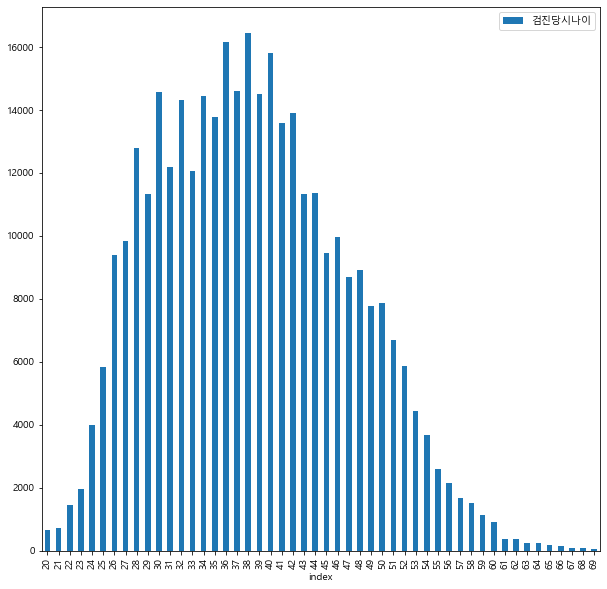

In [935]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='검진당시나이')

In [936]:
df_woman['검진당시나이'].value_counts().reset_index().sort_values('index')

,index,검진당시나이
40,20,651
39,21,724
36,22,1448
33,23,1952
29,24,3989
27,25,5818
20,26,9398
18,27,9832
11,28,12771
16,29,11313


# 검진항목 시각화

In [937]:
df_woman.describe()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
count,351846.000000,3.518460e+05,3.518460e+05,351846.0,351846.000000,351846.00000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000,351846.000000
mean,2021.766949,4.925404e+05,1.468905e+06,2.0,38.384970,111.59326,69.100366,42.492129,1.100003,91.012563,194.266429,65.958810,3.047746,113.332342,81.781195,7.961805,1.032321,107.103807,108.005498,97.020469,100.009310,96.704308,104.888582,107.788887,102.450617,94.790866,99.055281,100.339858,89.676790,101.016107,100.509797
std,1.740386,3.642123e+05,8.087660e+05,0.0,8.480191,11.76967,8.958086,7.775138,0.003865,8.264907,30.372022,12.535939,0.714984,27.887852,37.402587,0.704823,0.524608,40.801960,40.836620,41.684516,2.491757,41.669787,39.989065,37.539432,41.682659,39.246945,43.508213,13.862696,5.246078,13.926669,6.969077
min,2010.000000,4.800000e+01,2.130000e+02,2.0,20.000000,82.00000,45.000000,-9.000000,0.870000,69.000000,103.000000,21.000000,1.400000,30.000000,2.000000,2.500000,0.000000,0.030000,0.100000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.070000,0.050000,0.000000,20.000000,21.190000,61.000000
25%,2021.000000,2.152160e+05,6.438498e+05,2.0,32.000000,103.00000,62.000000,37.000000,1.100000,86.000000,174.000000,57.000000,2.550000,94.000000,56.000000,7.960000,1.000000,79.800000,81.290000,72.850000,100.000000,73.660000,80.680000,85.180000,74.950000,74.340000,68.320000,100.000000,90.000000,92.840000,96.000000
50%,2022.000000,3.694835e+05,1.380794e+06,2.0,38.000000,111.00000,68.000000,42.000000,1.100000,90.910000,194.290000,66.090000,2.980000,113.300000,75.000000,7.960000,1.000000,120.070000,122.760000,98.840000,100.000000,100.000000,112.810000,115.660000,110.260000,99.570000,105.750000,100.000000,90.000000,103.060000,102.000000
75%,2023.000000,8.222850e+05,2.169749e+06,2.0,44.000000,119.00000,75.000000,47.000000,1.100000,96.000000,212.000000,74.000000,3.380000,130.000000,95.000000,7.960000,1.000000,142.540000,142.440000,119.930000,100.000000,116.890000,140.160000,141.740000,139.650000,111.470000,138.330000,100.000000,90.000000,111.180000,106.000000
max,2024.000000,1.473631e+06,2.871442e+06,2.0,69.000000,154.00000,101.000000,93.000000,1.360000,120.400000,295.000000,97.000000,9.320000,209.200000,268.000000,17.200000,8.000000,150.000000,150.000000,200.000000,200.000000,199.590000,150.020000,150.100000,150.000000,199.950000,150.020000,150.110000,100.000000,136.190000,118.000000


<AxesSubplot:xlabel='검진당시나이'>

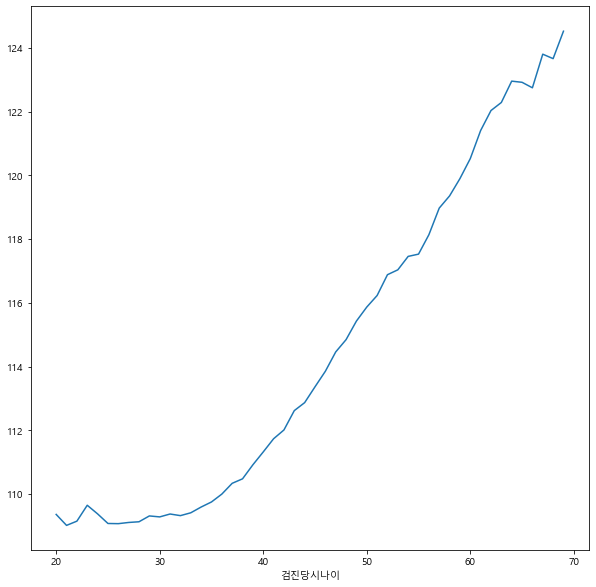

In [938]:
df_woman.groupby('검진당시나이').mean()[target_cols[0]].plot()

<AxesSubplot:xlabel='검진당시나이'>

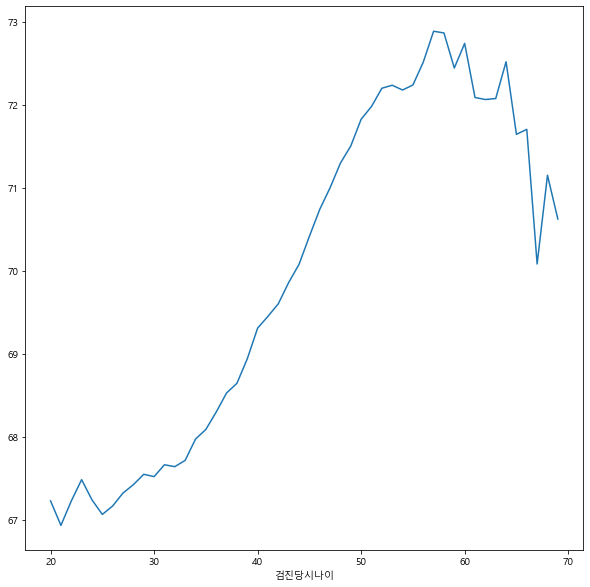

In [939]:
df_woman.groupby('검진당시나이').mean()[target_cols[1]].plot()

<AxesSubplot:xlabel='검진당시나이'>

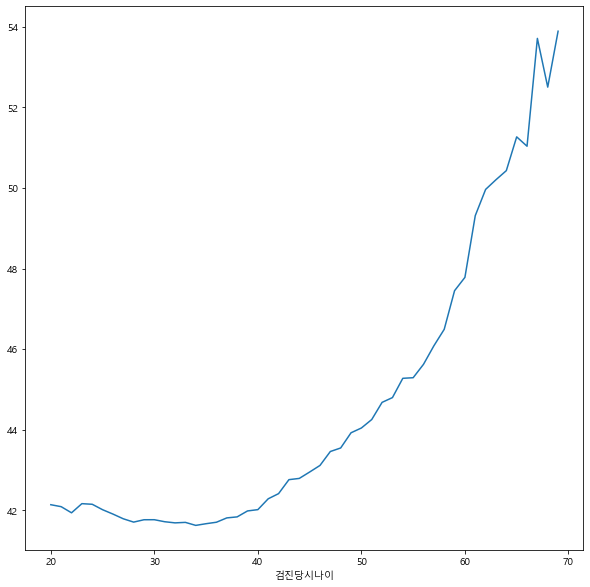

In [940]:
df_woman.groupby('검진당시나이').mean()[target_cols[2]].plot()

<AxesSubplot:xlabel='검진당시나이', ylabel='target'>

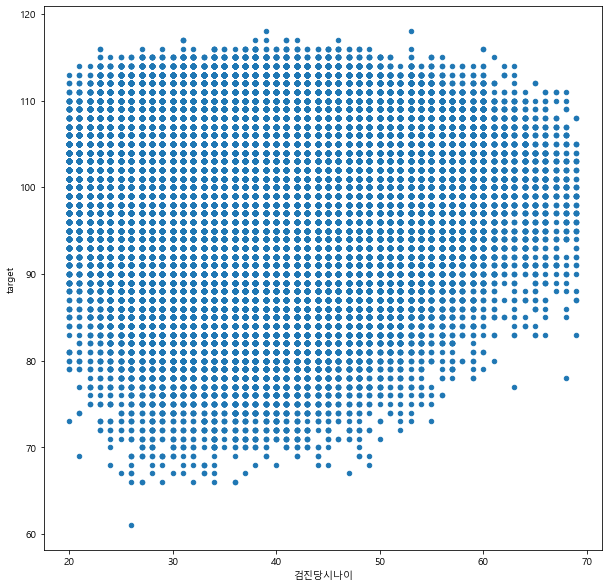

In [941]:
df_woman.plot.scatter(x='검진당시나이', y='target')

# 건강지수 Sampling

<AxesSubplot:xlabel='index'>

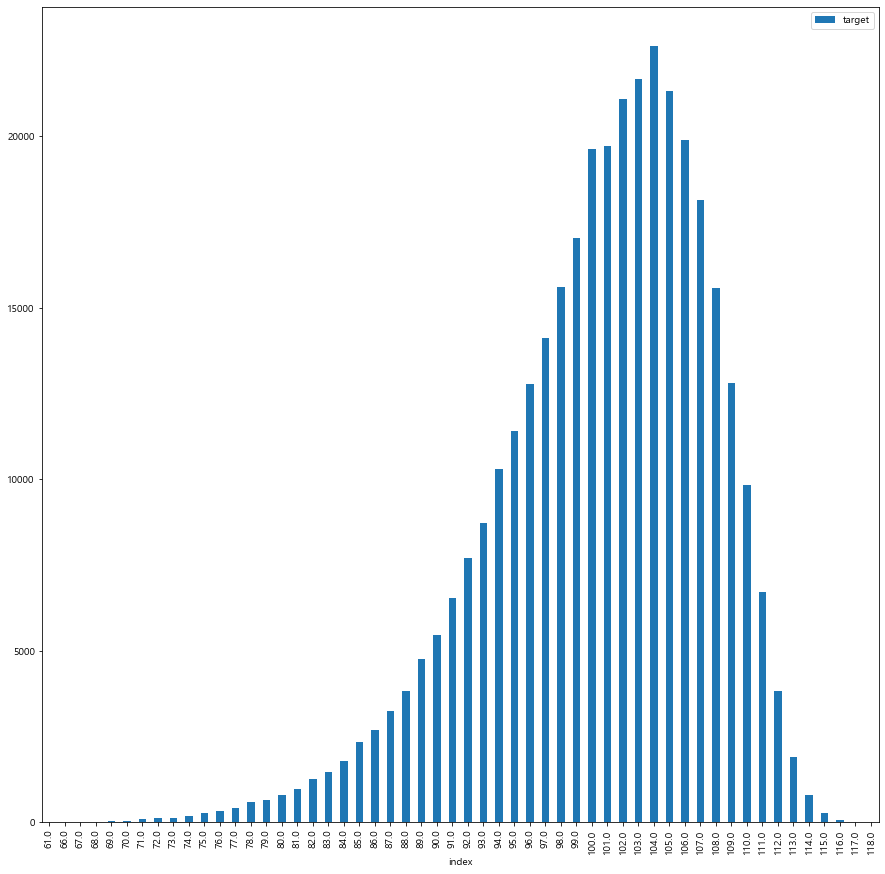

In [942]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [943]:
df_woman['target'].value_counts().reset_index().sort_values('index')

,index,target
53,61.0,1
51,66.0,8
49,67.0,11
48,68.0,15
47,69.0,30
46,70.0,55
44,71.0,86
42,72.0,125
43,73.0,116
41,74.0,179


In [944]:
df_woman_sampling = pd.DataFrame()

# for target in range(int(df_woman['target'].min()), 100):
for target in range(50, 100):
    
#     print(target, 200 - target)
    left_len = len(df_woman[df_woman['target'] == target])
    right_len = len(df_woman[df_woman['target'] == (200 - target)])
    
#     print(target, left_len, right_len)
    
    if left_len >= right_len:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(left_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(left_len, replace=True, random_state=87)])
    else:
        if left_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == target].sample(right_len, replace=True, random_state=87)])
        if right_len > 0:
            df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == (200 - target)].sample(right_len, replace=True, random_state=87)])   

df_woman_sampling = pd.concat([df_woman_sampling, df_woman[df_woman['target'] == 100]])                    

In [945]:
# df_woman = df_woman_sampling.copy()

<AxesSubplot:xlabel='index'>

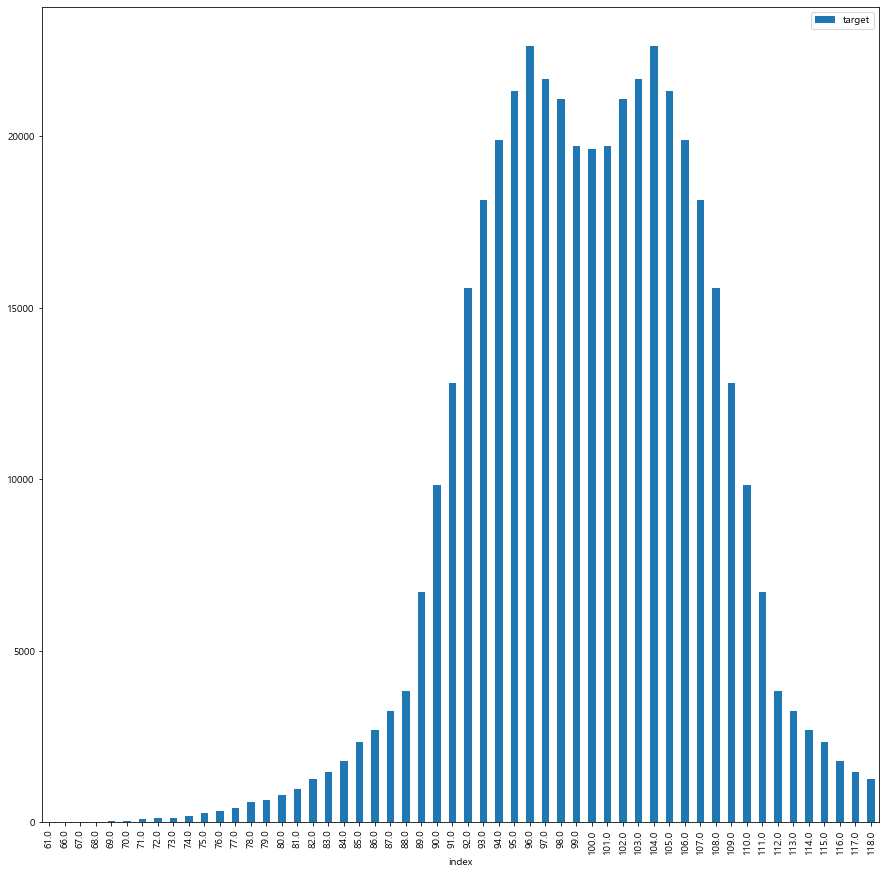

In [946]:
plt.rcParams["figure.figsize"] = (15, 15)
df_woman_sampling['target'].value_counts().reset_index().sort_values('index').plot.bar(x='index', y='target')

In [947]:
df_woman_sampling['target'].value_counts().reset_index().sort_values('index')

,index,target
53,61.0,1
52,66.0,8
51,67.0,11
50,68.0,15
49,69.0,30
48,70.0,55
47,71.0,86
45,72.0,125
46,73.0,116
44,74.0,179


# 나이별 확인하기

In [948]:
# df_woman['검진당시나이'].value_counts()

In [949]:
# int(df_woman['검진당시나이'].value_counts().mean())

In [950]:
# df_woman['검진당시나이'].min()

In [951]:
# df_woman['검진당시나이'].max()

In [952]:
# df_woman.columns

In [953]:
# df_temp = None
# # sample_len = int(df_woman['검진당시나이'].value_counts().mean())
# # sample_len = 500
                 
# for age in range(df_woman['검진당시나이'].min(), df_woman['검진당시나이'].max()):
#     temp_ = df_woman[df_woman['검진당시나이'] == age].sample(n = sample_len, replace=True)
# #     df_impute = pd.DataFrame(IterativeImputer(random_state=87).fit_transform(temp))
# #     print(df_impute.columns)
# #     df_impute.columns = df_man.columns
    
# #     np_imputed = mice(temp.values)
# #     np_imputed = fast_knn(temp.values, k=5)
# #     df_impute = pd.DataFrame(np_immputed)
# #     temp = df_impute
    
#     df_temp = pd.concat([df_temp, temp_])

In [954]:
# df_temp.info()

In [955]:
# df_temp.reset_index(drop=True, inplace=True)

In [956]:
# df_woman = df_temp.copy()

In [957]:
# df_woman['검진당시나이'].value_counts()

In [958]:
# df_woman[df_woman['검진당시나이']==20]

In [959]:
# df_woman[df_woman['검진당시나이']==20]['UID'].value_counts()

# model train

In [960]:
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '신장', '체중']
# train_columns = ['공복시혈당', '당화혈색소', '체질량지수', '허리둘레', '체중']

In [961]:
train_columns

['검진당시나이',
 '수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [962]:
# target_col = '검진당시나이'

In [963]:
target_col

'target'

## Min Max Scaling

In [964]:
from sklearn.preprocessing import MinMaxScaler

In [965]:
scaling_bool

False

In [966]:
if scaling_bool:
    scaler = MinMaxScaler()
    data_scaler = scaler.fit_transform(df_woman_sampling[train_columns])
    df_woman_scaled = pd.DataFrame(data=data_scaler, columns=train_columns)

In [967]:
if scaling_bool:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_scaled[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)
else:
    X_train2, X_test2, y_train2, y_test2 = train_test_split(df_woman_sampling[train_columns], df_woman_sampling[target_col], test_size=0.25, random_state=87)

## Linear Regression

In [968]:
# model2 = LinearRegression()

In [969]:
# model2.fit(X_train2, y_train2)

In [970]:
# model2.intercept_

In [971]:
# model2.coef_

## Randomized SearchCV, 파라미터 튜닝

In [972]:
model2 = XGBRegressor()

In [973]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
#     'min_child_weight':[4,5], 
#     'gamma':[i/10.0 for i in range(3,6)],  
#     'subsample':[i/10.0 for i in range(6,11)],
#     'colsample_bytree':[i/10.0 for i in range(6,11)], 
#     'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

In [974]:
# run randomized search
n_iter_search = 10

random_search = RandomizedSearchCV(model2, param_distributions=params,
                                   n_iter=n_iter_search, cv=5, scoring='neg_mean_squared_error')

In [975]:
import time
start = time.time()
random_search.fit(X_train2, y_train2)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))# best parameter

RandomizedSearchCV took 2126.97 seconds for 10 candidates parameter settings.


In [976]:
# best parameter
random_search.best_params_

{'objective': 'reg:tweedie',
 'n_estimators': 500,
 'eval_metric': 'rmse',
 'eta': 0.3,
 'booster': 'gbtree'}

In [977]:
# best score
random_search.best_score_

-0.40629408037791903

In [978]:
model2 = random_search.best_estimator_
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.3,
             eval_metric='rmse', gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=8,
             num_parallel_tree=1, objective='reg:tweedie', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

## Keras

In [979]:
# def build_model():
#     model = keras.Sequential([
#         layers.Dense(64, activation='relu', input_shape=[X_train.shape[1]]),
#         layers.Dense(64, activation='relu'),
#         layers.Dense(16, activation='relu'),
#         layers.Dense(4, activation='relu'),
#         layers.Dense(1)
#     ])

#     optimizer = keras.optimizers.RMSprop(0.001)
    
#     model.compile(loss='mse',
#                 optimizer=optimizer,
#                 metrics=['mae', 'mse'])
    
#     return model

In [980]:
# model = build_model()

In [981]:
# # 에포크가 끝날 때마다 점(.)을 출력해 훈련 진행 과정을 표시합니다
# class PrintDot(keras.callbacks.Callback):
#     def on_epoch_end(self, epoch, logs):
#         if epoch % 10 == 0: print('')
#         print('.', end='')

# EPOCHS = 100

# # patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
# early_stop = EarlyStopping(monitor='val_loss', patience=10)

# history = model.fit(
#     X_train, y_train,
#     epochs=EPOCHS, validation_split=0.2, verbose=0,
#     callbacks=[early_stop, PrintDot()])
# #     callbacks=[PrintDot()])

In [982]:
# model.summary()

In [983]:
# hist = pd.DataFrame(history.history)
# hist['epoch'] = history.epoch
# hist.tail()

In [984]:
# def plot_history(history):
#     hist = pd.DataFrame(history.history)
#     hist['epoch'] = history.epoch

#     plt.figure(figsize=(8,12))

#     plt.subplot(2,1,1)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Abs Error [MPG]')
#     plt.plot(hist['epoch'], hist['mae'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
# #     plt.ylim([0,5])
#     plt.legend()

#     plt.subplot(2,1,2)
#     plt.xlabel('Epoch')
#     plt.ylabel('Mean Square Error [$MPG^2$]')
#     plt.plot(hist['epoch'], hist['mse'], label='Train Error')
#     plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
# #     plt.ylim([0,20])
#     plt.legend()
#     plt.show()

In [985]:
# plot_history(history)

## pyTorch 신경망

In [986]:
np.shape(X_train)[1]

13

In [987]:
# class Regressor(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.fc1 = nn.Linear(np.shape(X_train)[1], 100) #첫 번째 레이어 
#         self.fc2 = nn.Linear(100, 50) #두 번째 레이어
#         self.fc3 = nn.Linear(50, 1) #출력 레이어 
# #         self.dropout = nn.Dropout(0.5) #연산 마다 50%의 노드를 랜덤하게 없앤다
# #         self.relu = nn.ReLU()
        
#     def forward(self, x):
#         x = F.relu(self.fc1(x)) #활성화 함수 적용                 
# #         x = self.dropout(F.relu(self.fc2(x))) #은닉층에서 전달할 때, 50% 를 dropout 
#         x = F.relu(self.fc2(x)) #활성화 함수 적용 
#         x = F.relu(self.fc3(x))
# #         x = self.fc1(x)
# #         x = self.fc2(x)
# #         x = self.fc3(x)
# #         x = self.relu(x)
#         return x

In [988]:
# model = Regressor()
# reg_loss = nn.MSELoss()
# # optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-7)
# optimizer = optim.Adam(model.parameters(), lr=0.001)

In [989]:
# epochs = 1000

In [990]:
# X_train  = torch.Tensor(X_train.to_numpy())
# X_test  = torch.Tensor(X_test.to_numpy())
# y_train  = torch.Tensor(y_train.to_numpy().reshape(-1, 1))
# y_test  = torch.Tensor(y_test.to_numpy().reshape(-1, 1))

In [991]:
# losses = []

# # 총 100번의 에포크 동안 모델 학습
# for epoch in range(epochs):
#     optimizer.zero_grad()      # 옵티마이저의 기울기 초기화
#     y_pred = model(X_train)          # 순전파 연산으로 예측값 계산
#     loss = reg_loss(y_pred, y_train)  # 손실 함수로 비용 계산
#     loss.backward()            # 역전파 연산으로 기울기 계산
#     optimizer.step()           # 옵티마이저를 통해 파라미터 업데이트

#     # 10번째 에포크마다 현재 에포크와 손실 값 출력
#     if epoch % 100 == 0:
#         print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, epochs, loss.item()))

#     # 손실 값을 리스트에 추가하여 추적
#     losses.append(loss.item())

In [992]:
# plt.plot(losses)

## coef 계산

In [993]:
# df_coef2 = pd.concat([pd.DataFrame(train_columns).reset_index(drop=True), pd.DataFrame(model2.coef_).reset_index(drop=True)], axis=1)

In [994]:
# df_coef2.columns = ['검사항목', 'coef']

In [995]:
# df_coef2['coef'] = df_coef2['coef'].round(4)

In [996]:
# df_coef2['abs_coef'] = df_coef2['coef'].abs()

In [997]:
# df_coef2.sort_values('abs_coef', ascending=False)

## Linear Regression Poly

In [998]:
# from sklearn.preprocessing import PolynomialFeatures
# poly2 = PolynomialFeatures(degree=1, include_bias=False)

In [999]:
# X_train2_poly = poly2.fit_transform(X_train2)
# X_test2_poly = poly2.fit_transform(X_test2)

In [1000]:
# slr2 = LinearRegression()

In [1001]:
# slr2.fit(X_train2_poly, y_train2)

In [1002]:
# np.shape(X_train2)

In [1003]:
# np.shape(X_train2_poly)

In [1004]:
# np.shape(X_test2)

In [1005]:
# np.shape(X_test2_poly)

In [1006]:
# y_pred2_poly = slr2.predict(X_test2_poly)

In [1007]:
# '''
# 성능 평가
# '''
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(y_test2, y_pred2_poly))
# # MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
# print('MSE :', mean_squared_error(y_test2, y_pred2_poly))
# #  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
# print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2_poly)))

In [1008]:
# from sklearn.metrics import r2_score
# r2_score(y_test2, y_pred2_poly)

# model save

In [1009]:
import pickle
with open(model_path_woman, 'wb') as f:
    pickle.dump(model2, f)

In [1010]:
import pickle
with open(model_path_woman, 'rb') as f:
    model2 = pickle.load(f)

# 성능 평가

## pyTorch 예측

In [1011]:
if pyTorch_bool:
    # Get predictions, 
    with torch.no_grad():
        model2.eval()
        y_pred2 = model2(X_test2)
        y_pred2 = y_pred2.numpy()

## XGBRegressor

In [1012]:
if XGB_bool:
    y_pred2 = model2.predict(X_test2)

In [1013]:
'''
성능 평가
'''
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(y_test2, y_pred2))
# MSE (Mean Squared Error) : 실제 값과 예측 값의 차이를 제곱해 평균화
print('MSE :', mean_squared_error(y_test2, y_pred2))
#  RMSE (Root Mean Squared Error) : MSE 값은 오류의 제곱을 구하므로 실제 오류 평균보다 더 커지는 특성이 있어 MSE에 루트를 씌운 RMSE 값을 사용
print('RMSE :', np.sqrt(mean_squared_error(y_test2, y_pred2)))

MAE : 0.47904726607827236
MSE : 0.383353046757083
RMSE : 0.6191551071880801


In [1014]:
from sklearn.metrics import r2_score
r2_score(y_test2, y_pred2)

0.9925681400382996

In [1015]:
model2.score(X_test2, y_test2)

0.9925681400382996

## feature importance

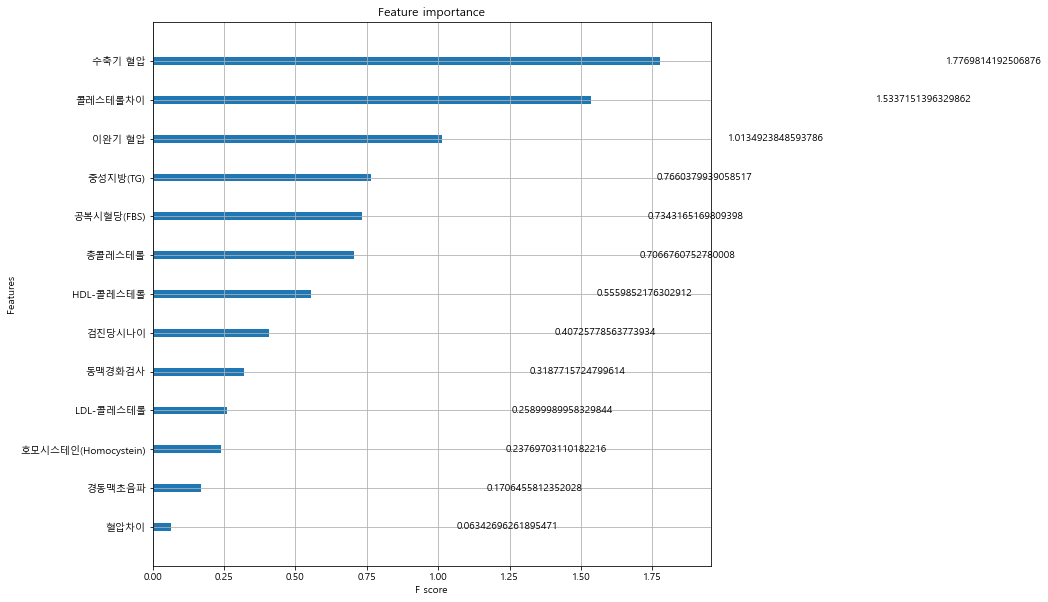

In [1016]:
if XGB_bool:
    plt.rcParams["figure.figsize"] = (10, 10)
    xgboost.plot_importance(model2, importance_type='gain')

In [1017]:
model2.feature_importances_

array([0.04766592, 0.20797996, 0.11862031, 0.00742356, 0.03730939,
       0.08594525, 0.08271018, 0.06507315, 0.17950778, 0.03031365,
       0.08965797, 0.02782033, 0.01997256], dtype=float32)

In [1018]:
df_feature2 = pd.concat([pd.DataFrame(train_columns), pd.DataFrame(model2.feature_importances_)], axis=1)
df_feature2.columns = ['columns', 'feature_importance']

In [1019]:
df_feature2.sort_values('feature_importance', ascending=False)

,columns,feature_importance
1,수축기 혈압,0.207980
8,콜레스테롤차이,0.179508
2,이완기 혈압,0.118620
10,중성지방(TG),0.089658
5,공복시혈당(FBS),0.085945
6,총콜레스테롤,0.082710
7,HDL-콜레스테롤,0.065073
0,검진당시나이,0.047666
4,동맥경화검사,0.037309
9,LDL-콜레스테롤,0.030314


# 실제나이 - 예측나이 결과

In [1020]:
df_test2 = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), pd.DataFrame(y_pred2).reset_index(drop=True)], axis=1)

In [1021]:
df_test2.head()

,target,0
0,87.0,85.808449
1,99.0,98.823380
2,105.0,105.141220
3,86.0,86.806931
4,92.0,92.246742


In [1022]:
df_test2.columns

Index(['target', 0], dtype='object')

In [1023]:
df_test2.columns = ['실제지수', '예측지수']

In [1024]:
df_test2['diff'] = df_test2['예측지수'] - df_test2['실제지수']

In [1025]:
df_test2.head()

,실제지수,예측지수,diff
0,87.0,85.808449,-1.191551
1,99.0,98.823380,-0.176620
2,105.0,105.141220,0.141220
3,86.0,86.806931,0.806931
4,92.0,92.246742,0.246742


In [1026]:
df_test2['diff_int'] = df_test2['diff'].round(0)

In [1027]:
len(df_test2)

109124

In [1028]:
df_test2.head()

,실제지수,예측지수,diff,diff_int
0,87.0,85.808449,-1.191551,-1.0
1,99.0,98.823380,-0.176620,-0.0
2,105.0,105.141220,0.141220,0.0
3,86.0,86.806931,0.806931,1.0
4,92.0,92.246742,0.246742,0.0


<AxesSubplot:>

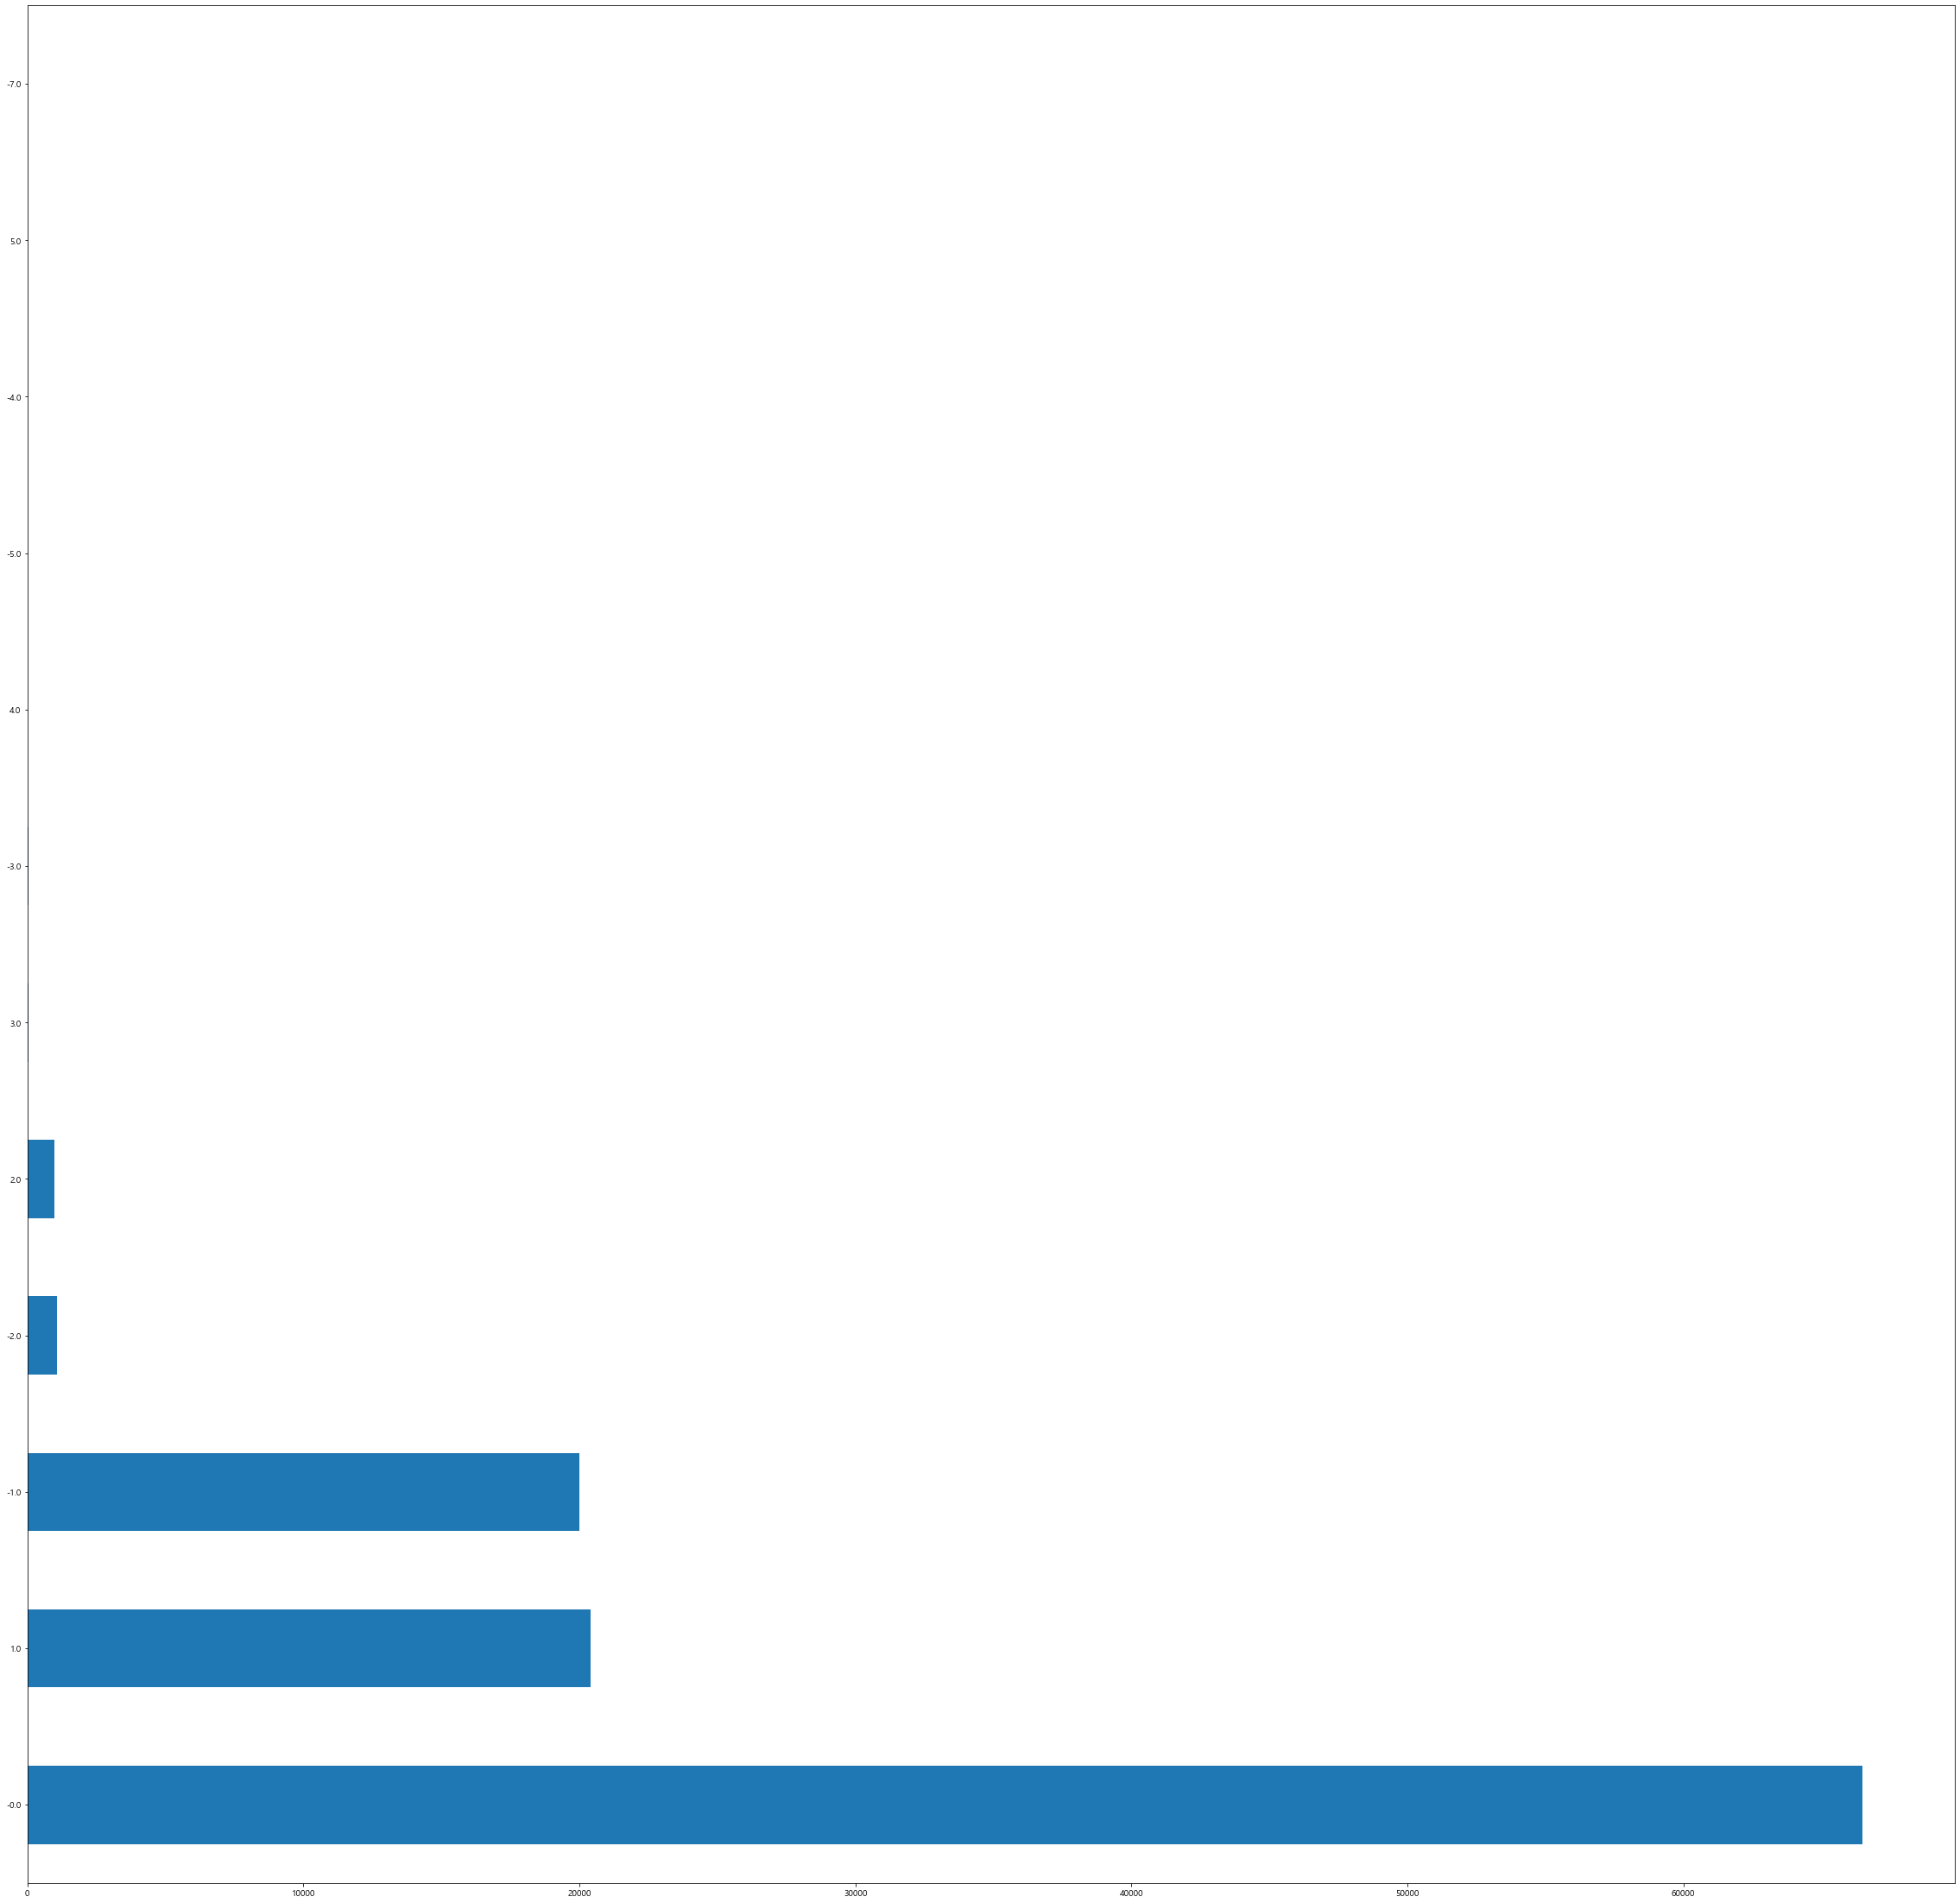

In [1029]:
plt.figure(figsize=(40, 40))
df_test2['diff_int'].value_counts().plot(kind='barh')
# plt.savefig('./output/png/숙취나이_결측치제거_20대_여자.png')

# 예측 나이 분포

In [1030]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_train_pred2 = model2(X_train2)
        X_train_pred2 = X_train_pred2.numpy()

    df_train2 = pd.DataFrame(X_train_pred2).reset_index(drop=True)
    y_test2 = pd.DataFrame(y_test2.numpy())

In [1031]:
if XGB_bool:
    df_train2 = pd.DataFrame(model2.predict(X_train2)).reset_index(drop=True)

In [1032]:
df_train2.round(0).value_counts()

104.0    17069
96.0     16749
105.0    16402
97.0     16323
103.0    16156
95.0     15981
102.0    15714
98.0     15648
94.0     15111
99.0     15051
101.0    14976
106.0    14891
100.0    14356
107.0    13678
93.0     13393
92.0     11889
108.0    11624
91.0      9683
109.0     9653
90.0      7267
110.0     7220
111.0     4980
89.0      4913
112.0     3058
88.0      3057
87.0      2407
113.0     2375
86.0      2034
114.0     2003
115.0     1719
85.0      1657
84.0      1327
116.0     1321
83.0      1126
117.0     1091
118.0      980
82.0       909
81.0       761
80.0       613
79.0       499
78.0       427
77.0       333
76.0       257
75.0       214
74.0       141
73.0        93
72.0        92
71.0        64
70.0        42
69.0        21
68.0        10
66.0         7
67.0         6
61.0         1
dtype: int64

In [1033]:
y_test2.value_counts()

96.0     5746
104.0    5617
103.0    5415
95.0     5373
97.0     5342
105.0    5316
102.0    5291
98.0     5291
94.0     5004
106.0    4986
100.0    4980
101.0    4919
99.0     4854
93.0     4505
107.0    4478
108.0    3963
92.0     3865
91.0     3217
109.0    3115
110.0    2511
90.0     2448
89.0     1730
111.0    1633
112.0     963
88.0      955
87.0      834
113.0     783
86.0      675
114.0     674
115.0     613
85.0      544
116.0     477
84.0      418
83.0      400
117.0     385
82.0      316
118.0     299
81.0      230
80.0      208
78.0      168
79.0      167
77.0      111
76.0       89
75.0       64
74.0       37
72.0       31
73.0       28
71.0       25
70.0       17
69.0        7
67.0        5
68.0        1
66.0        1
Name: target, dtype: int64

In [1034]:
df_plot = pd.DataFrame(y_test2.value_counts())

In [1035]:
df_plot.columns = ['count']

In [1036]:
df_plot.reset_index(inplace=True)

In [1037]:
df_plot = df_plot.sort_values('index', ascending=True)

In [1038]:
df_plot.set_index('index', inplace=True)

<AxesSubplot:xlabel='index'>

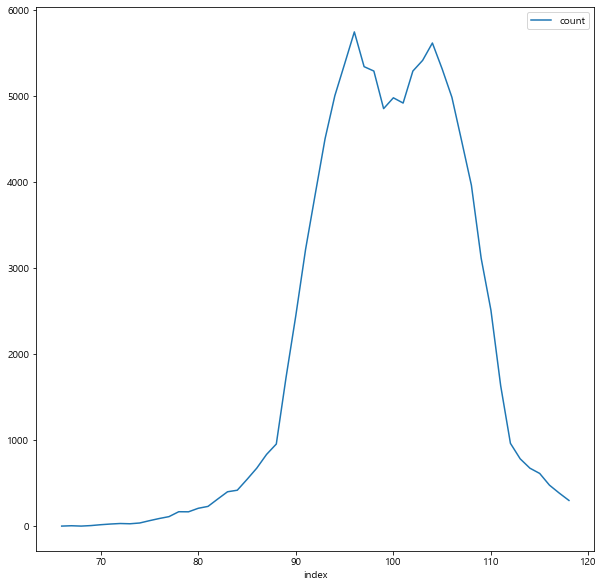

In [1039]:
df_plot.plot()

In [1040]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        X_test_pred2 = model2(X_test2)
        X_test_pred2 = X_test_pred2.numpy()
    df_test2 = pd.DataFrame(X_test_pred2).reset_index(drop=True)

In [1041]:
if XGB_bool:
    df_test2 = pd.DataFrame(model2.predict(X_test2)).reset_index(drop=True)

In [1042]:
df_test2.round(0).value_counts()

96.0     5661
104.0    5494
103.0    5393
105.0    5378
95.0     5376
97.0     5349
102.0    5309
98.0     5234
94.0     5086
101.0    5070
106.0    4976
99.0     4960
100.0    4809
107.0    4597
93.0     4511
92.0     3907
108.0    3892
91.0     3244
109.0    3201
90.0     2443
110.0    2366
111.0    1671
89.0     1652
88.0     1066
112.0    1000
87.0      805
113.0     749
114.0     698
86.0      647
115.0     599
85.0      491
116.0     478
84.0      445
117.0     385
83.0      385
118.0     299
82.0      282
81.0      254
80.0      201
79.0      173
78.0      159
77.0      119
76.0       88
75.0       66
74.0       41
73.0       31
72.0       30
71.0       26
70.0       16
67.0        5
69.0        4
68.0        2
66.0        1
dtype: int64

In [1043]:
df_plot2 = pd.DataFrame(df_test2.round(0).value_counts())

In [1044]:
df_plot2.columns = ['count']

In [1045]:
df_plot2.reset_index(inplace=True)

In [1046]:
df_plot2

,0,count
0,96.0,5661
1,104.0,5494
2,103.0,5393
3,105.0,5378
4,95.0,5376
5,97.0,5349
6,102.0,5309
7,98.0,5234
8,94.0,5086
9,101.0,5070


In [1047]:
df_plot2 = df_plot2.sort_values(0, ascending=True)

In [1048]:
df_plot2.set_index(0, inplace=True)

In [1049]:
df_plot2

,count
0,
66.0,1
67.0,5
68.0,2
69.0,4
70.0,16
71.0,26
72.0,30
73.0,31
74.0,41


<AxesSubplot:xlabel='0'>

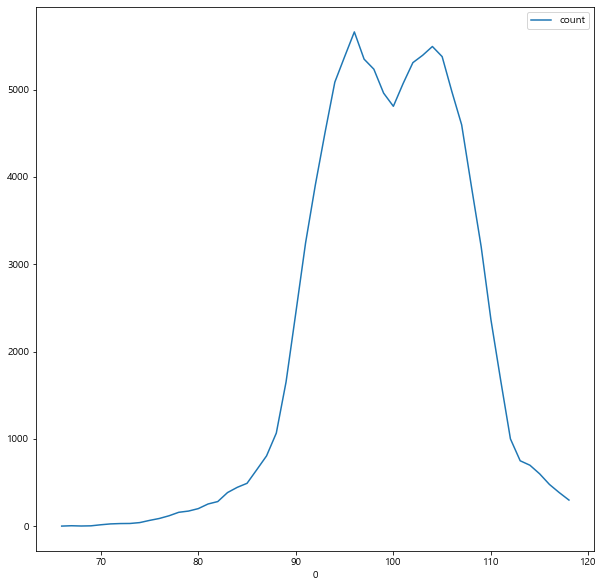

In [1050]:
df_plot2.plot()

# 시각화

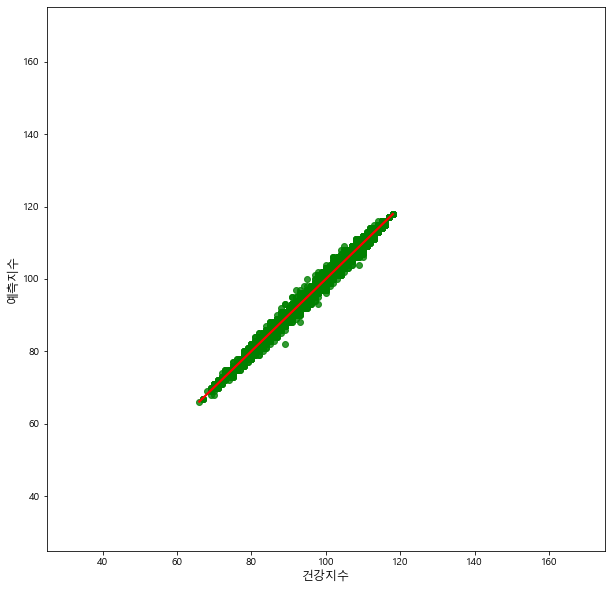

In [1051]:
plt.rcParams["figure.figsize"] = (10, 10)
df_scatter = pd.concat([pd.DataFrame(y_test2).reset_index(drop=True), df_test2.round(0)], axis = 1)
df_scatter.columns = ['건강지수', '예측지수']

import seaborn as sns

# plt.figure(figsize=(10, 10))
# plt.scatter(df_scatterx='나이', y='예측나이', s=9, cmap='Reds', color='green', trendline="ols")
# plt.colorbar()
# sns.scatterplot(x=df_scatter['나이'], y=df_scatter['예측나이'], color='green')
sns.regplot(x=df_scatter['건강지수'], y=df_scatter['예측지수'], scatter_kws={'color':'green'}, line_kws={'color':'red'})
plt.xlabel('건강지수', fontsize=12)
plt.ylabel('예측지수', fontsize=12)
plt.xlim([25, 175])
plt.ylim([25, 175])
plt.show()

# 여성 데이터 전체 계산

In [1052]:
df_woman.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
0,2023,48,2484053,2,35,110.0,70.0,40.0,1.1,90.91,194.29,66.09,3.04,113.3,81.77,7.96,1.0,144.45,128.93,101.96,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.0,90.0,107.09,104.0
1,2021,53,2632765,2,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0,101.81,139.21,41.41,100.0,108.05,146.24,135.44,149.59,103.02,132.08,100.0,90.0,112.67,106.0
2,2023,53,2632764,2,28,104.0,56.0,48.0,1.1,96.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,140.07,58.89,59.76,100.0,57.14,100.00,100.00,100.00,100.00,100.00,100.0,90.0,92.54,96.0
3,2024,53,2658222,2,29,120.0,73.0,47.0,1.1,101.00,176.00,82.00,2.15,79.0,76.00,7.96,1.0,78.58,102.98,70.06,100.0,27.06,144.01,95.77,95.80,135.17,103.66,100.0,90.0,95.02,98.0
4,2020,54,497669,2,30,108.0,67.0,41.0,1.1,83.00,212.00,79.00,2.68,119.0,68.00,7.96,1.0,146.01,131.13,100.00,100.0,126.34,96.03,96.22,148.58,77.99,135.65,100.0,90.0,113.71,107.0


In [1053]:
df_woman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351846 entries, 0 to 351845
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   검진년도                     351846 non-null  int32  
 1   UID                      351846 non-null  int64  
 2   CU_REC_ID                351846 non-null  int64  
 3   SEX                      351846 non-null  int64  
 4   검진당시나이                   351846 non-null  int64  
 5   수축기 혈압                   351846 non-null  float64
 6   이완기 혈압                   351846 non-null  float64
 7   혈압차이                     351846 non-null  float64
 8   동맥경화검사                   351846 non-null  float64
 9   공복시혈당(FBS)               351846 non-null  float64
 10  총콜레스테롤                   351846 non-null  float64
 11  HDL-콜레스테롤                351846 non-null  float64
 12  콜레스테롤차이                  351846 non-null  float64
 13  LDL-콜레스테롤                351846 non-null  float64
 14  중성지방

In [1054]:
df_woman[df_woman['UID'] == 196909]

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target
76046,2021,196909,2495703,2,28,92.0,62.0,30.0,1.1,85.0,140.0,65.0,2.15,61.0,70.0,8.30,1.0,42.71,150.00,175.67,100.0,122.54,42.97,149.22,91.86,178.74,127.12,138.02,90.0,116.30,108.0
76047,2022,196909,2495702,2,29,105.0,79.0,26.0,1.1,79.0,144.0,61.0,2.36,72.0,53.0,7.96,1.0,137.38,56.19,191.34,100.0,161.47,44.10,143.20,136.54,156.31,147.81,100.00,90.0,120.70,110.0
76048,2023,196909,2495700,2,30,115.0,62.0,53.0,1.1,87.0,142.0,66.0,2.15,61.0,76.0,7.96,0.0,117.27,147.22,32.47,100.0,104.99,41.14,144.92,91.55,179.36,112.66,100.00,100.0,107.35,104.0
76049,2024,196909,2495697,2,31,112.0,67.0,45.0,1.1,92.0,146.0,62.0,2.35,74.0,49.0,7.96,1.0,131.83,141.89,82.76,100.0,81.86,53.12,144.41,130.01,147.21,139.60,100.00,90.0,113.21,107.0


In [1055]:
if scaling_bool:
    df_pred2 = df_woman_scaled.copy()
else:
    df_pred2 = df_woman.copy()

In [1056]:
len(df_pred2)

351846

In [1057]:
df_pred2.reset_index(drop=True, inplace=True)

In [1058]:
X_test2

,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
296490,37,138.0,79.0,59.0,1.1,85.0,185.0,45.0,4.11,127.0,87.0,7.96,1.0
303067,37,121.0,81.0,40.0,1.1,87.0,207.0,65.0,3.18,133.0,45.0,7.96,1.0
284013,39,92.0,65.0,27.0,1.1,98.0,177.0,78.0,2.27,84.0,74.0,7.96,1.0
252275,31,118.0,62.0,56.0,1.1,95.0,273.0,81.0,3.37,171.0,107.0,7.96,1.0
266273,28,125.0,89.0,36.0,1.1,90.0,161.0,79.0,2.04,76.0,95.0,7.96,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153724,37,134.0,77.0,57.0,1.1,91.0,156.0,63.0,2.48,65.0,141.0,7.96,1.0
11629,43,149.0,99.0,50.0,1.1,92.0,169.0,65.0,2.60,95.0,121.0,7.96,1.0
168403,51,119.0,80.0,39.0,1.1,85.0,160.0,71.0,2.25,81.0,38.0,6.60,1.0
34459,59,104.0,62.0,42.0,1.1,101.0,271.0,58.0,4.67,196.0,84.0,7.96,1.0


In [1059]:
df_pred2.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압', '혈압차이',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
       '중성지방(TG)', '호모시스테인(Homocystein)', '경동맥초음파', '수축기 혈압_kde', '이완기 혈압_kde',
       '혈압차이_kde', '동맥경화검사_kde', '공복시혈당(FBS)_kde', '총콜레스테롤_kde',
       'HDL-콜레스테롤_kde', '콜레스테롤차이_kde', 'LDL-콜레스테롤_kde', '중성지방(TG)_kde',
       '호모시스테인(Homocystein)_kde', '경동맥초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [1060]:
df_pred2[train_columns]

,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파
0,35,110.0,70.0,40.0,1.1,90.91,194.29,66.09,3.04,113.3,81.77,7.96,1.0
1,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0
2,28,104.0,56.0,48.0,1.1,96.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0
3,29,120.0,73.0,47.0,1.1,101.00,176.00,82.00,2.15,79.0,76.00,7.96,1.0
4,30,108.0,67.0,41.0,1.1,83.00,212.00,79.00,2.68,119.0,68.00,7.96,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
351841,35,103.0,63.0,40.0,1.1,83.00,233.00,75.00,3.11,140.0,89.00,7.96,0.0
351842,60,151.0,88.0,63.0,1.1,95.00,200.00,53.00,3.77,131.0,82.00,7.96,1.0
351843,62,108.0,69.0,39.0,1.1,105.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0
351844,30,102.0,68.0,34.0,1.1,85.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0


In [1061]:
if pyTorch_bool:
    # Get predictions
    with torch.no_grad():
        model2.eval()
        pred_data2 = model2(torch.Tensor(df_pred2[train_columns].to_numpy()))
        pred_data2 = pred_data2.numpy()

In [1062]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_pred2[train_columns])

In [1063]:
pred_data2

array([103.62296 , 105.99042 ,  96.667305, ..., 100.8711  , 105.39134 ,
        95.94253 ], dtype=float32)

In [1064]:
df_output2 = pd.concat([df_pred2, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [1065]:
if scaling_bool:
    df_output2 = pd.concat([df_woman[['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이']], df_output2], axis=1)

In [1066]:
df_output2.head(10)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target,예측지수
0,2023,48,2484053,2,35,110.0,70.0,40.0,1.1,90.91,194.29,66.09,3.04,113.3,81.77,7.96,1.0,144.45,128.93,101.96,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.0,90.0,107.09,104.0,103.622963
1,2021,53,2632765,2,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0,101.81,139.21,41.41,100.0,108.05,146.24,135.44,149.59,103.02,132.08,100.0,90.0,112.67,106.0,105.990417
2,2023,53,2632764,2,28,104.0,56.0,48.0,1.1,96.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,140.07,58.89,59.76,100.0,57.14,100.00,100.00,100.00,100.00,100.00,100.0,90.0,92.54,96.0,96.667305
3,2024,53,2658222,2,29,120.0,73.0,47.0,1.1,101.00,176.00,82.00,2.15,79.0,76.00,7.96,1.0,78.58,102.98,70.06,100.0,27.06,144.01,95.77,95.80,135.17,103.66,100.0,90.0,95.02,98.0,97.882507
4,2020,54,497669,2,30,108.0,67.0,41.0,1.1,83.00,212.00,79.00,2.68,119.0,68.00,7.96,1.0,146.01,131.13,100.00,100.0,126.34,96.03,96.22,148.58,77.99,135.65,100.0,90.0,113.71,107.0,106.769974
5,2022,54,1319859,2,32,105.0,78.0,27.0,1.1,85.00,246.00,81.00,3.04,155.0,50.00,7.96,1.0,149.02,62.91,189.41,100.0,113.09,32.65,86.74,112.79,22.40,138.58,100.0,90.0,100.12,100.0,99.347214
6,2023,54,2039511,2,33,118.0,73.0,45.0,1.1,87.00,212.00,73.00,2.90,124.0,72.00,7.96,1.0,106.65,91.50,73.36,100.0,106.40,118.28,122.61,125.05,81.17,129.05,100.0,90.0,103.43,102.0,101.672516
7,2024,54,2750990,2,34,126.0,76.0,50.0,1.1,85.00,231.00,80.00,2.89,129.0,110.00,7.96,1.0,35.11,81.12,45.60,100.0,117.94,49.45,82.20,130.08,63.91,42.00,100.0,90.0,77.06,89.0,89.143822
8,2019,56,1605927,2,30,106.0,73.0,33.0,1.1,90.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,150.00,87.74,155.78,100.0,100.24,100.00,100.00,100.00,100.00,100.00,100.0,90.0,107.61,104.0,104.011917
9,2020,56,1605928,2,31,105.0,67.0,38.0,1.1,93.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,146.71,141.89,107.85,100.0,75.12,100.00,100.00,100.00,100.00,100.00,100.0,90.0,107.19,104.0,104.218002


## 예측지수 성능평가

In [1067]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['target'], df_output2['예측지수'])

0.4829721683744992

# target으로 나이 계산

In [1068]:
df_output2['예측나이'] = ((100 - df_output2['예측지수']) / 5) + df_output2['검진당시나이']
df_output2['예측나이'] = df_output2['예측나이'].round(2)

In [1069]:
df_output2.head(30)

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target,예측지수,예측나이
0,2023,48,2484053,2,35,110.0,70.0,40.0,1.1,90.91,194.29,66.09,3.04,113.3,81.77,7.96,1.0,144.45,128.93,101.96,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.09,104.0,103.622963,34.28
1,2021,53,2632765,2,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0,101.81,139.21,41.41,100.0,108.05,146.24,135.44,149.59,103.02,132.08,100.00,90.0,112.67,106.0,105.990417,24.80
2,2023,53,2632764,2,28,104.0,56.0,48.0,1.1,96.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,140.07,58.89,59.76,100.0,57.14,100.00,100.00,100.00,100.00,100.00,100.00,90.0,92.54,96.0,96.667305,28.67
3,2024,53,2658222,2,29,120.0,73.0,47.0,1.1,101.00,176.00,82.00,2.15,79.0,76.00,7.96,1.0,78.58,102.98,70.06,100.0,27.06,144.01,95.77,95.80,135.17,103.66,100.00,90.0,95.02,98.0,97.882507,29.42
4,2020,54,497669,2,30,108.0,67.0,41.0,1.1,83.00,212.00,79.00,2.68,119.0,68.00,7.96,1.0,146.01,131.13,100.00,100.0,126.34,96.03,96.22,148.58,77.99,135.65,100.00,90.0,113.71,107.0,106.769974,28.65
5,2022,54,1319859,2,32,105.0,78.0,27.0,1.1,85.00,246.00,81.00,3.04,155.0,50.00,7.96,1.0,149.02,62.91,189.41,100.0,113.09,32.65,86.74,112.79,22.40,138.58,100.00,90.0,100.12,100.0,99.347214,32.13
6,2023,54,2039511,2,33,118.0,73.0,45.0,1.1,87.00,212.00,73.00,2.90,124.0,72.00,7.96,1.0,106.65,91.50,73.36,100.0,106.40,118.28,122.61,125.05,81.17,129.05,100.00,90.0,103.43,102.0,101.672516,32.67
7,2024,54,2750990,2,34,126.0,76.0,50.0,1.1,85.00,231.00,80.00,2.89,129.0,110.00,7.96,1.0,35.11,81.12,45.60,100.0,117.94,49.45,82.20,130.08,63.91,42.00,100.00,90.0,77.06,89.0,89.143822,36.17
8,2019,56,1605927,2,30,106.0,73.0,33.0,1.1,90.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,150.00,87.74,155.78,100.0,100.24,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.61,104.0,104.011917,29.20
9,2020,56,1605928,2,31,105.0,67.0,38.0,1.1,93.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,146.71,141.89,107.85,100.0,75.12,100.00,100.00,100.00,100.00,100.00,100.00,90.0,107.19,104.0,104.218002,30.16


## 예측나이 성능평가

In [1070]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
mean_absolute_error(df_output2['검진당시나이'], df_output2['예측나이'])

1.1160739357559841

# 최종 산출

In [1071]:
df_output2.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,수축기 혈압_kde,이완기 혈압_kde,혈압차이_kde,동맥경화검사_kde,공복시혈당(FBS)_kde,총콜레스테롤_kde,HDL-콜레스테롤_kde,콜레스테롤차이_kde,LDL-콜레스테롤_kde,중성지방(TG)_kde,호모시스테인(Homocystein)_kde,경동맥초음파_scaling,kde_mean,target,예측지수,예측나이
0,2023,48,2484053,2,35,110.0,70.0,40.0,1.1,90.91,194.29,66.09,3.04,113.3,81.77,7.96,1.0,144.45,128.93,101.96,100.0,100.00,100.00,100.00,100.00,100.00,100.00,100.0,90.0,107.09,104.0,103.622963,34.28
1,2021,53,2632765,2,26,116.0,65.0,51.0,1.1,86.00,175.00,70.00,2.50,92.0,63.00,7.96,1.0,101.81,139.21,41.41,100.0,108.05,146.24,135.44,149.59,103.02,132.08,100.0,90.0,112.67,106.0,105.990417,24.80
2,2023,53,2632764,2,28,104.0,56.0,48.0,1.1,96.00,194.29,66.09,3.04,113.3,81.77,7.96,1.0,140.07,58.89,59.76,100.0,57.14,100.00,100.00,100.00,100.00,100.00,100.0,90.0,92.54,96.0,96.667305,28.67
3,2024,53,2658222,2,29,120.0,73.0,47.0,1.1,101.00,176.00,82.00,2.15,79.0,76.00,7.96,1.0,78.58,102.98,70.06,100.0,27.06,144.01,95.77,95.80,135.17,103.66,100.0,90.0,95.02,98.0,97.882507,29.42
4,2020,54,497669,2,30,108.0,67.0,41.0,1.1,83.00,212.00,79.00,2.68,119.0,68.00,7.96,1.0,146.01,131.13,100.00,100.0,126.34,96.03,96.22,148.58,77.99,135.65,100.0,90.0,113.71,107.0,106.769974,28.65


# DataMart csv

In [1072]:
df_copy = df.copy()

In [1073]:
df_copy.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파
0,2010,7282,2520,1,42,110.0,66.0,NaN,83.0,224.0,73.0,139.0,98.0,NaN,None,NaN
1,2010,7490,3638,1,39,120.0,80.0,NaN,125.0,265.0,57.0,187.4,103.0,NaN,None,NaN
2,2010,7915,3997,1,36,120.0,70.0,NaN,104.0,196.0,37.0,50.0,547.0,NaN,None,NaN
3,2010,8056,4745,1,42,NaN,NaN,NaN,89.0,310.0,53.0,181.4,378.0,NaN,None,NaN
4,2010,8457,3929,1,38,130.0,80.0,NaN,121.0,189.0,50.0,108.0,154.0,NaN,None,NaN


In [1074]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213899 entries, 0 to 1213898
Data columns (total 16 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   검진년도                        1213899 non-null  int32  
 1   UID                         1213899 non-null  int64  
 2   CU_REC_ID                   1213899 non-null  int64  
 3   SEX                         1213899 non-null  int64  
 4   검진당시나이                      1213899 non-null  int64  
 5   수축기 혈압                      1206722 non-null  float64
 6   이완기 혈압                      1207406 non-null  float64
 7   동맥경화검사                      4262 non-null     float64
 8   공복시혈당(FBS)                  1199640 non-null  float64
 9   총콜레스테롤                      1151191 non-null  float64
 10  HDL-콜레스테롤                   1146478 non-null  float64
 11  LDL-콜레스테롤                   1141538 non-null  float64
 12  중성지방(TG)                    1147041 non-null  float64
 1

In [1075]:
minimums

[82.0,
 45.0,
 0.8000000000000002,
 68.5,
 103.0,
 17.0,
 29.5,
 -52.0,
 2.450000000000001,
 -7.5]

In [1076]:
maximums

[154.0, 101.0, 1.44, 120.5, 295.0, 97.0, 209.5, 268.0, 17.25, 12.5]

In [1077]:
train_columns

['검진당시나이',
 '수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [1078]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [1080]:
target_cols_temp = target_cols.copy()
target_cols_temp.remove('혈압차이')
target_cols_temp.remove('콜레스테롤차이')

In [1081]:
target_cols_temp

['수축기 혈압',
 '이완기 혈압',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [1106]:
for idx, col in enumerate(target_cols_temp):
    df_copy.loc[df_copy[col] < minimums[idx], col] = minimums[idx]
    df_copy.loc[df_copy[col] > maximums[idx], col] = maximums[idx]

In [1107]:
df_woman_csv = df_copy[df_copy['SEX'] == 2]
len(df_woman_csv)

448440

In [1108]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파 (Carotid Sono)_text,경동맥초음파
10,2010,15894,2533,2,29,109.0,77.0,NaN,81.0,160.0,75.0,74.0,55.0,NaN,None,NaN
22,2010,42223,1364,2,24,131.0,85.0,NaN,83.0,178.0,68.0,99.0,55.0,NaN,None,NaN
37,2011,364096,6645,2,32,110.0,70.0,NaN,91.0,172.0,71.0,NaN,53.0,NaN,NaN,NaN
45,2010,120518,3595,2,30,100.0,70.0,NaN,86.0,265.0,95.0,150.0,100.0,NaN,None,NaN
63,2011,698706,6600,2,36,110.0,70.0,NaN,88.0,191.0,59.0,NaN,112.0,NaN,NaN,NaN


## 검진 항목 all 결측치 지우기

In [1109]:
target_cols

['수축기 혈압',
 '이완기 혈압',
 '혈압차이',
 '동맥경화검사',
 '공복시혈당(FBS)',
 '총콜레스테롤',
 'HDL-콜레스테롤',
 '콜레스테롤차이',
 'LDL-콜레스테롤',
 '중성지방(TG)',
 '호모시스테인(Homocystein)',
 '경동맥초음파']

In [1136]:
df_woman_csv.dropna(subset=target_cols_temp, how='all', inplace=True)

In [1137]:
df_woman_csv.reset_index(drop=True, inplace=True)

In [1138]:
len(df_woman_csv)

447296

## fillna

In [1139]:
df_woman.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압', '혈압차이',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
       '중성지방(TG)', '호모시스테인(Homocystein)', '경동맥초음파', '수축기 혈압_kde', '이완기 혈압_kde',
       '혈압차이_kde', '동맥경화검사_kde', '공복시혈당(FBS)_kde', '총콜레스테롤_kde',
       'HDL-콜레스테롤_kde', '콜레스테롤차이_kde', 'LDL-콜레스테롤_kde', '중성지방(TG)_kde',
       '호모시스테인(Homocystein)_kde', '경동맥초음파_scaling', 'kde_mean', 'target'],
      dtype='object')

In [1140]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압', '혈압차이',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
       '중성지방(TG)', '호모시스테인(Homocystein)', '경동맥초음파', '예측지수', '예측나이'],
      dtype='object')

In [1141]:
df_woman_csv.isnull().sum()

검진년도                        0
UID                         0
CU_REC_ID                   0
SEX                         0
검진당시나이                      0
수축기 혈압                   1422
이완기 혈압                   1102
혈압차이                     1472
동맥경화검사                 445820
공복시혈당(FBS)               3488
총콜레스테롤                  25473
HDL-콜레스테롤               27381
콜레스테롤차이                 27664
LDL-콜레스테롤               28760
중성지방(TG)                27125
호모시스테인(Homocystein)    400472
경동맥초음파                 421878
예측지수                   276198
예측나이                   276198
dtype: int64

In [1142]:
df_woman_csv[score_text_real].fillna(fill_th, inplace=True)

In [1143]:
df_woman_csv.fillna(df_woman.mean().round(2), inplace=True)

## 스크리닝

### 수축기 혈압

In [1144]:
screening = 80

In [1145]:
scr_col = '수축기 혈압'

In [1146]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이


In [1147]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

In [1148]:
df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [1149]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이


In [1150]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

### 이완기 혈압

In [1151]:
screening = 40

In [1152]:
scr_col = '이완기 혈압'

In [1153]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이


In [1154]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

In [1155]:
df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [1156]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이


In [1157]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

### 공복시 혈당

In [1158]:
screening = 50

In [1159]:
scr_col = '공복시혈당(FBS)'

In [1160]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이


In [1161]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

In [1162]:
df_woman_csv.loc[df_woman_csv[scr_col] < screening, scr_col] = screening

In [1163]:
df_woman_csv[df_woman_csv[scr_col] < screening].head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이


In [1164]:
len(df_woman_csv[df_woman_csv[scr_col] < screening])

0

# 변수 생성

## 혈압 차이

In [1165]:
df_woman_csv['혈압차이'] = df_woman_csv['수축기 혈압'] - df_woman_csv['이완기 혈압']

## 콜레스테롤 차이

In [1166]:
df_woman_csv['콜레스테롤차이'] = df_woman_csv['총콜레스테롤'] / df_woman_csv['HDL-콜레스테롤']

In [1167]:
df_woman_csv['콜레스테롤차이'] = df_woman_csv['콜레스테롤차이'].round(2)

## 컬럼 순서 변경

In [1168]:
df_woman_csv.columns

Index(['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이', '수축기 혈압', '이완기 혈압', '혈압차이',
       '동맥경화검사', '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
       '중성지방(TG)', '호모시스테인(Homocystein)', '경동맥초음파', '예측지수', '예측나이'],
      dtype='object')

In [1169]:
cols_temp = ['검진년도', 'UID', 'CU_REC_ID', 'SEX', '검진당시나이',
        '수축기 혈압', '이완기 혈압', '혈압차이', '동맥경화검사', 
        '공복시혈당(FBS)', '총콜레스테롤', 'HDL-콜레스테롤', '콜레스테롤차이', 'LDL-콜레스테롤',
        '중성지방(TG)', '호모시스테인(Homocystein)', score_text_real,        
       ]

df_woman_csv = df_woman_csv[cols_temp]

## 모델 예측

In [1170]:
if XGB_bool:
    # Get predictions
    # pred_data = model.predict(df_pred[train_columns])
    pred_data2 = model2.predict(df_woman_csv[train_columns])

In [1171]:
pred_data2 = pred_data2.round(0)

In [1172]:
df_woman_csv = pd.concat([df_woman_csv, pd.DataFrame(pred_data2, columns=['예측지수']).reset_index(drop=True)], axis=1)

In [1173]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수
0,2010.0,15894.0,2533.0,2.0,29.0,109.0,77.0,32.0,1.1,81.0,160.0,75.0,2.13,74.00,55.0,7.96,1.0,110.0
1,2010.0,42223.0,1364.0,2.0,24.0,131.0,85.0,46.0,1.1,83.0,178.0,68.0,2.62,99.00,55.0,7.96,1.0,97.0
2,2011.0,364096.0,6645.0,2.0,32.0,110.0,70.0,40.0,1.1,91.0,172.0,71.0,2.42,113.33,53.0,7.96,1.0,110.0
3,2010.0,120518.0,3595.0,2.0,30.0,100.0,70.0,30.0,1.1,86.0,265.0,95.0,2.79,150.00,100.0,7.96,1.0,94.0
4,2011.0,698706.0,6600.0,2.0,36.0,110.0,70.0,40.0,1.1,88.0,191.0,59.0,3.24,113.33,112.0,7.96,1.0,105.0


### 성능 평가

In [1174]:
# # MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
# print('MAE :',mean_absolute_error(df_woman_csv['target'], df_woman_csv['예측지수']))

In [1175]:
# r2_score(df_woman_csv['target'], df_woman_csv['예측지수'])

## 예측나이 계산

In [1176]:
df_woman_csv['예측나이'] = ((100 - df_woman_csv['예측지수']) / 5) + df_woman_csv['검진당시나이']
df_woman_csv['예측나이'] = df_woman_csv['예측나이'].round(2)

### 성능 평가

In [1177]:
# MAE (Mean Absolute Error) : 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화
print('MAE :',mean_absolute_error(df_woman_csv['검진당시나이'], df_woman_csv['예측나이']))

MAE : 1.1591375733295177


In [1178]:
r2_score(df_woman_csv['검진당시나이'], df_woman_csv['예측나이'])

0.9707625819285068

In [1179]:
df_woman_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
0,2010.0,15894.0,2533.0,2.0,29.0,109.0,77.0,32.0,1.1,81.0,160.0,75.0,2.13,74.00,55.0,7.96,1.0,110.0,27.0
1,2010.0,42223.0,1364.0,2.0,24.0,131.0,85.0,46.0,1.1,83.0,178.0,68.0,2.62,99.00,55.0,7.96,1.0,97.0,24.6
2,2011.0,364096.0,6645.0,2.0,32.0,110.0,70.0,40.0,1.1,91.0,172.0,71.0,2.42,113.33,53.0,7.96,1.0,110.0,30.0
3,2010.0,120518.0,3595.0,2.0,30.0,100.0,70.0,30.0,1.1,86.0,265.0,95.0,2.79,150.00,100.0,7.96,1.0,94.0,31.2
4,2011.0,698706.0,6600.0,2.0,36.0,110.0,70.0,40.0,1.1,88.0,191.0,59.0,3.24,113.33,112.0,7.96,1.0,105.0,35.0


In [1180]:
df_woman_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447296 entries, 0 to 447295
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   검진년도                 447296 non-null  float64
 1   UID                  447296 non-null  float64
 2   CU_REC_ID            447296 non-null  float64
 3   SEX                  447296 non-null  float64
 4   검진당시나이               447296 non-null  float64
 5   수축기 혈압               447296 non-null  float64
 6   이완기 혈압               447296 non-null  float64
 7   혈압차이                 447296 non-null  float64
 8   동맥경화검사               447296 non-null  float64
 9   공복시혈당(FBS)           447296 non-null  float64
 10  총콜레스테롤               447296 non-null  float64
 11  HDL-콜레스테롤            447296 non-null  float64
 12  콜레스테롤차이              447296 non-null  float64
 13  LDL-콜레스테롤            447296 non-null  float64
 14  중성지방(TG)             447296 non-null  float64
 15  호모시스테인(Homocystei

# 최종 UID별 확인

In [1181]:
# 성윤..
df_woman_csv[df_woman_csv['UID'] == 261581].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
126885,2021.0,261581.0,806568.0,2.0,50.0,120.0,74.0,46.0,1.1,93.0,228.0,49.0,4.65,165.0,72.0,5.2,0.0,99.0,50.2
126894,2021.0,261581.0,2243879.0,2.0,50.0,120.0,74.0,46.0,1.1,93.0,228.0,49.0,4.65,165.0,72.0,5.2,0.0,99.0,50.2
126895,2021.0,261581.0,2418909.0,2.0,50.0,120.0,74.0,46.0,1.1,93.0,228.0,49.0,4.65,165.0,72.0,5.2,0.0,99.0,50.2
126896,2021.0,261581.0,2418910.0,2.0,50.0,120.0,74.0,46.0,1.1,93.0,228.0,49.0,4.65,165.0,72.0,5.2,0.0,99.0,50.2
192155,2022.0,261581.0,751339.0,2.0,51.0,130.0,73.0,57.0,1.1,99.0,206.0,38.0,5.42,134.0,172.0,6.9,1.0,90.0,53.0
192158,2022.0,261581.0,2243878.0,2.0,51.0,130.0,73.0,57.0,1.1,99.0,206.0,38.0,5.42,134.0,172.0,6.9,1.0,90.0,53.0
287320,2023.0,261581.0,1519764.0,2.0,52.0,138.0,74.0,64.0,1.1,98.0,228.0,50.0,4.56,152.0,128.0,6.1,1.0,90.0,54.0
287321,2023.0,261581.0,2243877.0,2.0,52.0,138.0,74.0,64.0,1.1,98.0,228.0,50.0,4.56,152.0,128.0,6.1,1.0,90.0,54.0
412519,2024.0,261581.0,2418911.0,2.0,53.0,128.0,60.0,68.0,1.1,91.0,215.0,50.0,4.30,142.0,116.0,6.5,1.0,96.0,53.8


In [1182]:
# 차종..
df_woman_csv[df_woman_csv['UID'] == 477944].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
67087,2022.0,477944.0,956268.0,2.0,31.0,113.0,64.0,49.0,1.1,83.0,135.0,60.0,2.25,49.0,130.0,7.96,1.0,102.0,30.6
225179,2022.0,477944.0,2212776.0,2.0,31.0,113.0,64.0,49.0,1.1,83.0,135.0,60.0,2.25,49.0,130.0,7.96,1.0,102.0,30.6
333544,2023.0,477944.0,1454346.0,2.0,32.0,108.0,59.0,49.0,1.1,87.0,170.0,75.0,2.27,73.0,109.0,7.96,1.0,104.0,31.2
333545,2023.0,477944.0,2212775.0,2.0,32.0,108.0,59.0,49.0,1.1,87.0,170.0,75.0,2.27,73.0,109.0,7.96,1.0,104.0,31.2
424949,2024.0,477944.0,2362855.0,2.0,33.0,105.0,71.0,34.0,1.1,86.0,164.0,80.0,2.05,65.0,93.0,7.96,1.0,105.0,32.0


In [1183]:
# 성혜빈
df_woman_csv[df_woman_csv['UID'] == 896916].sort_values(['검진년도', 'CU_REC_ID'])

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
359599,2023.0,896916.0,1459636.0,2.0,28.0,96.0,57.0,39.0,1.1,80.0,178.0,79.0,2.25,85.0,71.0,7.96,1.0,103.0,27.4
359588,2023.0,896916.0,1842092.0,2.0,28.0,96.0,57.0,39.0,1.1,80.0,178.0,79.0,2.25,85.0,71.0,7.96,1.0,103.0,27.4
359600,2023.0,896916.0,2031853.0,2.0,28.0,96.0,57.0,39.0,1.1,80.0,178.0,79.0,2.25,85.0,71.0,7.96,1.0,103.0,27.4
359601,2023.0,896916.0,2253054.0,2.0,28.0,96.0,57.0,39.0,1.1,80.0,178.0,79.0,2.25,85.0,71.0,7.96,1.0,103.0,27.4
353564,2023.0,896916.0,2257188.0,2.0,28.0,96.0,57.0,39.0,1.1,80.0,178.0,79.0,2.25,85.0,71.0,7.96,1.0,103.0,27.4
435902,2024.0,896916.0,2253058.0,2.0,29.0,97.0,61.0,36.0,1.1,81.0,150.0,63.0,2.38,79.0,42.0,7.96,1.0,108.0,27.4


# 최종 CSV 병합 Extract

In [1184]:
len(df_man_csv)

763103

In [1185]:
len(df_woman_csv)

447296

In [1186]:
df_csv = pd.concat([df_man_csv, df_woman_csv])

In [1187]:
df_csv.head()

,검진년도,UID,CU_REC_ID,SEX,검진당시나이,수축기 혈압,이완기 혈압,혈압차이,동맥경화검사,공복시혈당(FBS),총콜레스테롤,HDL-콜레스테롤,콜레스테롤차이,LDL-콜레스테롤,중성지방(TG),호모시스테인(Homocystein),경동맥초음파,예측지수,예측나이
0,2010.0,7282.0,2520.0,1.0,42.0,110.00,66.00,44.00,1.14,83.0,224.0,73.0,3.07,139.0,98.0,10.46,1.0,102.0,41.6
1,2010.0,7490.0,3638.0,1.0,39.0,120.00,80.00,40.00,1.14,120.5,265.0,57.0,4.65,187.4,103.0,10.46,1.0,98.0,39.4
2,2010.0,7915.0,3997.0,1.0,36.0,120.00,70.00,50.00,1.14,104.0,196.0,37.0,5.30,50.0,268.0,10.46,1.0,101.0,35.8
3,2010.0,8056.0,4745.0,1.0,42.0,121.06,75.62,45.44,1.14,89.0,295.0,53.0,5.57,181.4,268.0,10.46,1.0,92.0,43.6
4,2010.0,8457.0,3929.0,1.0,38.0,130.00,80.00,50.00,1.14,120.5,189.0,50.0,3.78,108.0,154.0,10.46,1.0,103.0,37.4


In [1188]:
df_csv.to_csv(csv_path)